# Data Exploration

We intend to investigate the pollutant Nitrogen Oxides and Carbon monoxide in different stations. Nitrogen oxides pollutant is emitted by automobiles, trucks and various non-road vehicles (e.g., construction equipment, boats, etc.) as well as industrial sources such as power plants, industrial boilers, cement kilns, and turbines. it is generally believed that sources of nitrogen  oxides are also sources of carbon monoxide hence we want to check if this is true and whether there is a significatn correlation between the two pollutants 

In [1]:
# Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob

In [2]:
#create name list of filesnames using the glob function
files = glob("*.csv")

In [3]:
files.remove('stations.csv')

In [4]:
#sort filesnames by alphabetical order
files.sort()

In [5]:
files

['arturo_soria.csv',
 'avda_ram.csv',
 'barajas_Pueblo.csv',
 'barrio_del_pillar.csv',
 'casa_de_campo.csv',
 'castellana.csv',
 'cuatro_caminos.csv',
 'el_pardo.csv',
 'ensanche.csv',
 'escuelas_aguirre.csv',
 'farolillo.csv',
 'juan_carlos.csv',
 'mendez_alvaro.csv',
 'moratalaz.csv',
 'parque_del_retiro.csv',
 'plaza_castilla.csv',
 'pza_Fernandez.csv',
 'pza_de_espa.csv',
 'pza_del_carmen.csv',
 'sanchinarro.csv',
 'tree_olivos.csv',
 'urb_embajada.csv',
 'vallecas.csv',
 'villaverde.csv']

In [6]:
stations = pd.read_csv("stations.csv")

In [7]:
#copy stations dataframe(This will be used later)
station1 = stations.copy()

In [8]:
#create list of dataframes
df_list = []
for file in files:
    df = pd.read_csv(file)
    df_list.append(df)

In [9]:
#concatenate dataframes
all_stations_df =pd.concat(df_list,axis=0, ignore_index=True)

In [10]:
#now select the station with have NOx and CO as pollutants in them
NOx_list = []
ind = [] #index of station that have NOx and CO pollutant in them
for i in range(0,24):
    if 'NOx' in df_list[i].columns and 'CO' in df_list[i].columns :
        NOx_list.append(df_list[i])
        ind.append(i)

In [11]:
# viewing indez of station that contain 
ind

[0, 1, 3, 4, 6, 9, 10, 13, 17, 18, 22, 23]

From Inspection we can see that stations that contain NOx and CO pollutant are Arturo Soria, Avda. Ramón y Cajal, barrio del pillar casa de campo, cuatro caminos, Escuelas Aguirre, farolillo, Moratalaz , Pza. de España	, 

In [12]:
#convert all dataframe date columns to datetime object and set date to index fo facilitate timeseries analysis
for i in range(0,len(df_list)):
    df_list[i]["date"] = pd.to_datetime(df_list[i]["date"])
    df_list[i].set_index("date", inplace=True)

In [13]:
#create a yearly average for each dataframe
years_list = []
for i in range(0,len(df_list)):
    years_list.append(df_list[i].resample(rule="Y").mean())

In [14]:
stations.columns = ["station", "name", "address", "lon", "lat", "elevation"]

In [15]:
#This will make plotting easier
for i in range(0,len(years_list)):
    years_list[i].reset_index(drop=False, inplace=True)

In [16]:
#combined dataframe from dataframes that now contain a yearly average
df_years = pd.concat(years_list,axis=0, ignore_index=True)

In [17]:
#merge station dataframe to the newly created dataframe that contain yearly averages
all_df_years = df_years.merge(stations, on="station", how="inner")

In [18]:
all_df_years

date        CO       NO_2        NOx        O_3       PM10  \
0   2001-12-31  0.000640  42.017582  80.996213  37.825082  30.697291   
1   2002-12-31  0.000570  52.033022  86.181757  41.576559  28.107245   
2   2003-12-31  0.000465  52.053631  85.202475  42.444751  29.629022   
3   2004-12-31  0.000340  48.737837  85.368909  42.393597  27.242455   
4   2005-12-31  0.000403  52.515370  85.151573  42.523901  26.187636   
..         ...       ...        ...        ...        ...        ...   
324 2014-12-31  0.000420  36.832534  56.009998  43.610932  27.969999   
325 2015-12-31  0.000420  45.605023  56.009998  45.788511  27.969999   
326 2016-12-31  0.000420  42.605533  56.009998  41.014393  27.969999   
327 2017-12-31  0.000420  48.310616  91.756003  42.541419  27.969999   
328 2018-12-31  0.000420  39.859771  85.563381  40.363516  27.969999   

          SO_2     station         NO  BEN  ...  TOL  MXY  OXY  PXY  PM25  \
0    13.994494  28079016.0   5.000000  NaN  ...  NaN  NaN  NaN  NaN   NaN   
1    10.063894  28079016.0   5.000000  NaN  ...  NaN  NaN  NaN  NaN   NaN   
2    10.017250  28079016.0   5.000000  NaN  ...  NaN  NaN  NaN  NaN   NaN   
3    10.348895  28079016.0   5.000000  NaN  ...  NaN  NaN  NaN  NaN   NaN   
4    13.264486  28079016.0   5.000000  NaN  ...  NaN  NaN  NaN  NaN   NaN   
..         ...         ...        ...  ...  ...  ...  ...  ...  ...   ...   
324   5.824201  28079017.0  30.501370  NaN  ...  NaN  NaN  NaN  NaN   NaN   
325   6.067352  28079017.0  49.050913  NaN  ...  NaN  NaN  NaN  NaN   NaN   
326  11.246471  28079017.0  34.958675  NaN  ...  NaN  NaN  NaN  NaN   NaN   
327   5.695776  28079017.0  39.153539  NaN  ...  NaN  NaN  NaN  NaN   NaN   
328   4.416869  28079017.0  29.696980  NaN  ...  NaN  NaN  NaN  NaN   NaN   

             name                                            address  \
0    Arturo Soria  C/ Arturo Soria  esq. C/  Vizconde de los Asilos    
1    Arturo Soria  C/ Arturo Soria  esq. C/  Vizconde de los Asilos    
2    Arturo Soria  C/ Arturo Soria  esq. C/  Vizconde de los Asilos    
3    Arturo Soria  C/ Arturo Soria  esq. C/  Vizconde de los Asilos    
4    Arturo Soria  C/ Arturo Soria  esq. C/  Vizconde de los Asilos    
..            ...                                                ...   
324    Villaverde                                  C/. Juan Peñalver   
325    Villaverde                                  C/. Juan Peñalver   
326    Villaverde                                  C/. Juan Peñalver   
327    Villaverde                                  C/. Juan Peñalver   
328    Villaverde                                  C/. Juan Peñalver   

          lon        lat elevation  
0   -3.639233  40.440047       693  
1   -3.639233  40.440047       693  
2   -3.639233  40.440047       693  
3   -3.639233  40.440047       693  
4   -3.639233  40.440047       693  
..        ...        ...       ...  
324 -3.713322  40.347139       604  
325 -3.713322  40.347139       604  
326 -3.713322  40.347139       604  
327 -3.713322  40.347139       604  
328 -3.713322  40.347139       604  

[329 rows x 23 columns]

In [19]:
#This is done just to be safe
all_df_years_copy = all_df_years.copy()

In [20]:
#drop columns that we don't like and won't be use
all_df_years.drop(["BEN", "EBE", "NMHC", "TCH", "TOL", "PM25", "MXY", "OXY", "PXY"], axis=1, inplace=True)

In [21]:
## We need to split the dataset into different sets, 
## We need to make those plot differently because it can get clumsy

df1 = all_df_years.loc[all_df_years["name"].isin(['Arturo Soria','Escuelas Aguirre',
                                                  'Barrio del Pilar', 'Casa de Campo'])]

df2 = all_df_years.loc[all_df_years["name"].isin(['Moratalaz','Avda. Ramón y Cajal',
                                                  'Pza. del Carmen', 'Farolillo'])]

df3 = all_df_years.loc[all_df_years["name"].isin(['Cuatro Caminos','Vallecas',
                                                  'Pza. de España','Villaverde'])]

In [22]:
df1

date        CO       NO_2         NOx        O_3       PM10  \
0   2001-12-31  0.000640  42.017582   80.996213  37.825082  30.697291   
1   2002-12-31  0.000570  52.033022   86.181757  41.576559  28.107245   
2   2003-12-31  0.000465  52.053631   85.202475  42.444751  29.629022   
3   2004-12-31  0.000340  48.737837   85.368909  42.393597  27.242455   
4   2005-12-31  0.000403  52.515370   85.151573  42.523901  26.187636   
..         ...       ...        ...         ...        ...        ...   
148 2014-12-31  0.000397  50.808333  102.500000  41.236388  23.617466   
149 2015-12-31  0.000527  57.492694  102.500000  40.088244  24.759247   
150 2016-12-31  0.000399  56.890710  102.500000  41.196031  21.864640   
151 2017-12-31  0.000409  61.483676  118.641039  41.112137  19.411073   
152 2018-12-31  0.000394  57.096494  103.688997  38.262728  11.164526   

          SO_2     station         NO              name  \
0    13.994494  28079016.0   5.000000      Arturo Soria   
1    10.063894  28079016.0   5.000000      Arturo Soria   
2    10.017250  28079016.0   5.000000      Arturo Soria   
3    10.348895  28079016.0   5.000000      Arturo Soria   
4    13.264486  28079016.0   5.000000      Arturo Soria   
..         ...         ...        ...               ...   
148   7.089269  28079008.0  31.614384  Escuelas Aguirre   
149  12.228082  28079008.0  35.178653  Escuelas Aguirre   
150  12.617714  28079008.0  32.700364  Escuelas Aguirre   
151   8.254680  28079008.0  33.546461  Escuelas Aguirre   
152   4.261020  28079008.0  30.199583  Escuelas Aguirre   

                                               address       lon        lat  \
0    C/ Arturo Soria  esq. C/  Vizconde de los Asilos  -3.639233  40.440047   
1    C/ Arturo Soria  esq. C/  Vizconde de los Asilos  -3.639233  40.440047   
2    C/ Arturo Soria  esq. C/  Vizconde de los Asilos  -3.639233  40.440047   
3    C/ Arturo Soria  esq. C/  Vizconde de los Asilos  -3.639233  40.440047   
4    C/ Arturo Soria  esq. C/  Vizconde de los Asilos  -3.639233  40.440047   
..                                                 ...       ...        ...   
148                    Entre C/ Alcalá y C/ O’ Donell  -3.682319  40.421564   
149                    Entre C/ Alcalá y C/ O’ Donell  -3.682319  40.421564   
150                    Entre C/ Alcalá y C/ O’ Donell  -3.682319  40.421564   
151                    Entre C/ Alcalá y C/ O’ Donell  -3.682319  40.421564   
152                    Entre C/ Alcalá y C/ O’ Donell  -3.682319  40.421564   

     elevation  
0          693  
1          693  
2          693  
3          693  
4          693  
..         ...  
148        670  
149        670  
150        670  
151        670  
152        670  

[72 rows x 14 columns]

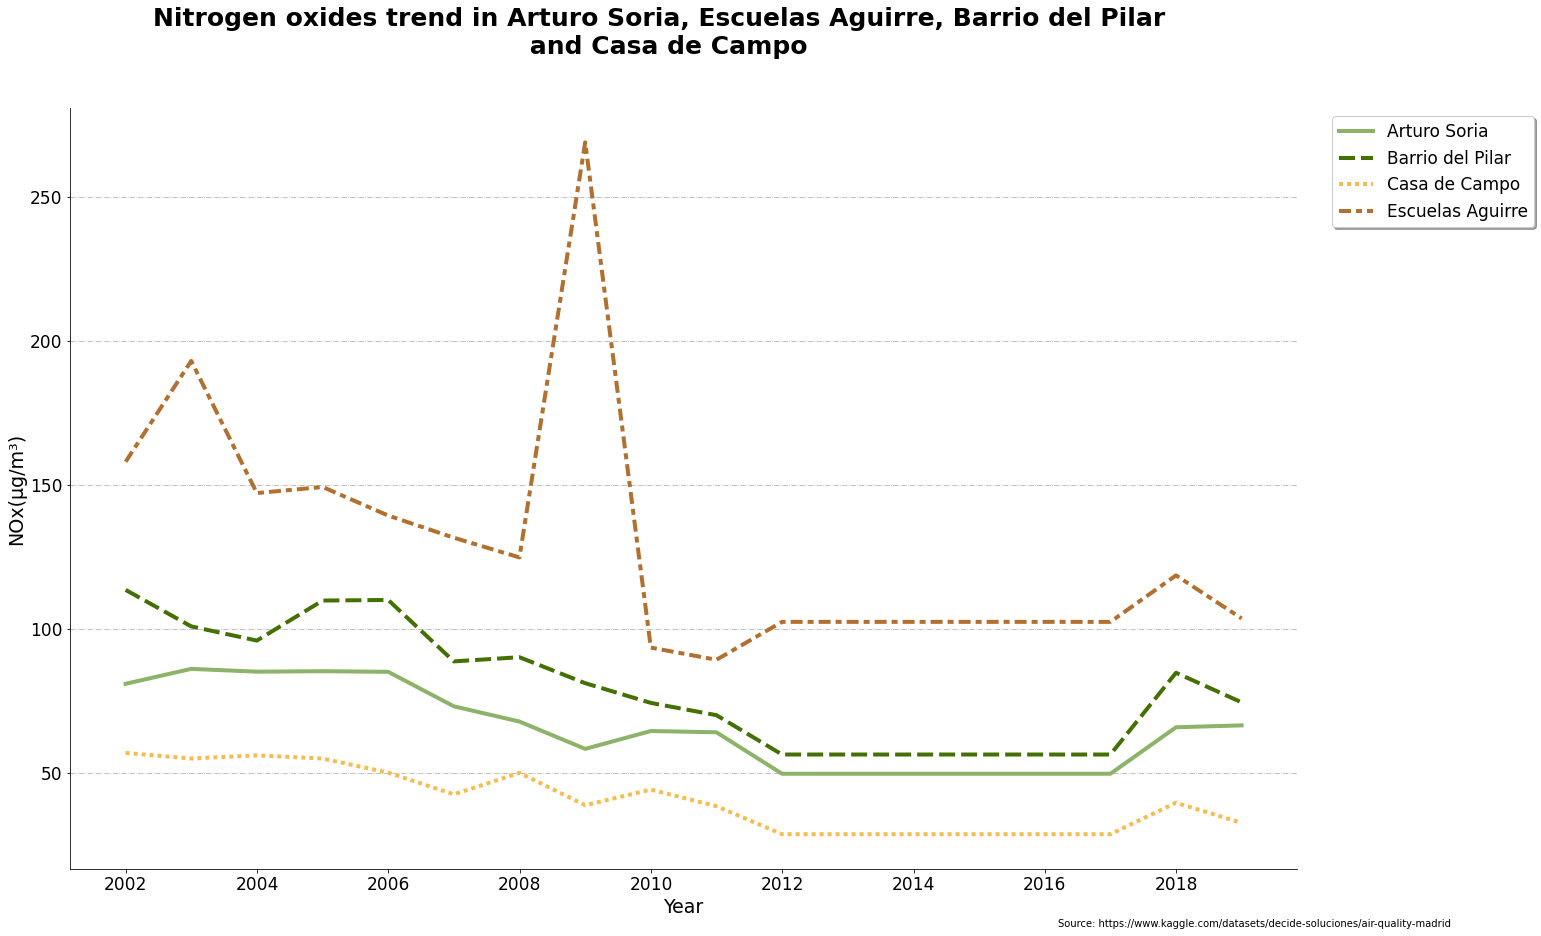

In [27]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=df1, x="date", y="NOx",
                    hue="name", style="name", lw=4,
                    palette=["#8CB369", "#437000", "#F7BC50", "#B1702F"])

# Add a general title
plt.suptitle("Nitrogen oxides trend in Arturo Soria, Escuelas Aguirre, Barrio del Pilar \n and Casa de Campo",
             fontsize=25, weight="bold")
plt.title("", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("NOx(μg/m³)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)


plt.grid(axis="y", linestyle="-.")

# Add source of data
plt.annotate('Source: https://www.kaggle.com/datasets/decide-soluciones/air-quality-madrid', (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top');

it can be seen that there is a general decrease of Nitrogen oxides levels from 2001 to 2018

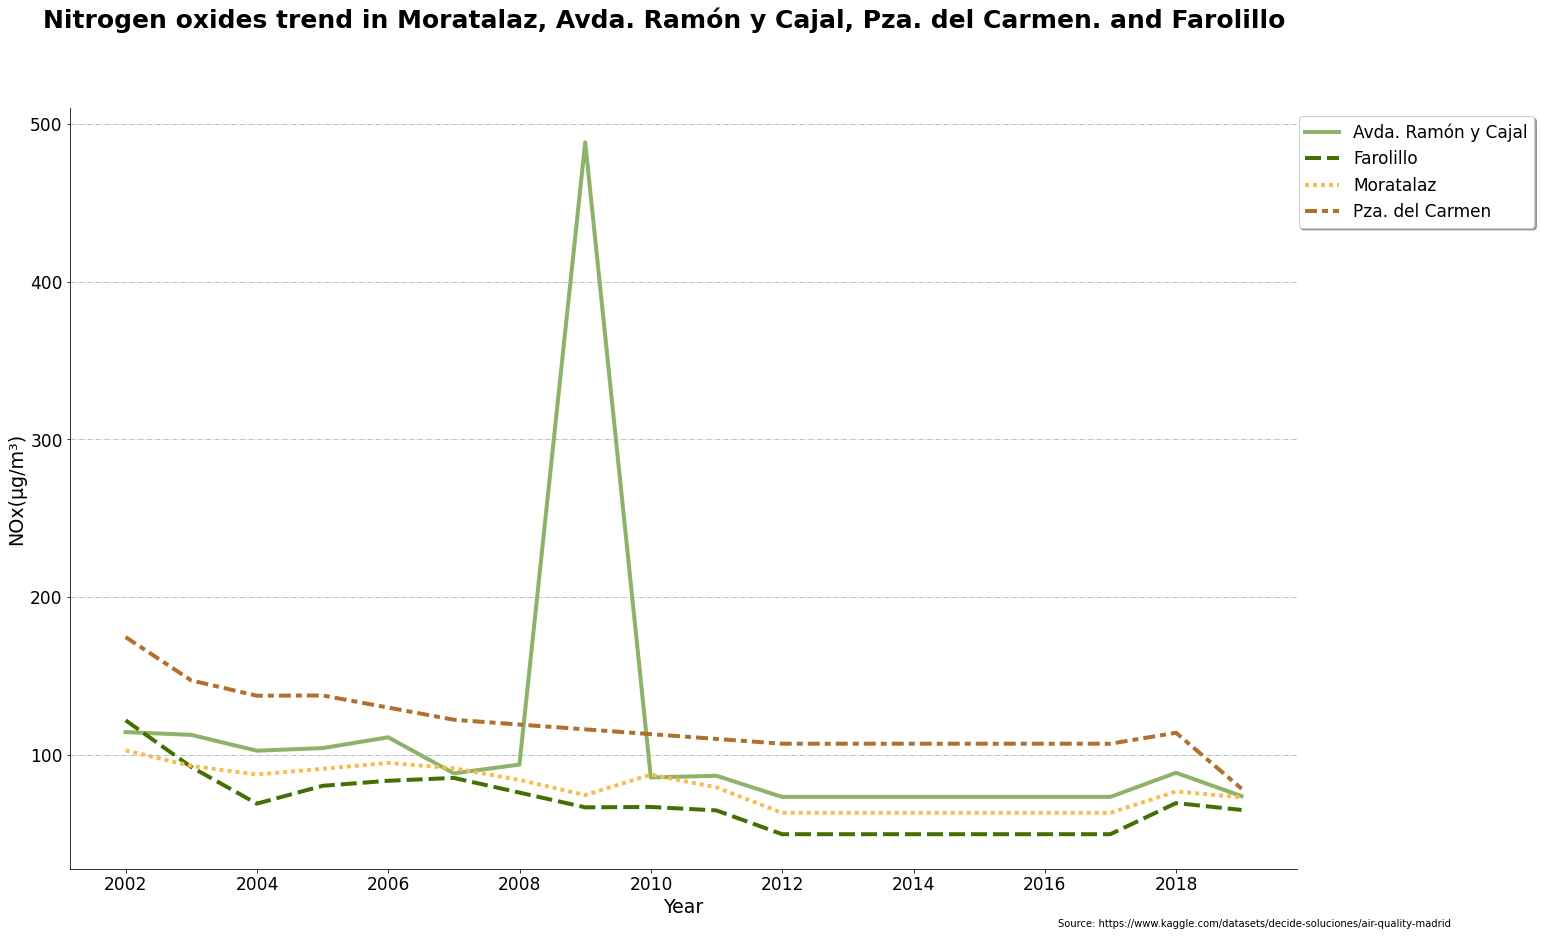

In [28]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=df2, x="date", y="NOx",
                    hue="name", style="name", lw=4,
                    palette=["#8CB369", "#437000", "#F7BC50", "#B1702F"])

# Add a general title
plt.suptitle("Nitrogen oxides trend in Moratalaz, Avda. Ramón y Cajal, Pza. del Carmen. and Farolillo",fontsize=25, weight="bold")
plt.title("", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("NOx(μg/m³)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)



plt.grid(axis="y", linestyle="-.")

# Add source of data
plt.annotate('Source: https://www.kaggle.com/datasets/decide-soluciones/air-quality-madrid', (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top');

plt.show()

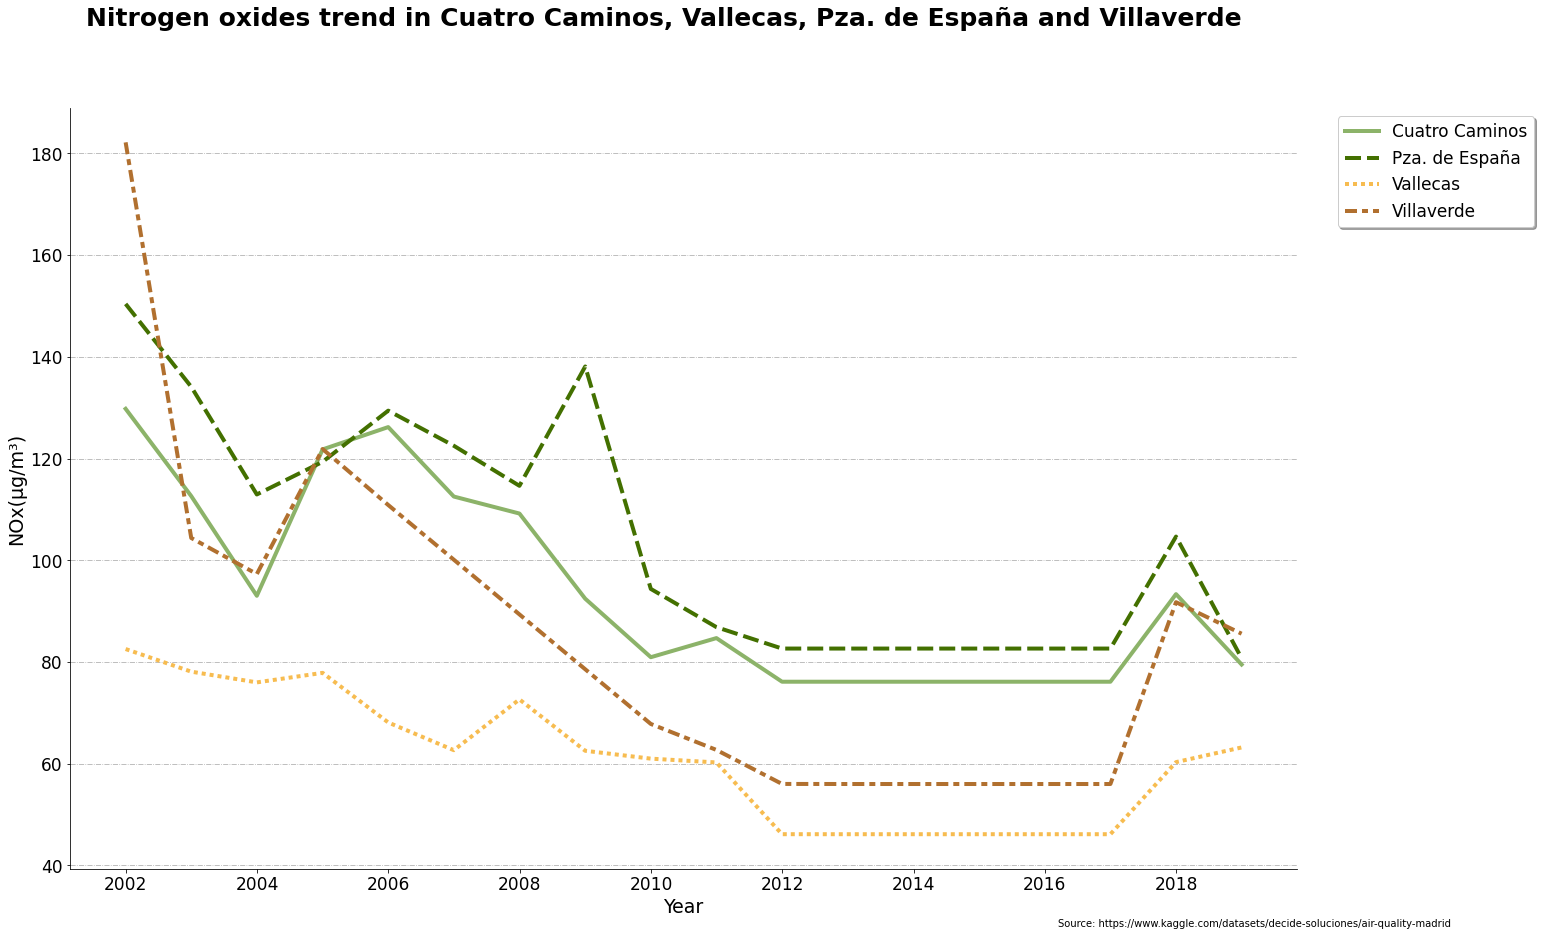

In [29]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=df3, x="date", y="NOx",
                    hue="name", style="name", lw=4,
                    palette=["#8CB369", "#437000", "#F7BC50", "#B1702F"])

# Add a general title
plt.suptitle("Nitrogen oxides trend in Cuatro Caminos, Vallecas, Pza. de España and Villaverde", fontsize=25, weight="bold")
plt.title("", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("NOx(μg/m³)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)



plt.grid(axis="y", linestyle="-.")

# Add source of data
plt.annotate('Source: https://www.kaggle.com/datasets/decide-soluciones/air-quality-madrid', (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top');

plt.show()

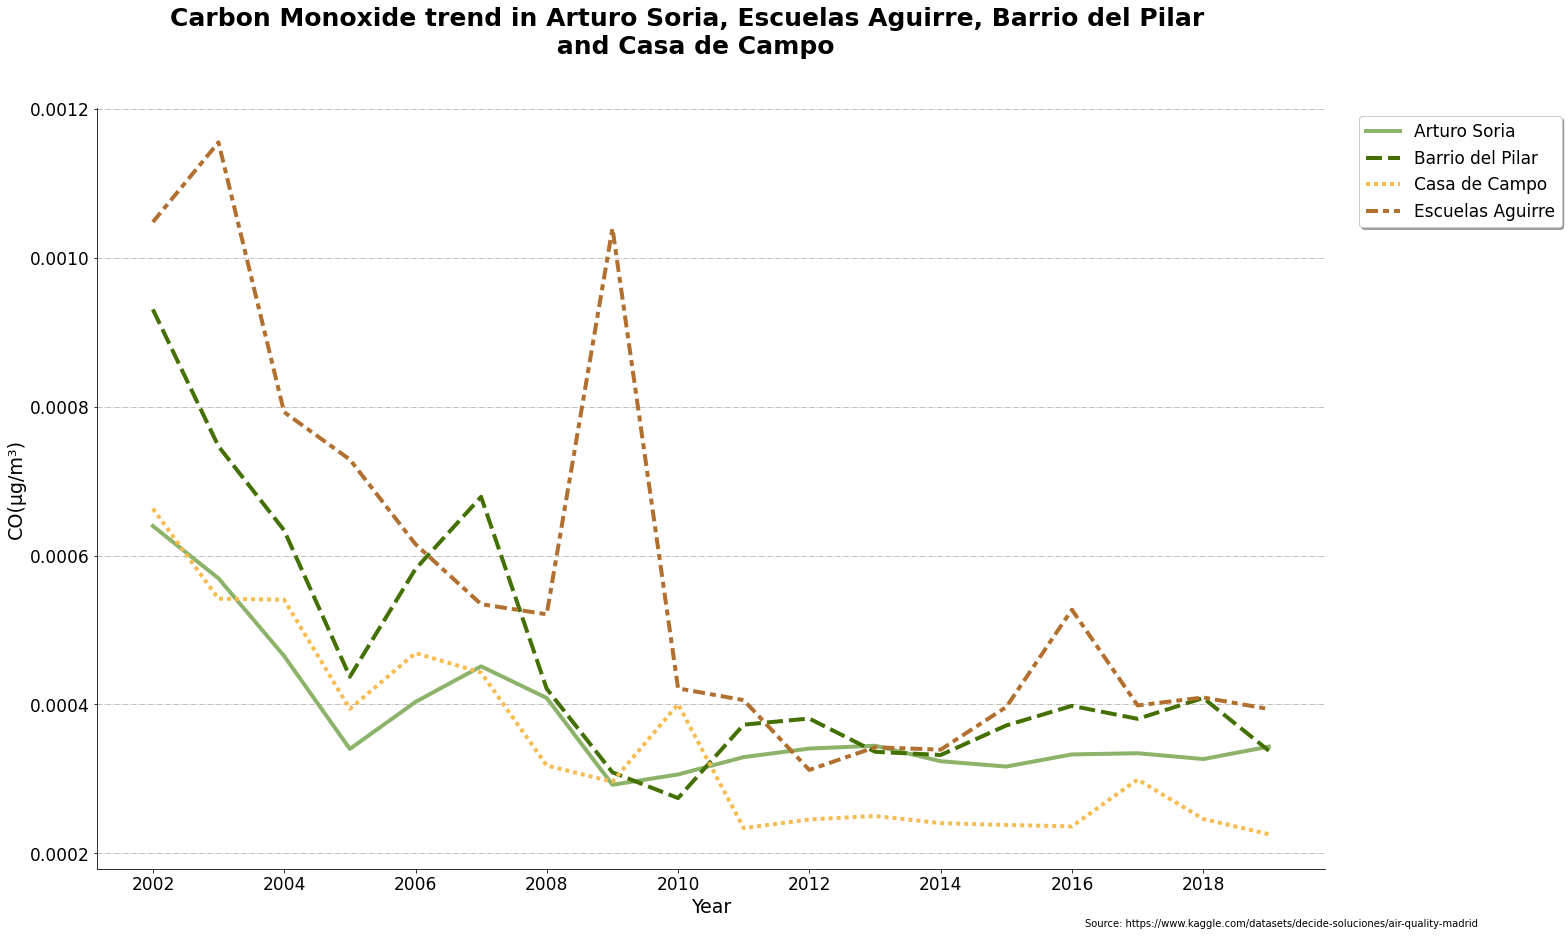

In [30]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=df1, x="date", y="CO",
                    hue="name", style="name", lw=4,
                    palette=["#8CB369", "#437000", "#F7BC50", "#B1702F"])

# Add a general title
plt.suptitle("Carbon Monoxide trend in Arturo Soria, Escuelas Aguirre, Barrio del Pilar \n and Casa de Campo",
             fontsize=25, weight="bold")
plt.title("", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("CO(μg/m³)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)


plt.grid(axis="y", linestyle="-.")

# Add source of data
plt.annotate('Source: https://www.kaggle.com/datasets/decide-soluciones/air-quality-madrid', (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top');

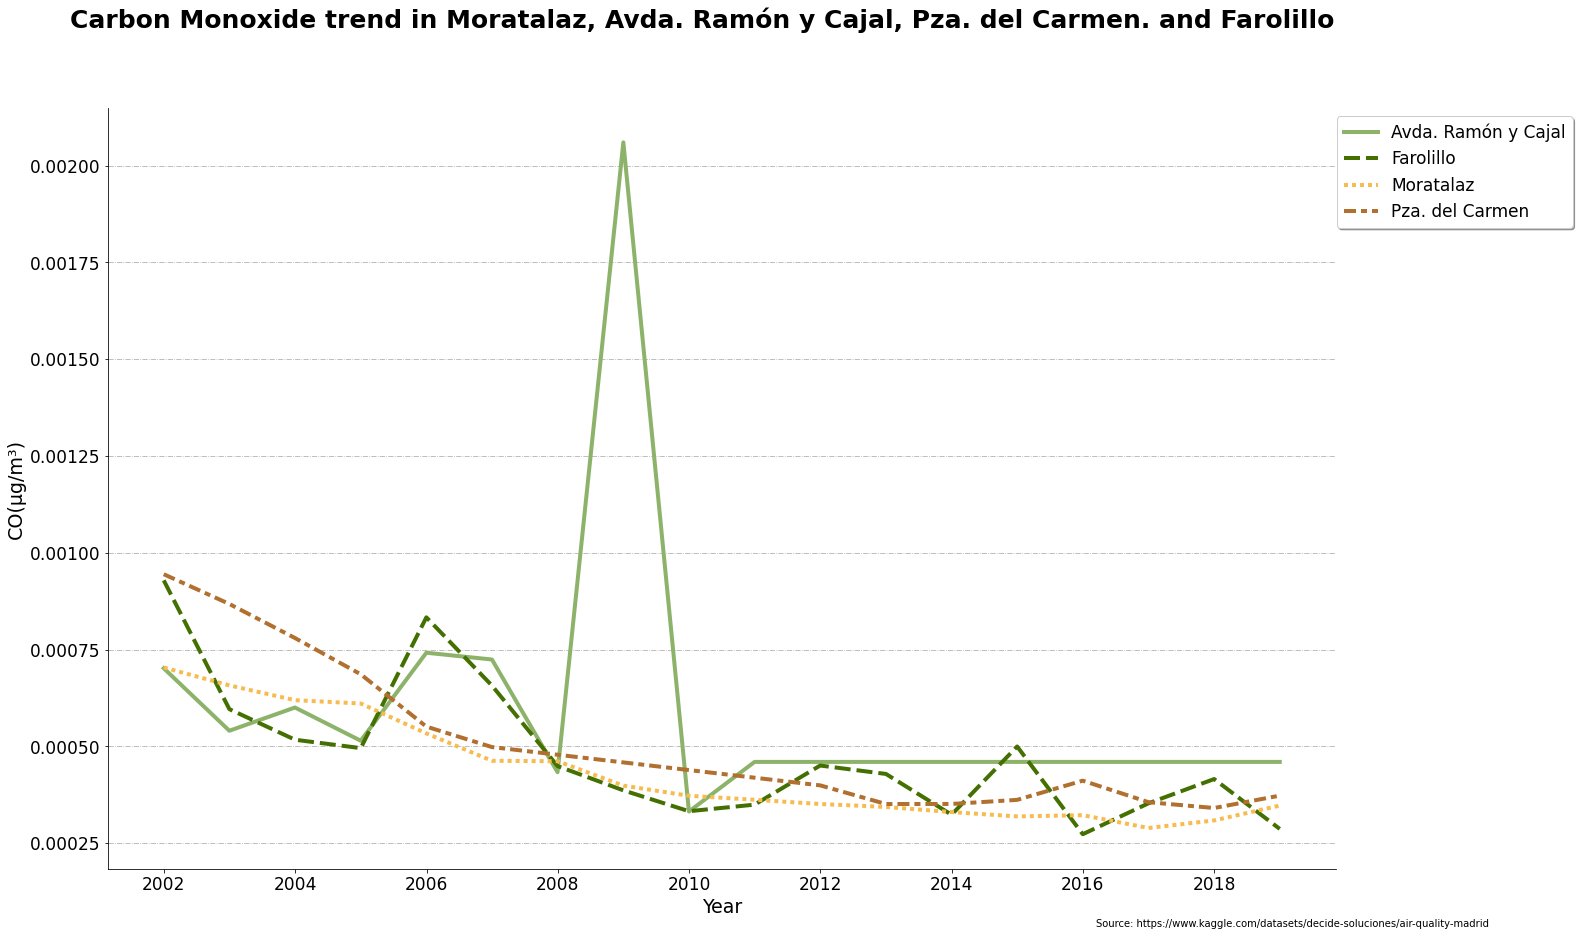

In [38]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=df2, x="date", y="CO",
                    hue="name", style="name", lw=4,
                    palette=["#8CB369", "#437000", "#F7BC50", "#B1702F"])

# Add a general title
plt.suptitle("Carbon Monoxide trend in Moratalaz, Avda. Ramón y Cajal, Pza. del Carmen. and Farolillo",fontsize=25, weight="bold")
plt.title("", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("CO(μg/m³)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)



plt.grid(axis="y", linestyle="-.")

# Add source of data
plt.annotate('Source: https://www.kaggle.com/datasets/decide-soluciones/air-quality-madrid', (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top');

plt.show()

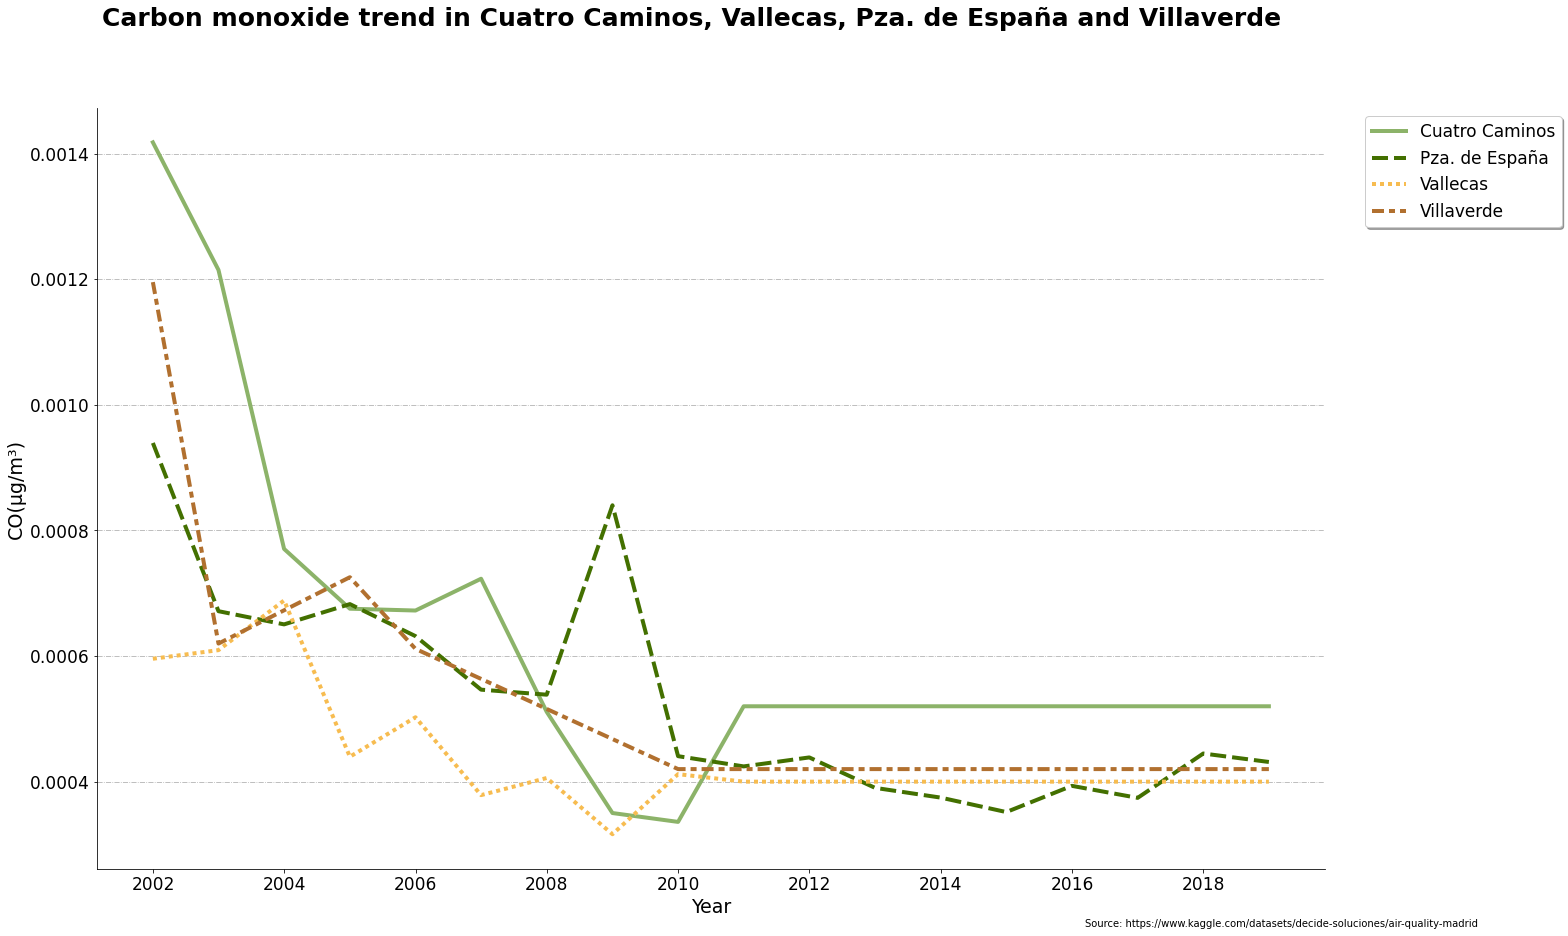

In [32]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=df3, x="date", y="CO",
                    hue="name", style="name", lw=4,
                    palette=["#8CB369", "#437000", "#F7BC50", "#B1702F"])

# Add a general title
plt.suptitle("Carbon monoxide trend in Cuatro Caminos, Vallecas, Pza. de España and Villaverde", fontsize=25, weight="bold")
plt.title("", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("CO(μg/m³)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)



plt.grid(axis="y", linestyle="-.")

# Add source of data
plt.annotate('Source: https://www.kaggle.com/datasets/decide-soluciones/air-quality-madrid', (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top');

plt.show()

# Correlation Between pollutants in different stations

In [34]:
#function to plot correlation between pollutants
def show_correlation(station, station_file):
    plt.figure(figsize=(16, 8), dpi=360)

    plt.suptitle("Correlation between pollutants in "+station .title(), fontsize=20,
             weight="bold")

    plt.title("", fontsize=15, style="italic")
    
    for i in df.columns:
        station_file[i] = station_file[i].pct_change() #convert to pct_change for accurate correlation calculation for time series

    sns.heatmap(station_file.drop('station', axis=1).corr(), square=True, annot=True, cmap='rainbow')
    plt.xticks(fontsize=12)

    plt.yticks(fontsize=12)

    plt.annotate('Source: https://www.kaggle.com/datasets/decide-soluciones/air-quality-madrid',
             (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top');

    plt.show()

## Arturo Soria

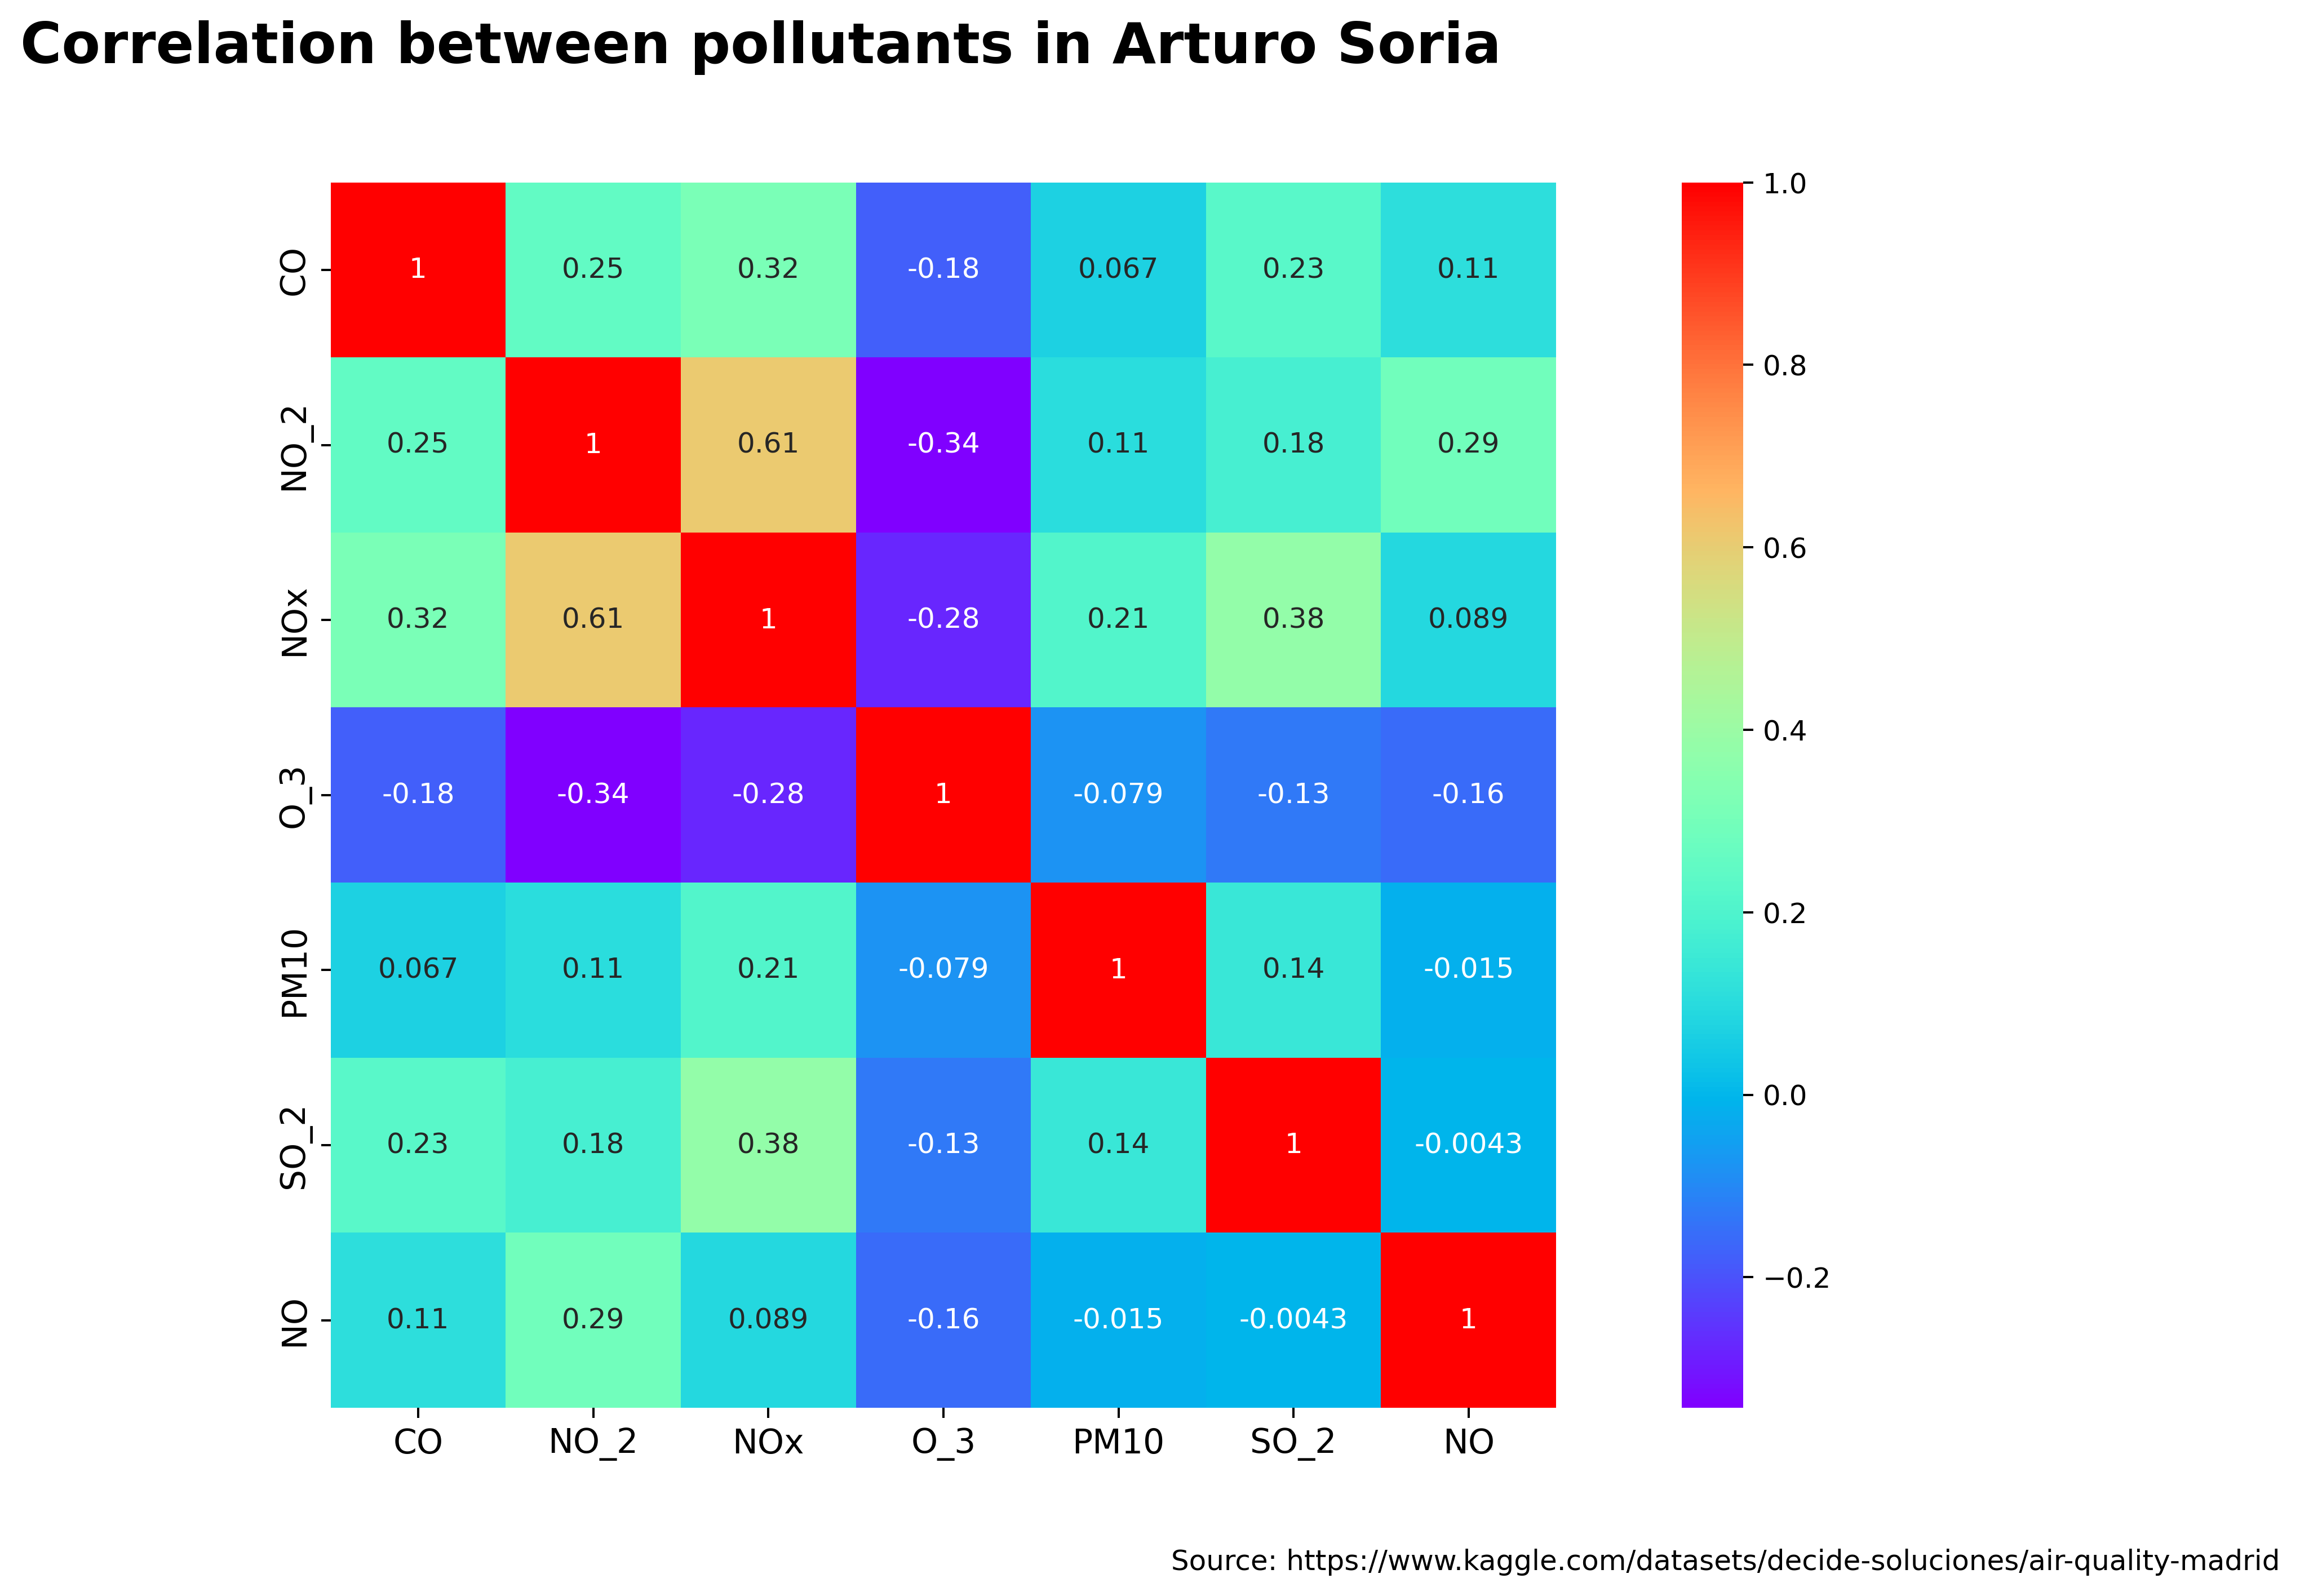

In [35]:
show_correlation("Arturo Soria",df_list[0])

## Avda Ram

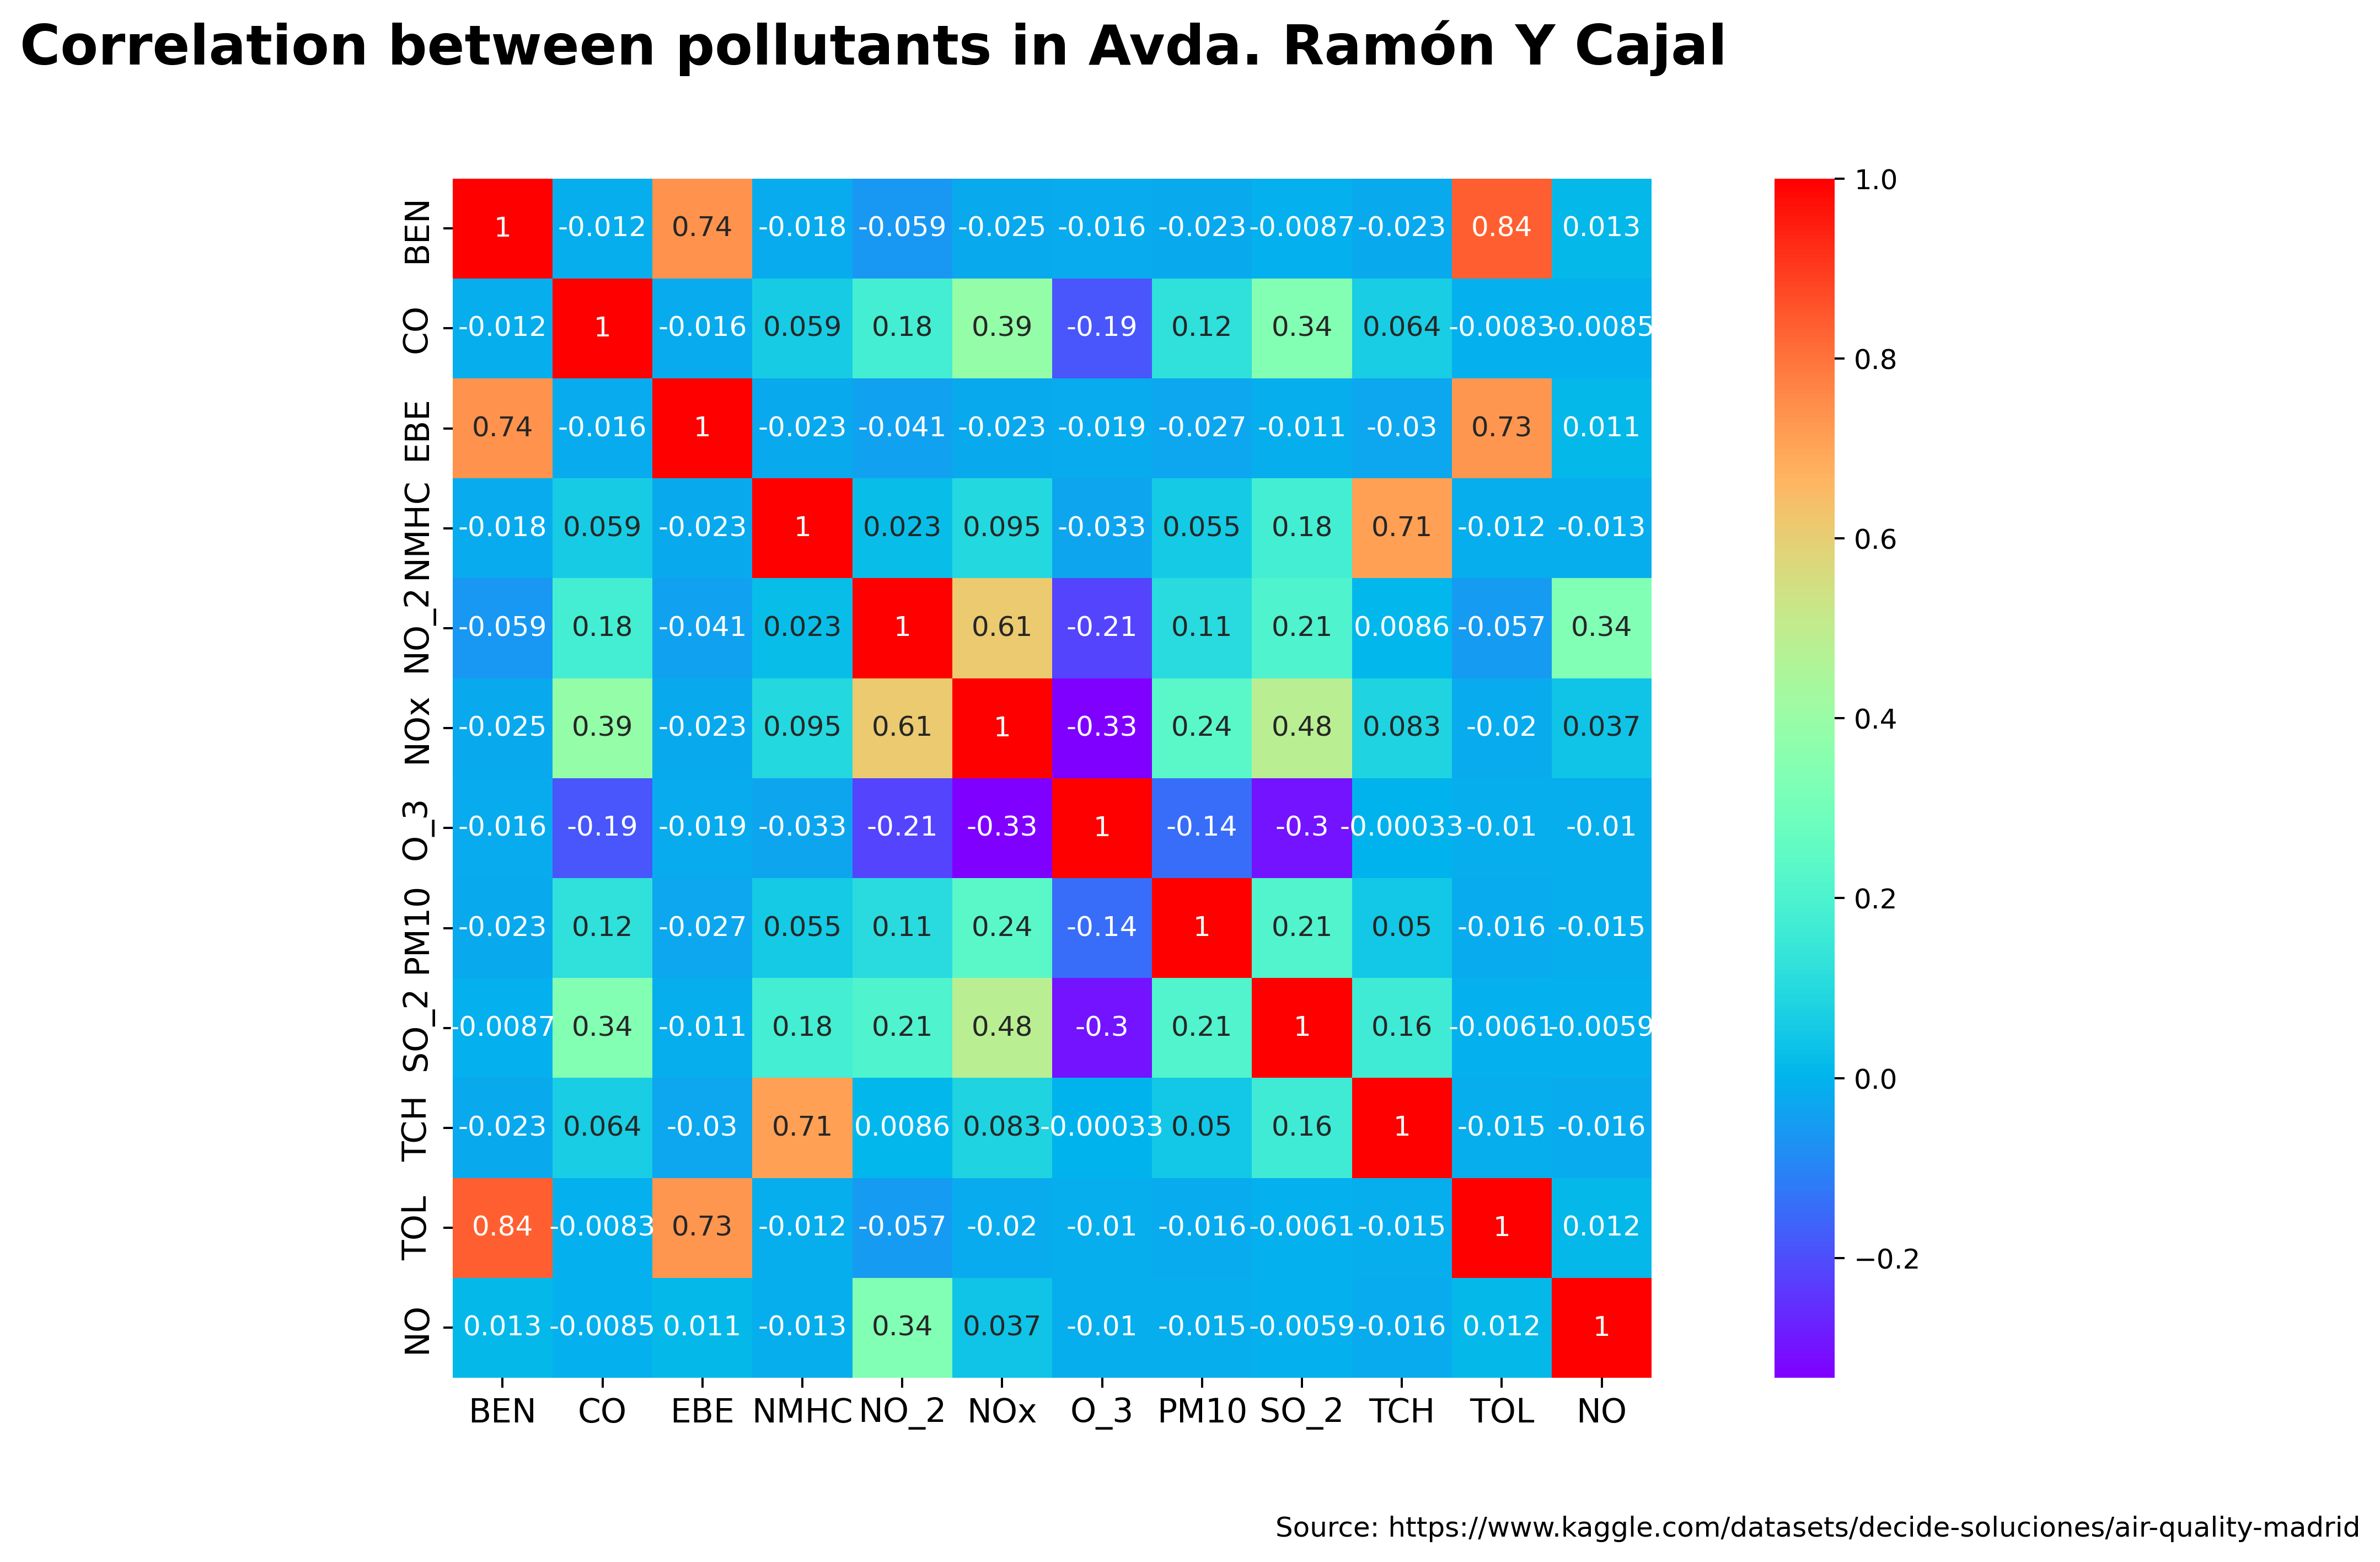

In [36]:
show_correlation("Avda. Ramón y Cajal",df_list[1])

## Barrio Del Pillar

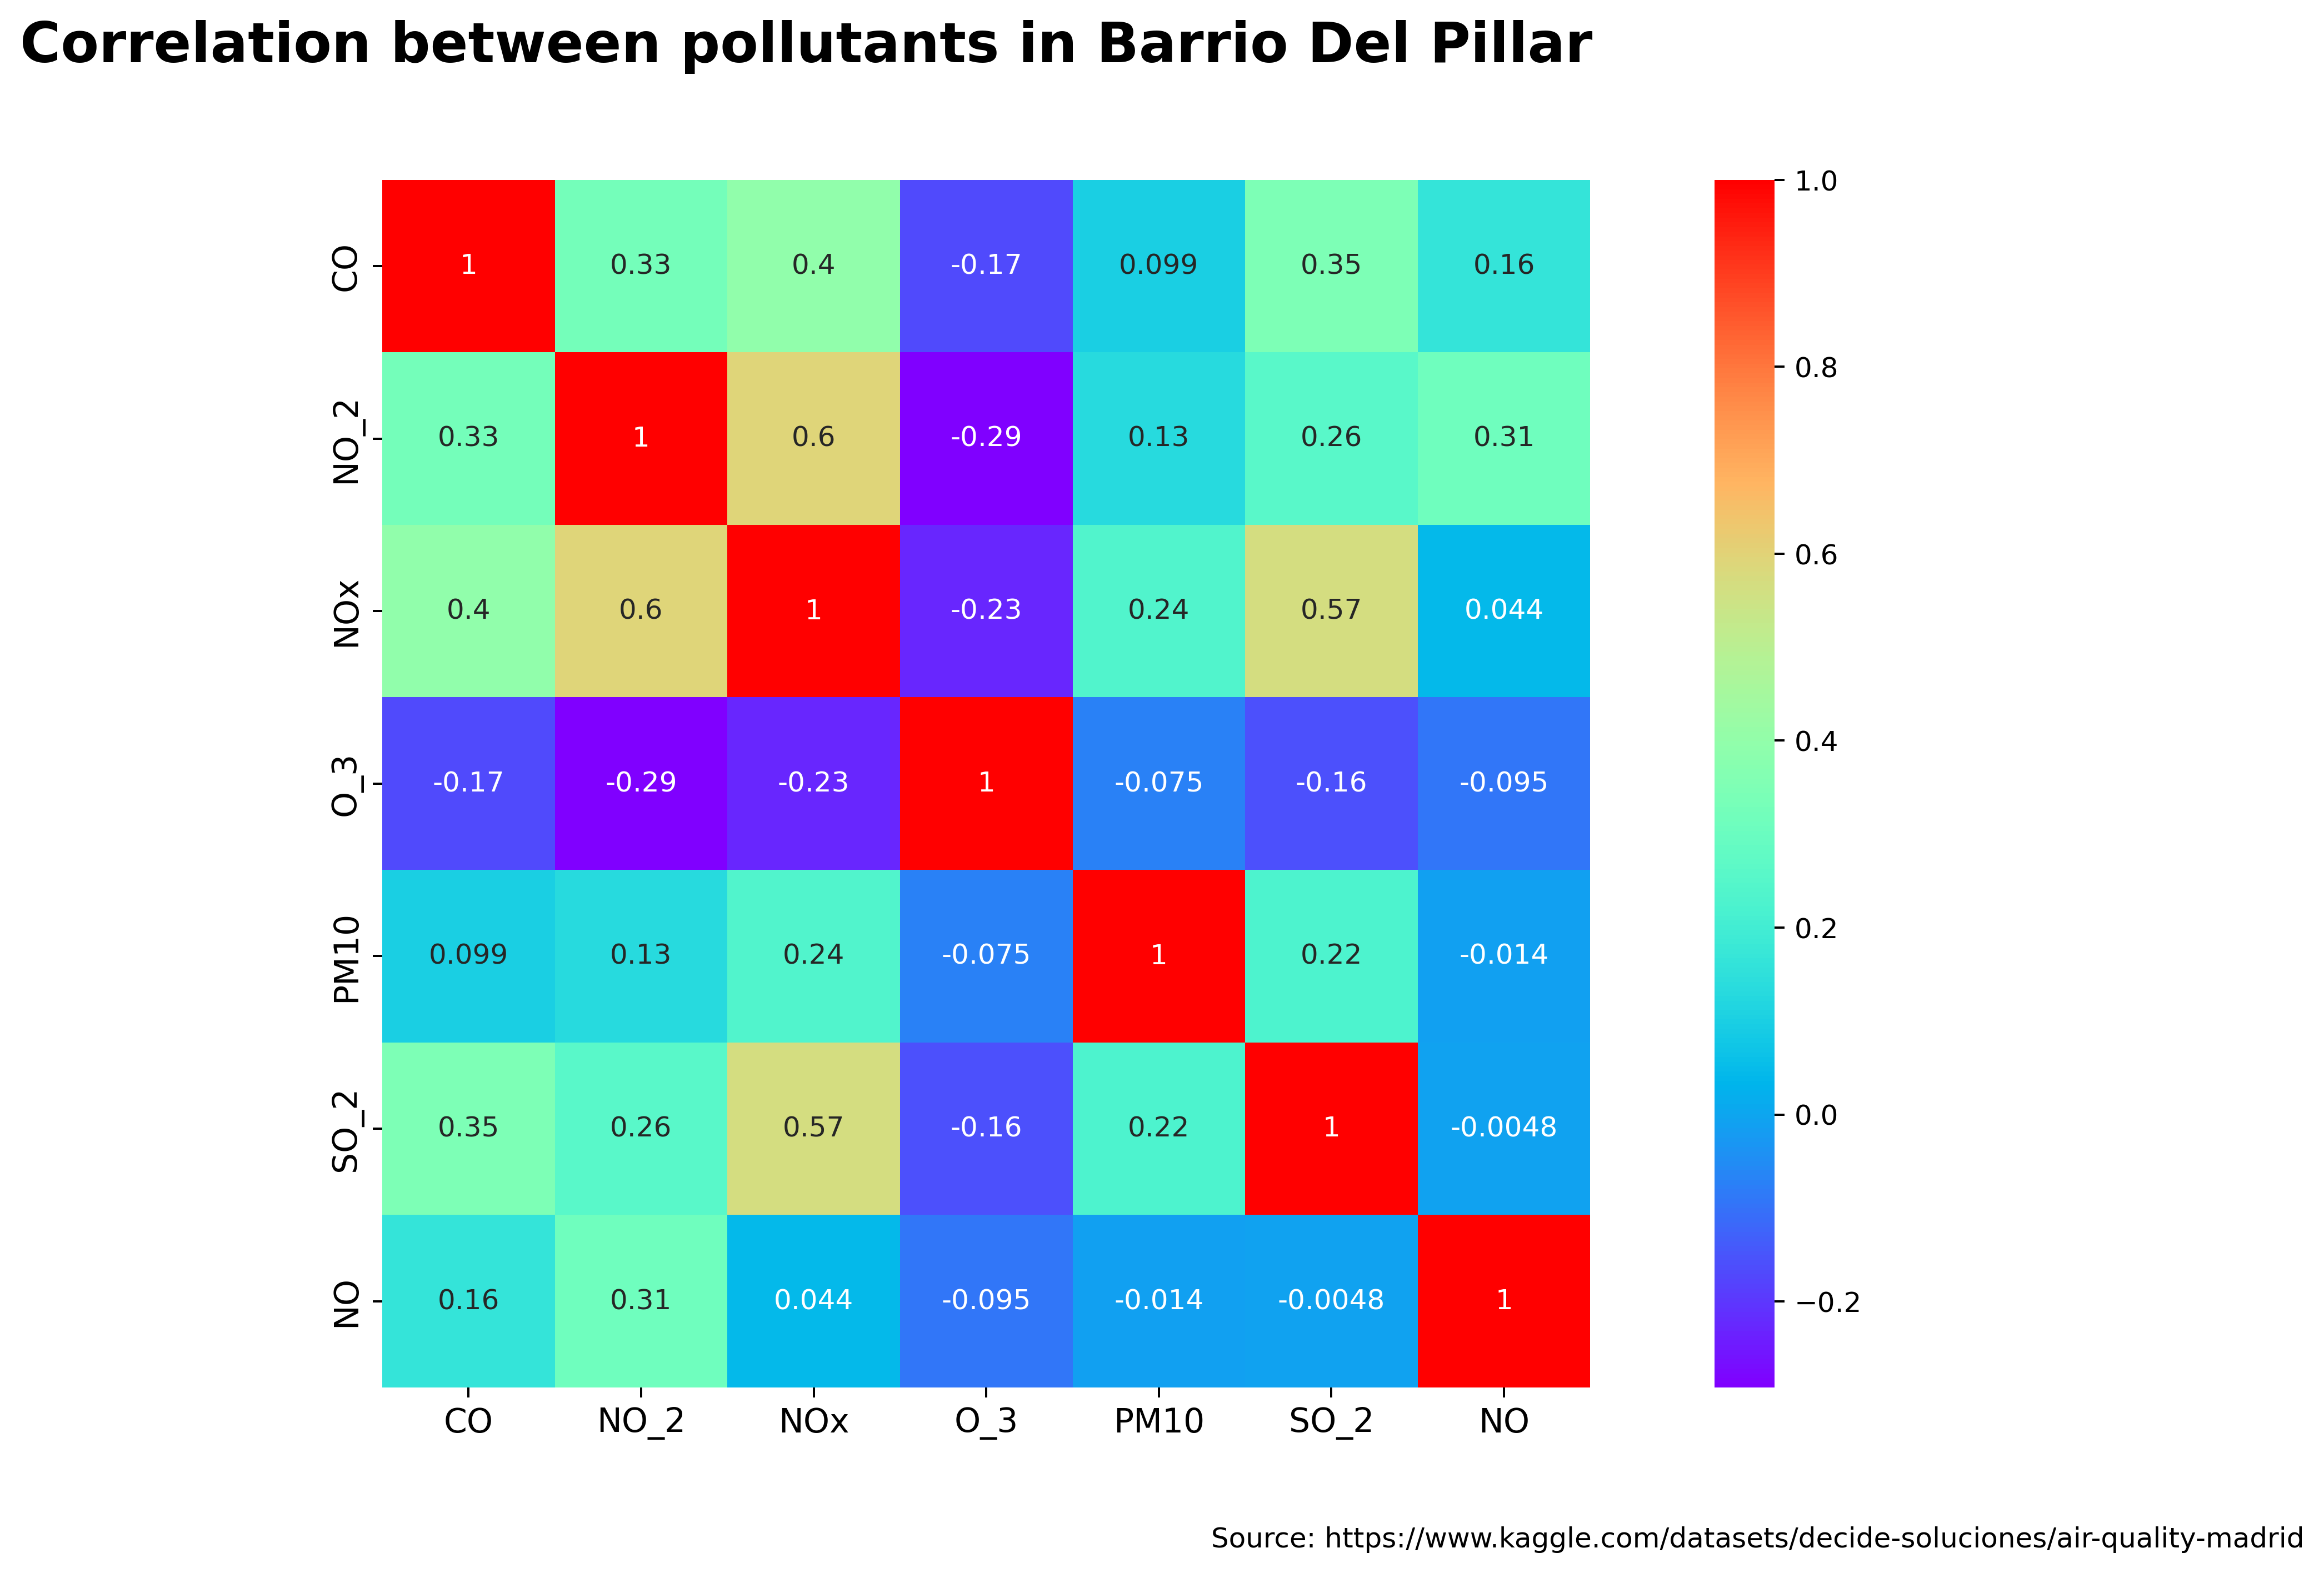

In [138]:
show_correlation("barrio del pillar",df_list[3])

## Casa De Campo

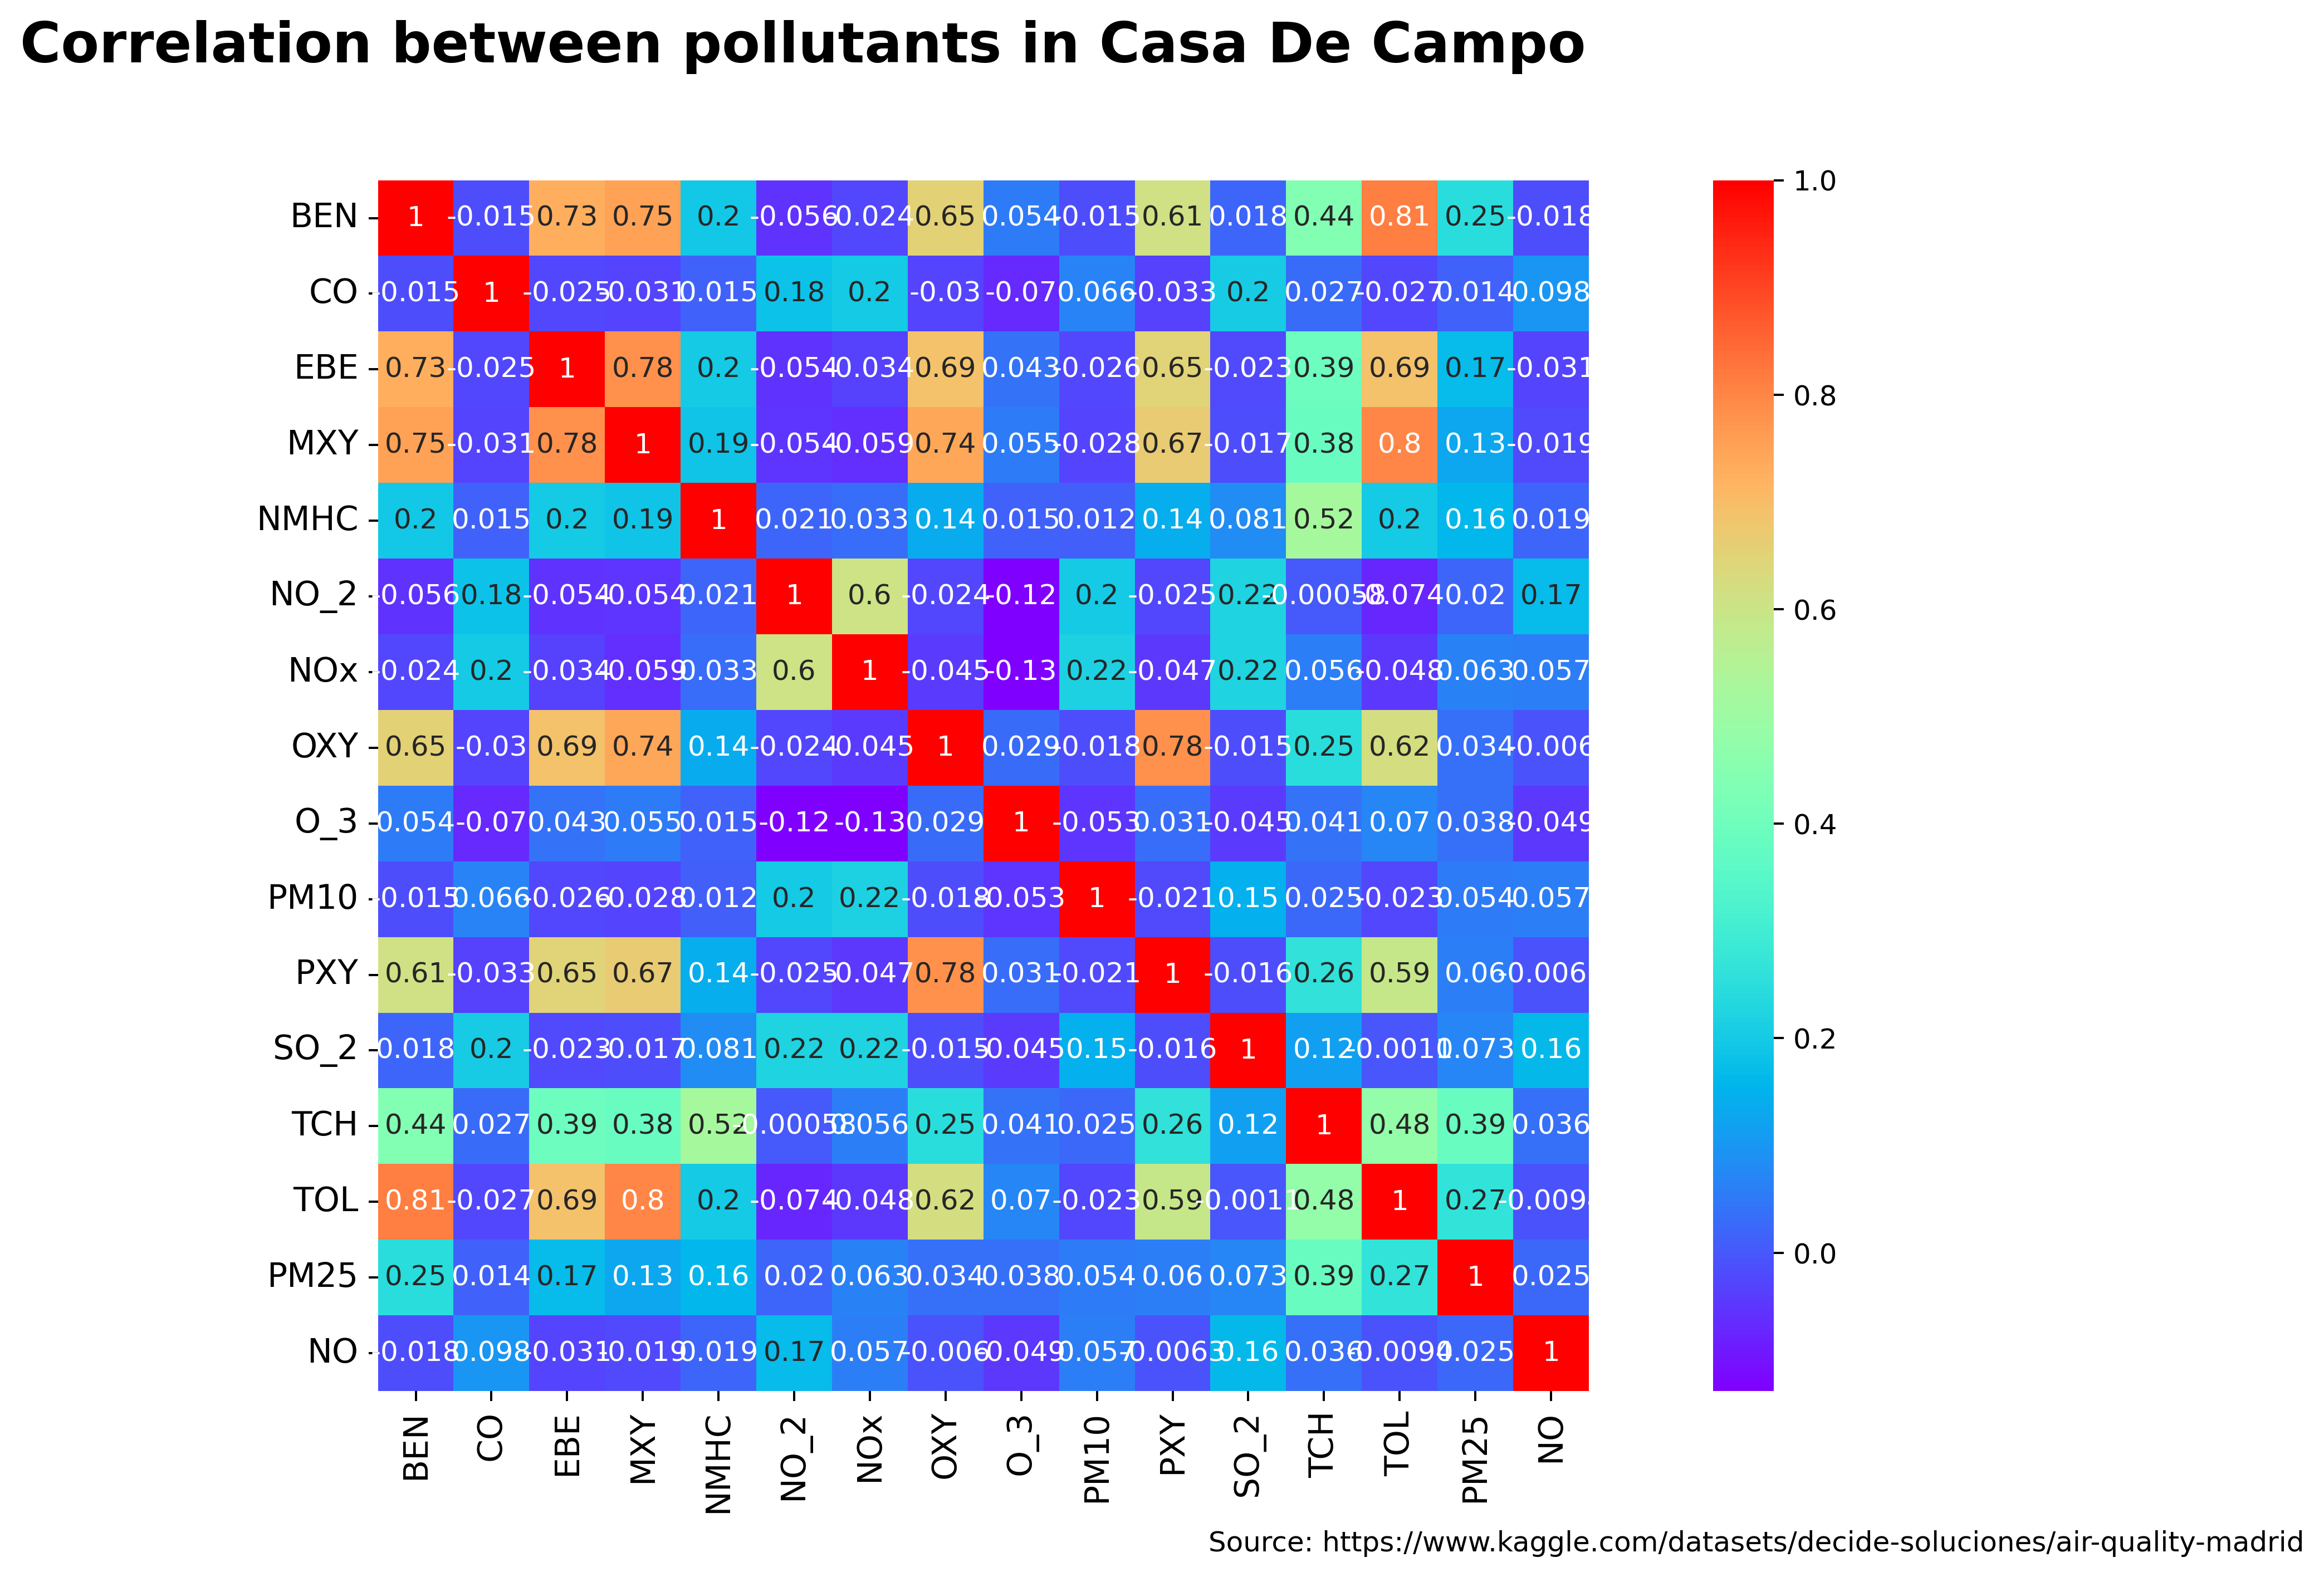

In [139]:
show_correlation("Casa de Campo",df_list[4])

## Cuatro Caminos

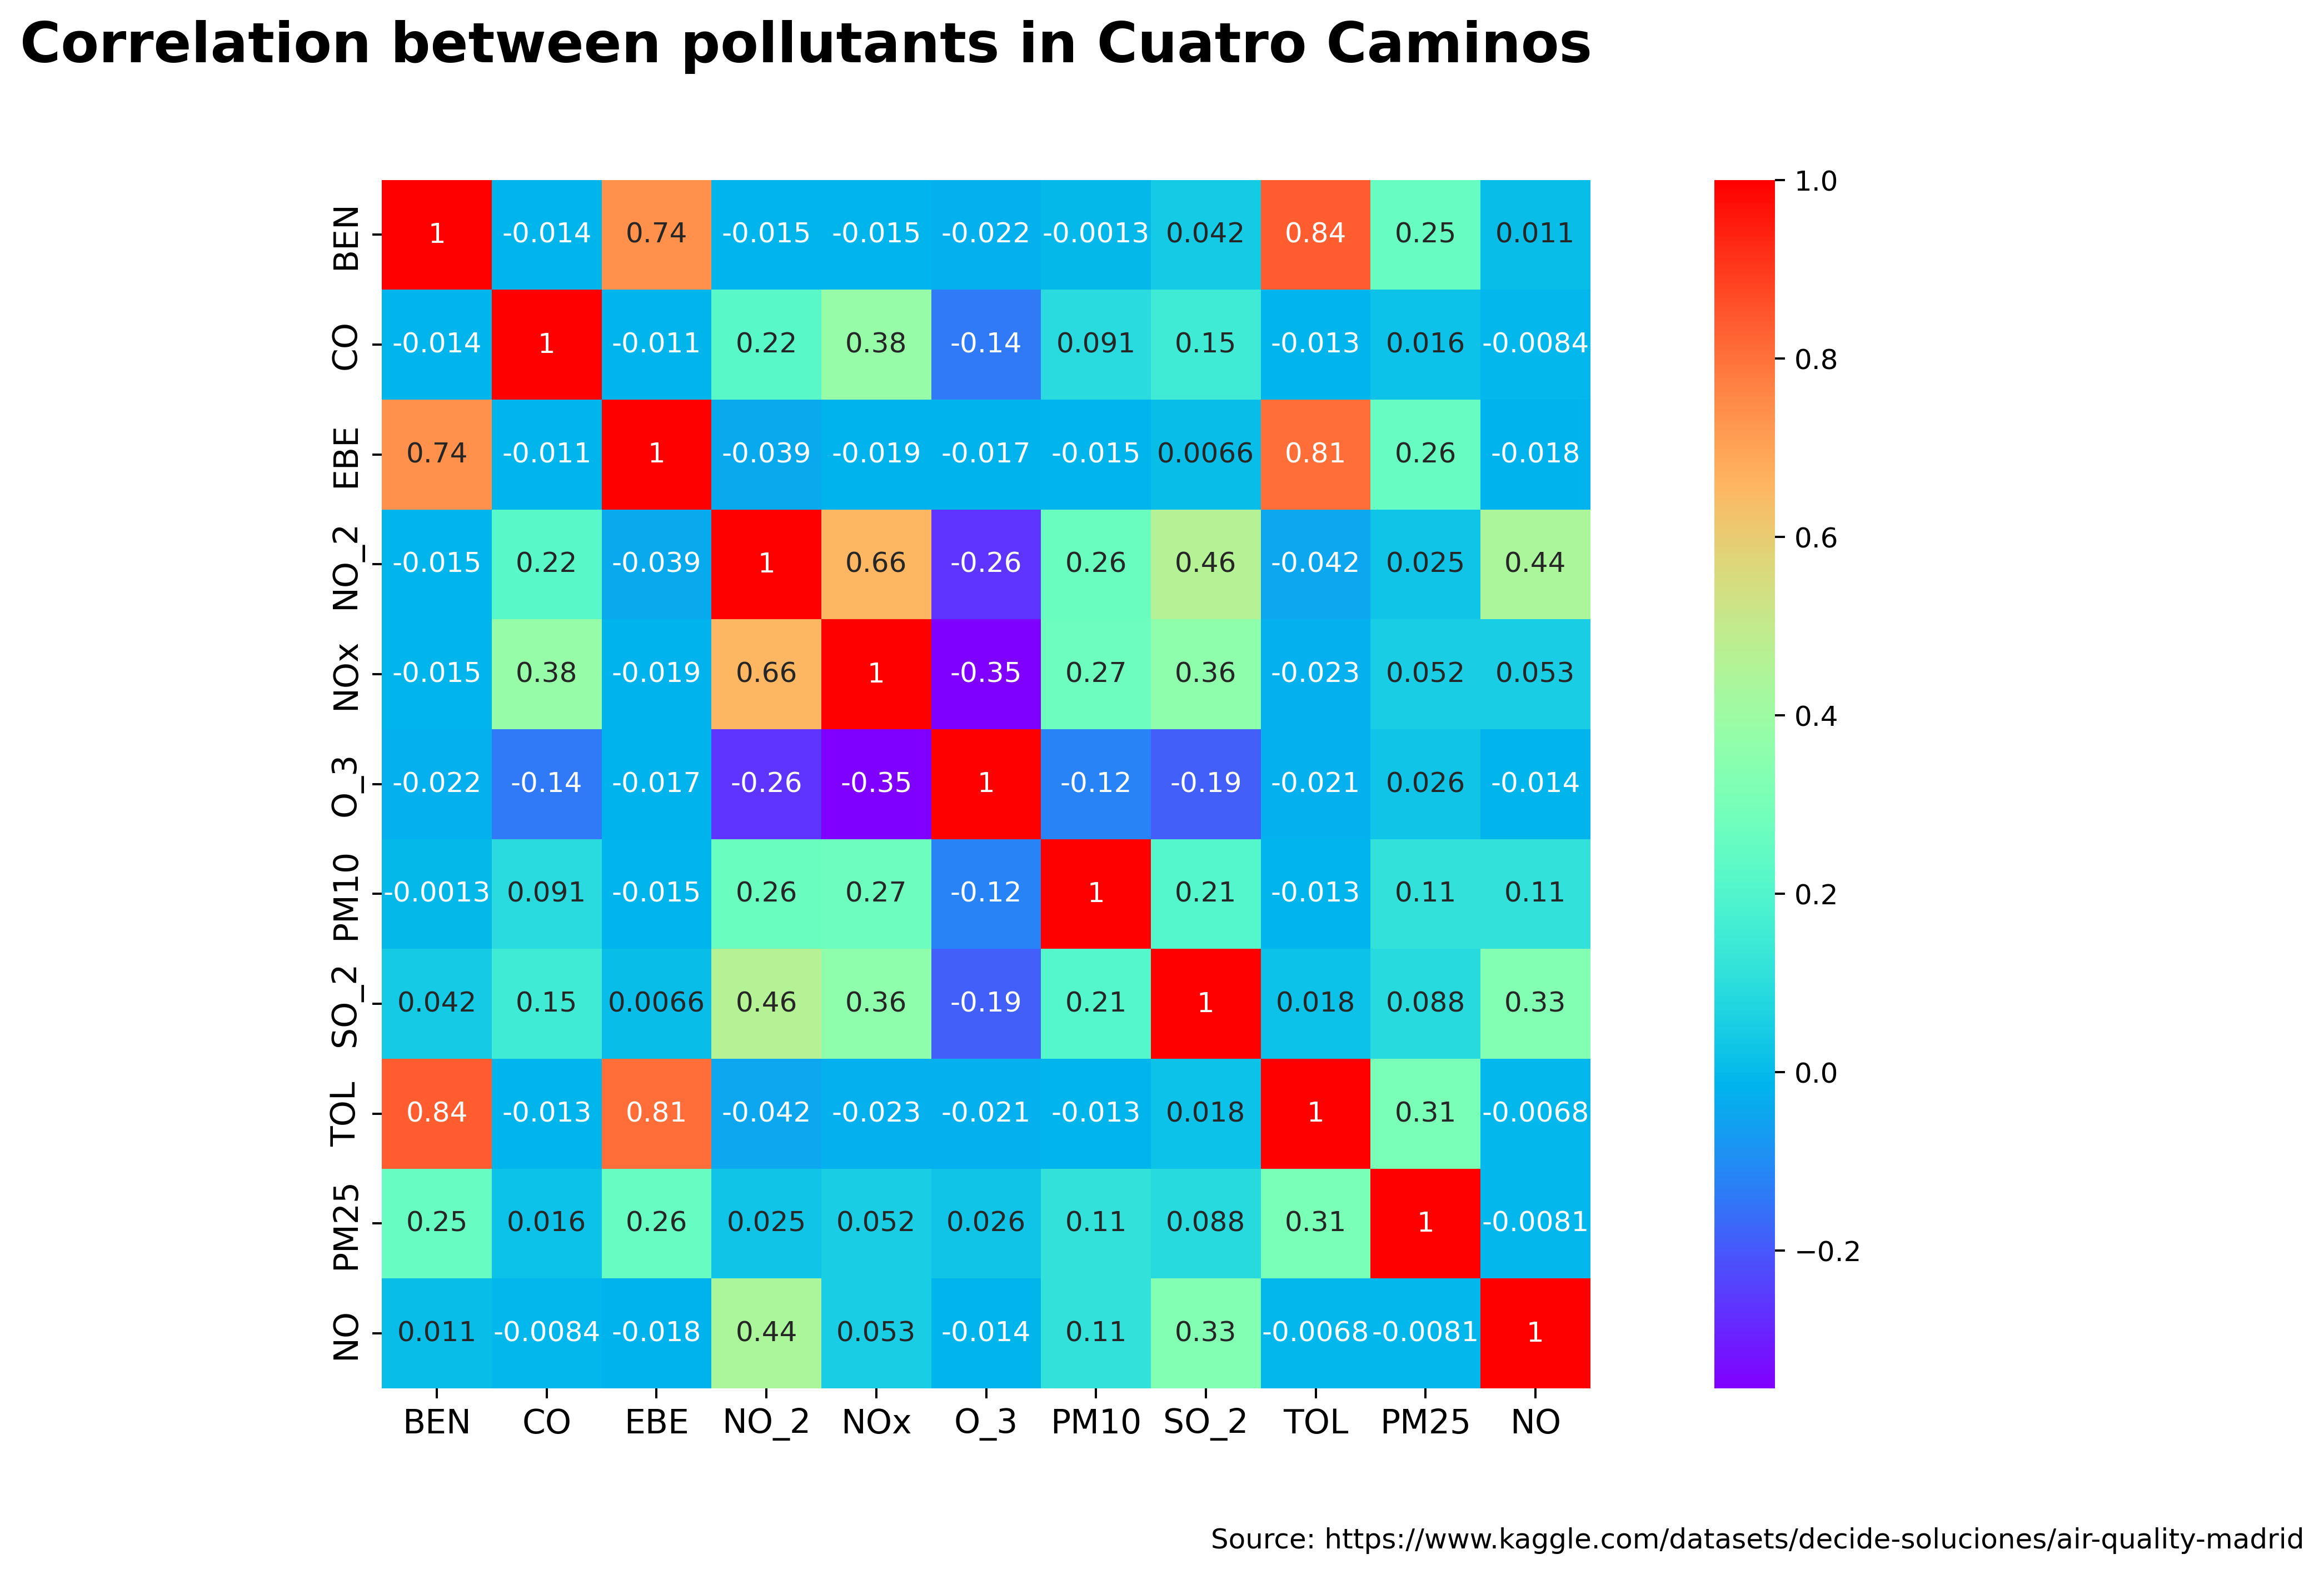

In [140]:
show_correlation("Cuatro Caminos",df_list[6])

## Escuelas Aguirre

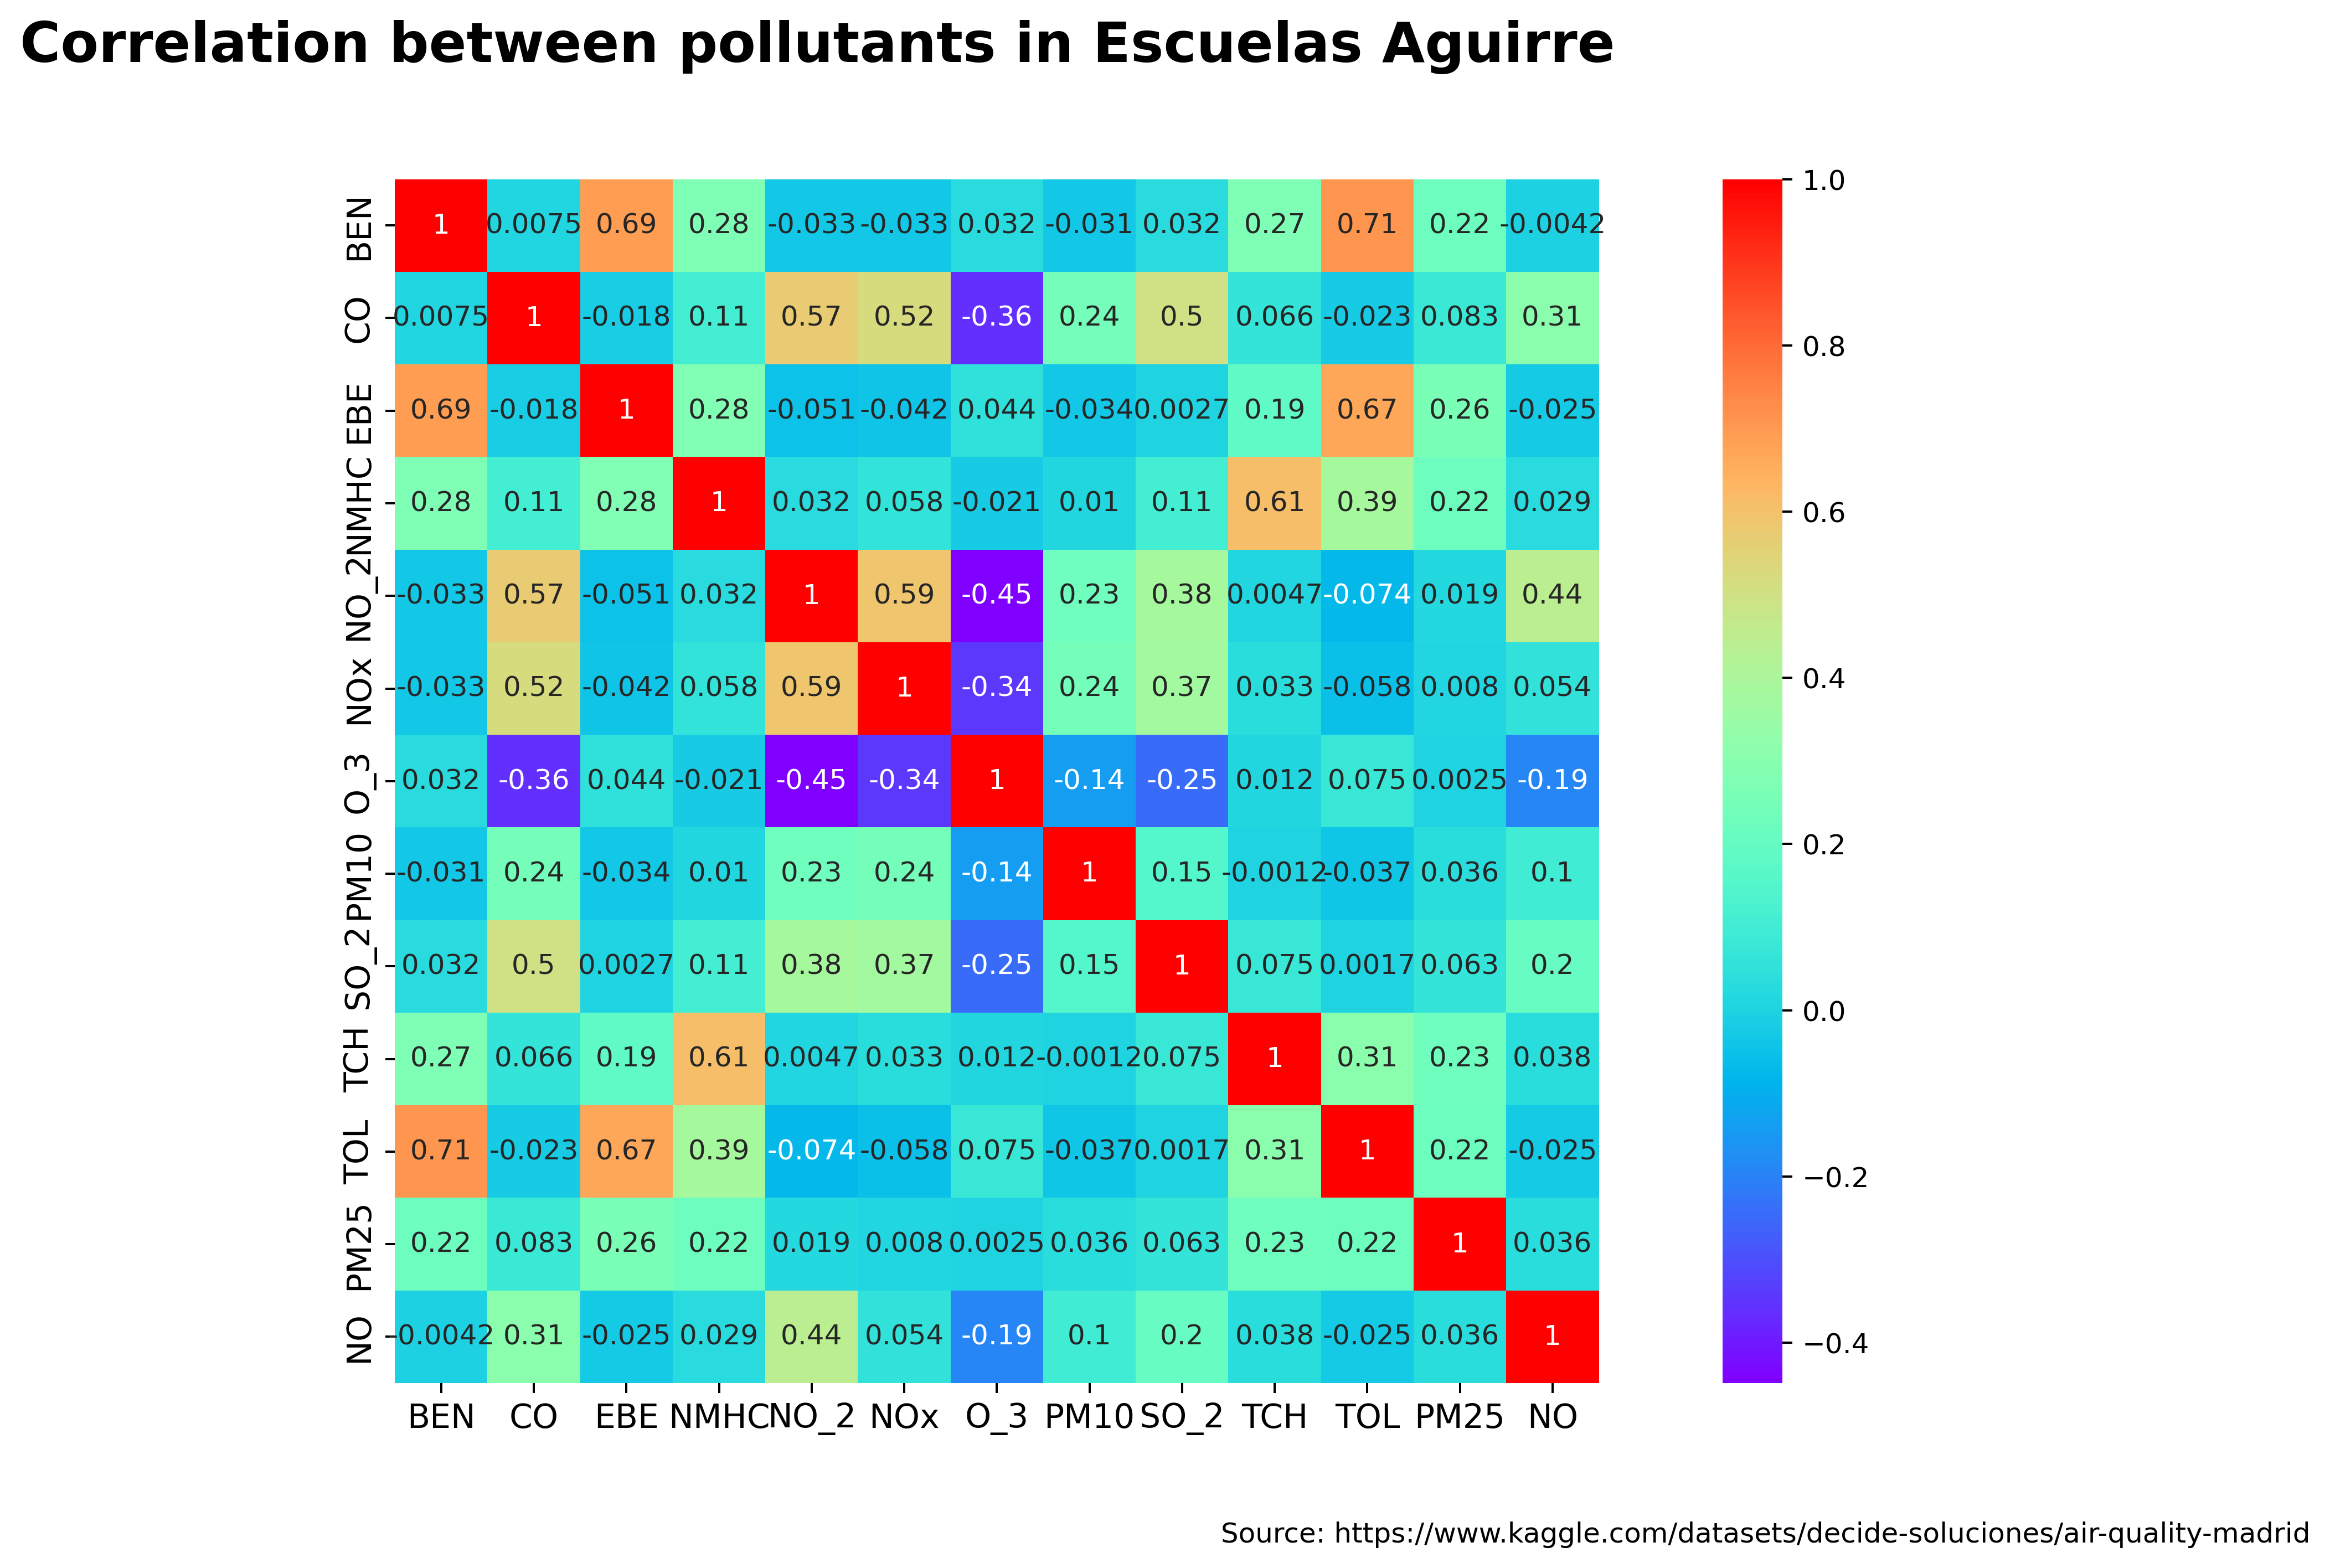

In [141]:
show_correlation('escuelas aguirre',df_list[9])

## Farolillo

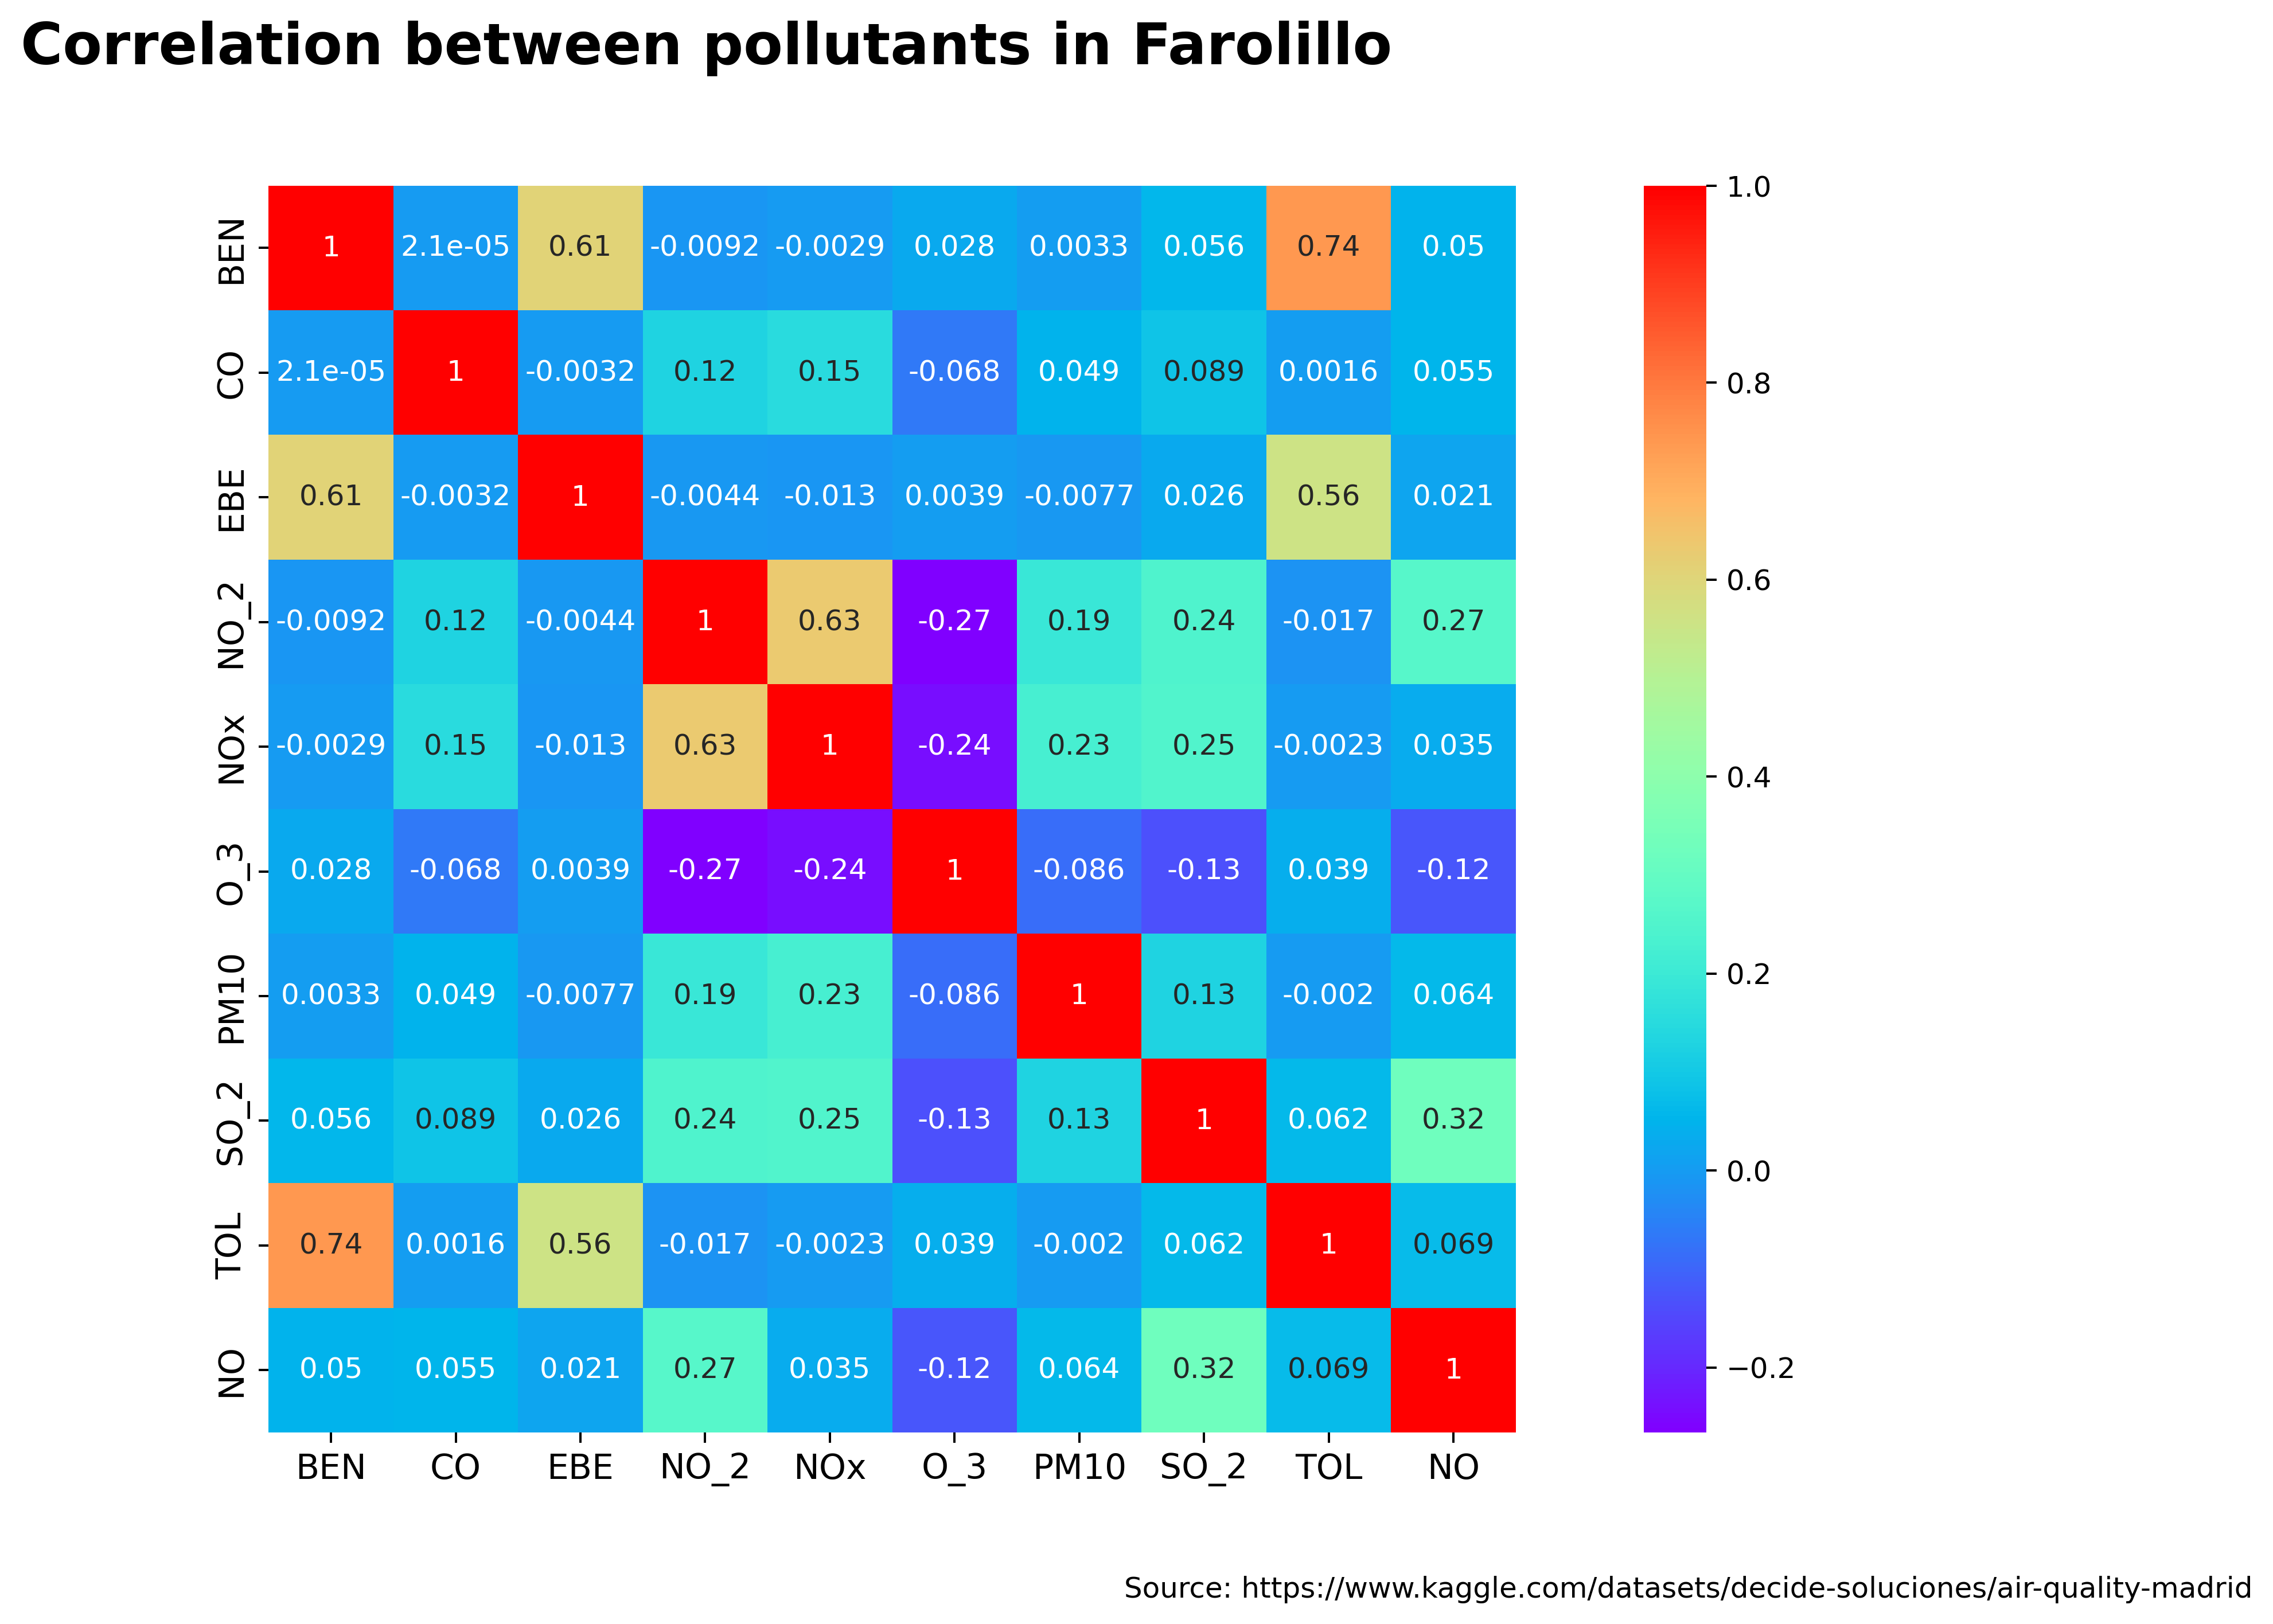

In [142]:
show_correlation('farolillo',df_list[10])

## Moratalaz

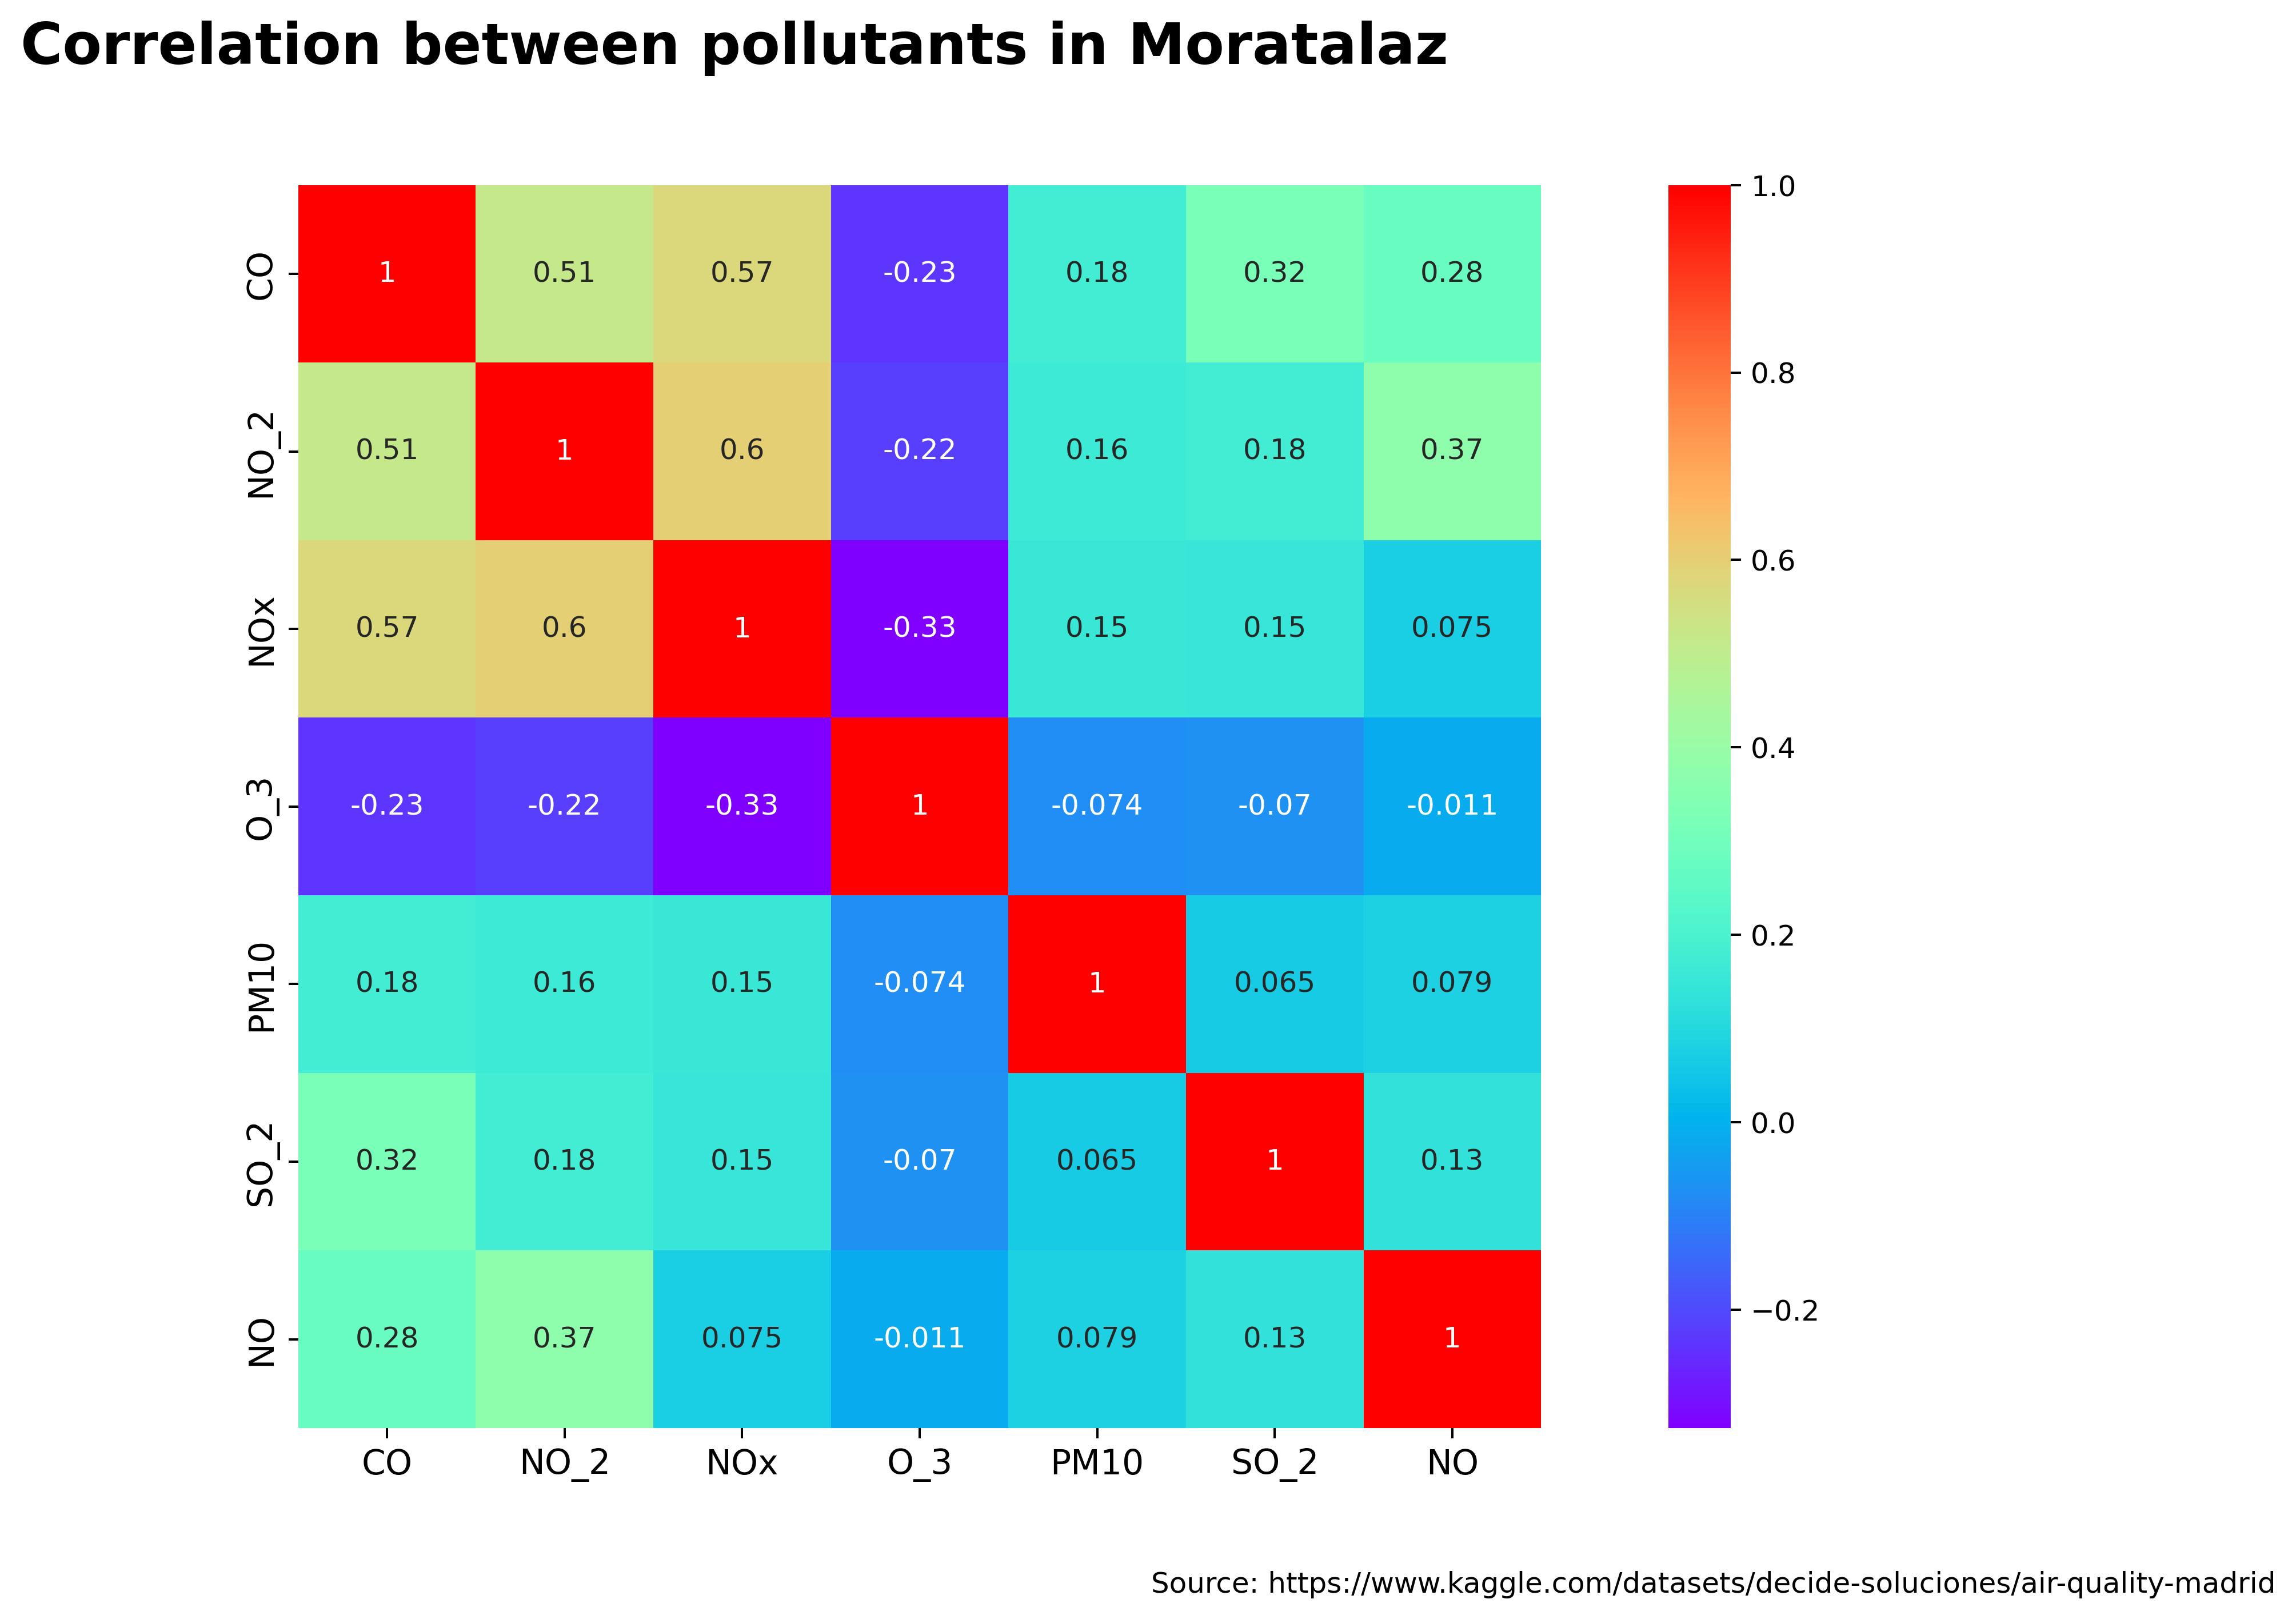

In [143]:
show_correlation('moratalaz',df_list[13])

## Pza De Espa

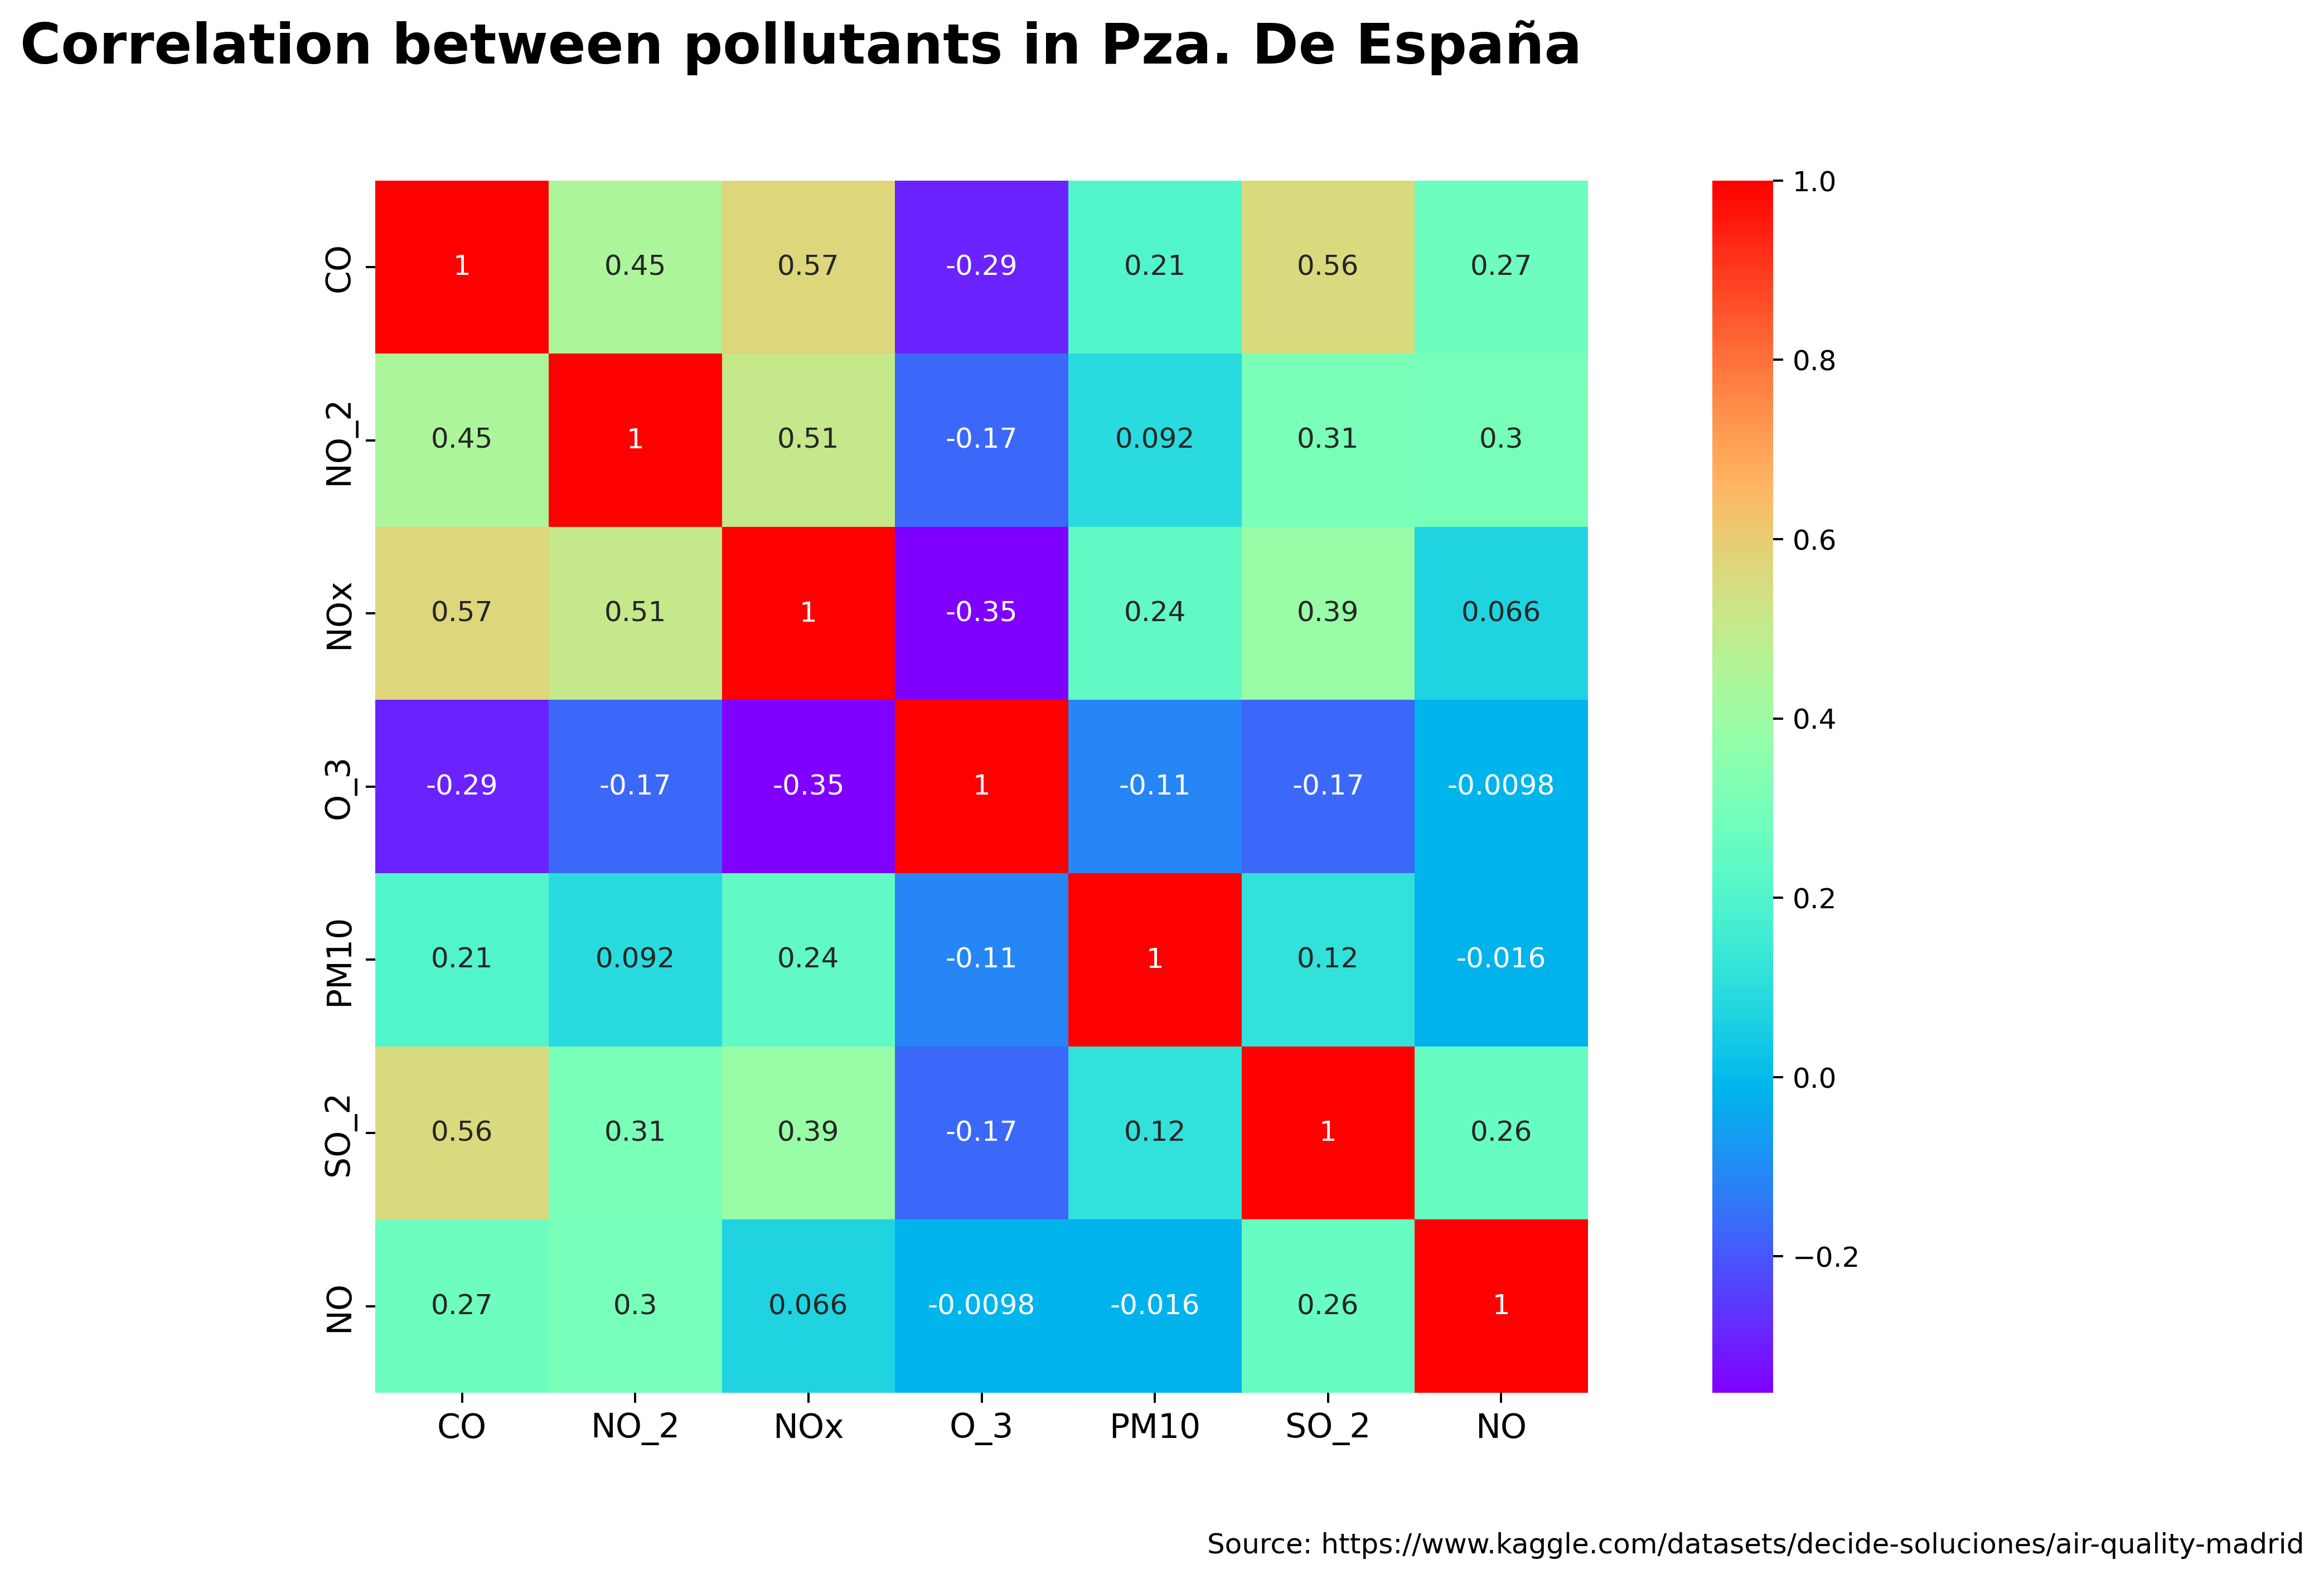

In [37]:
show_correlation('Pza. de España',df_list[17])

## Pza Del Carmen

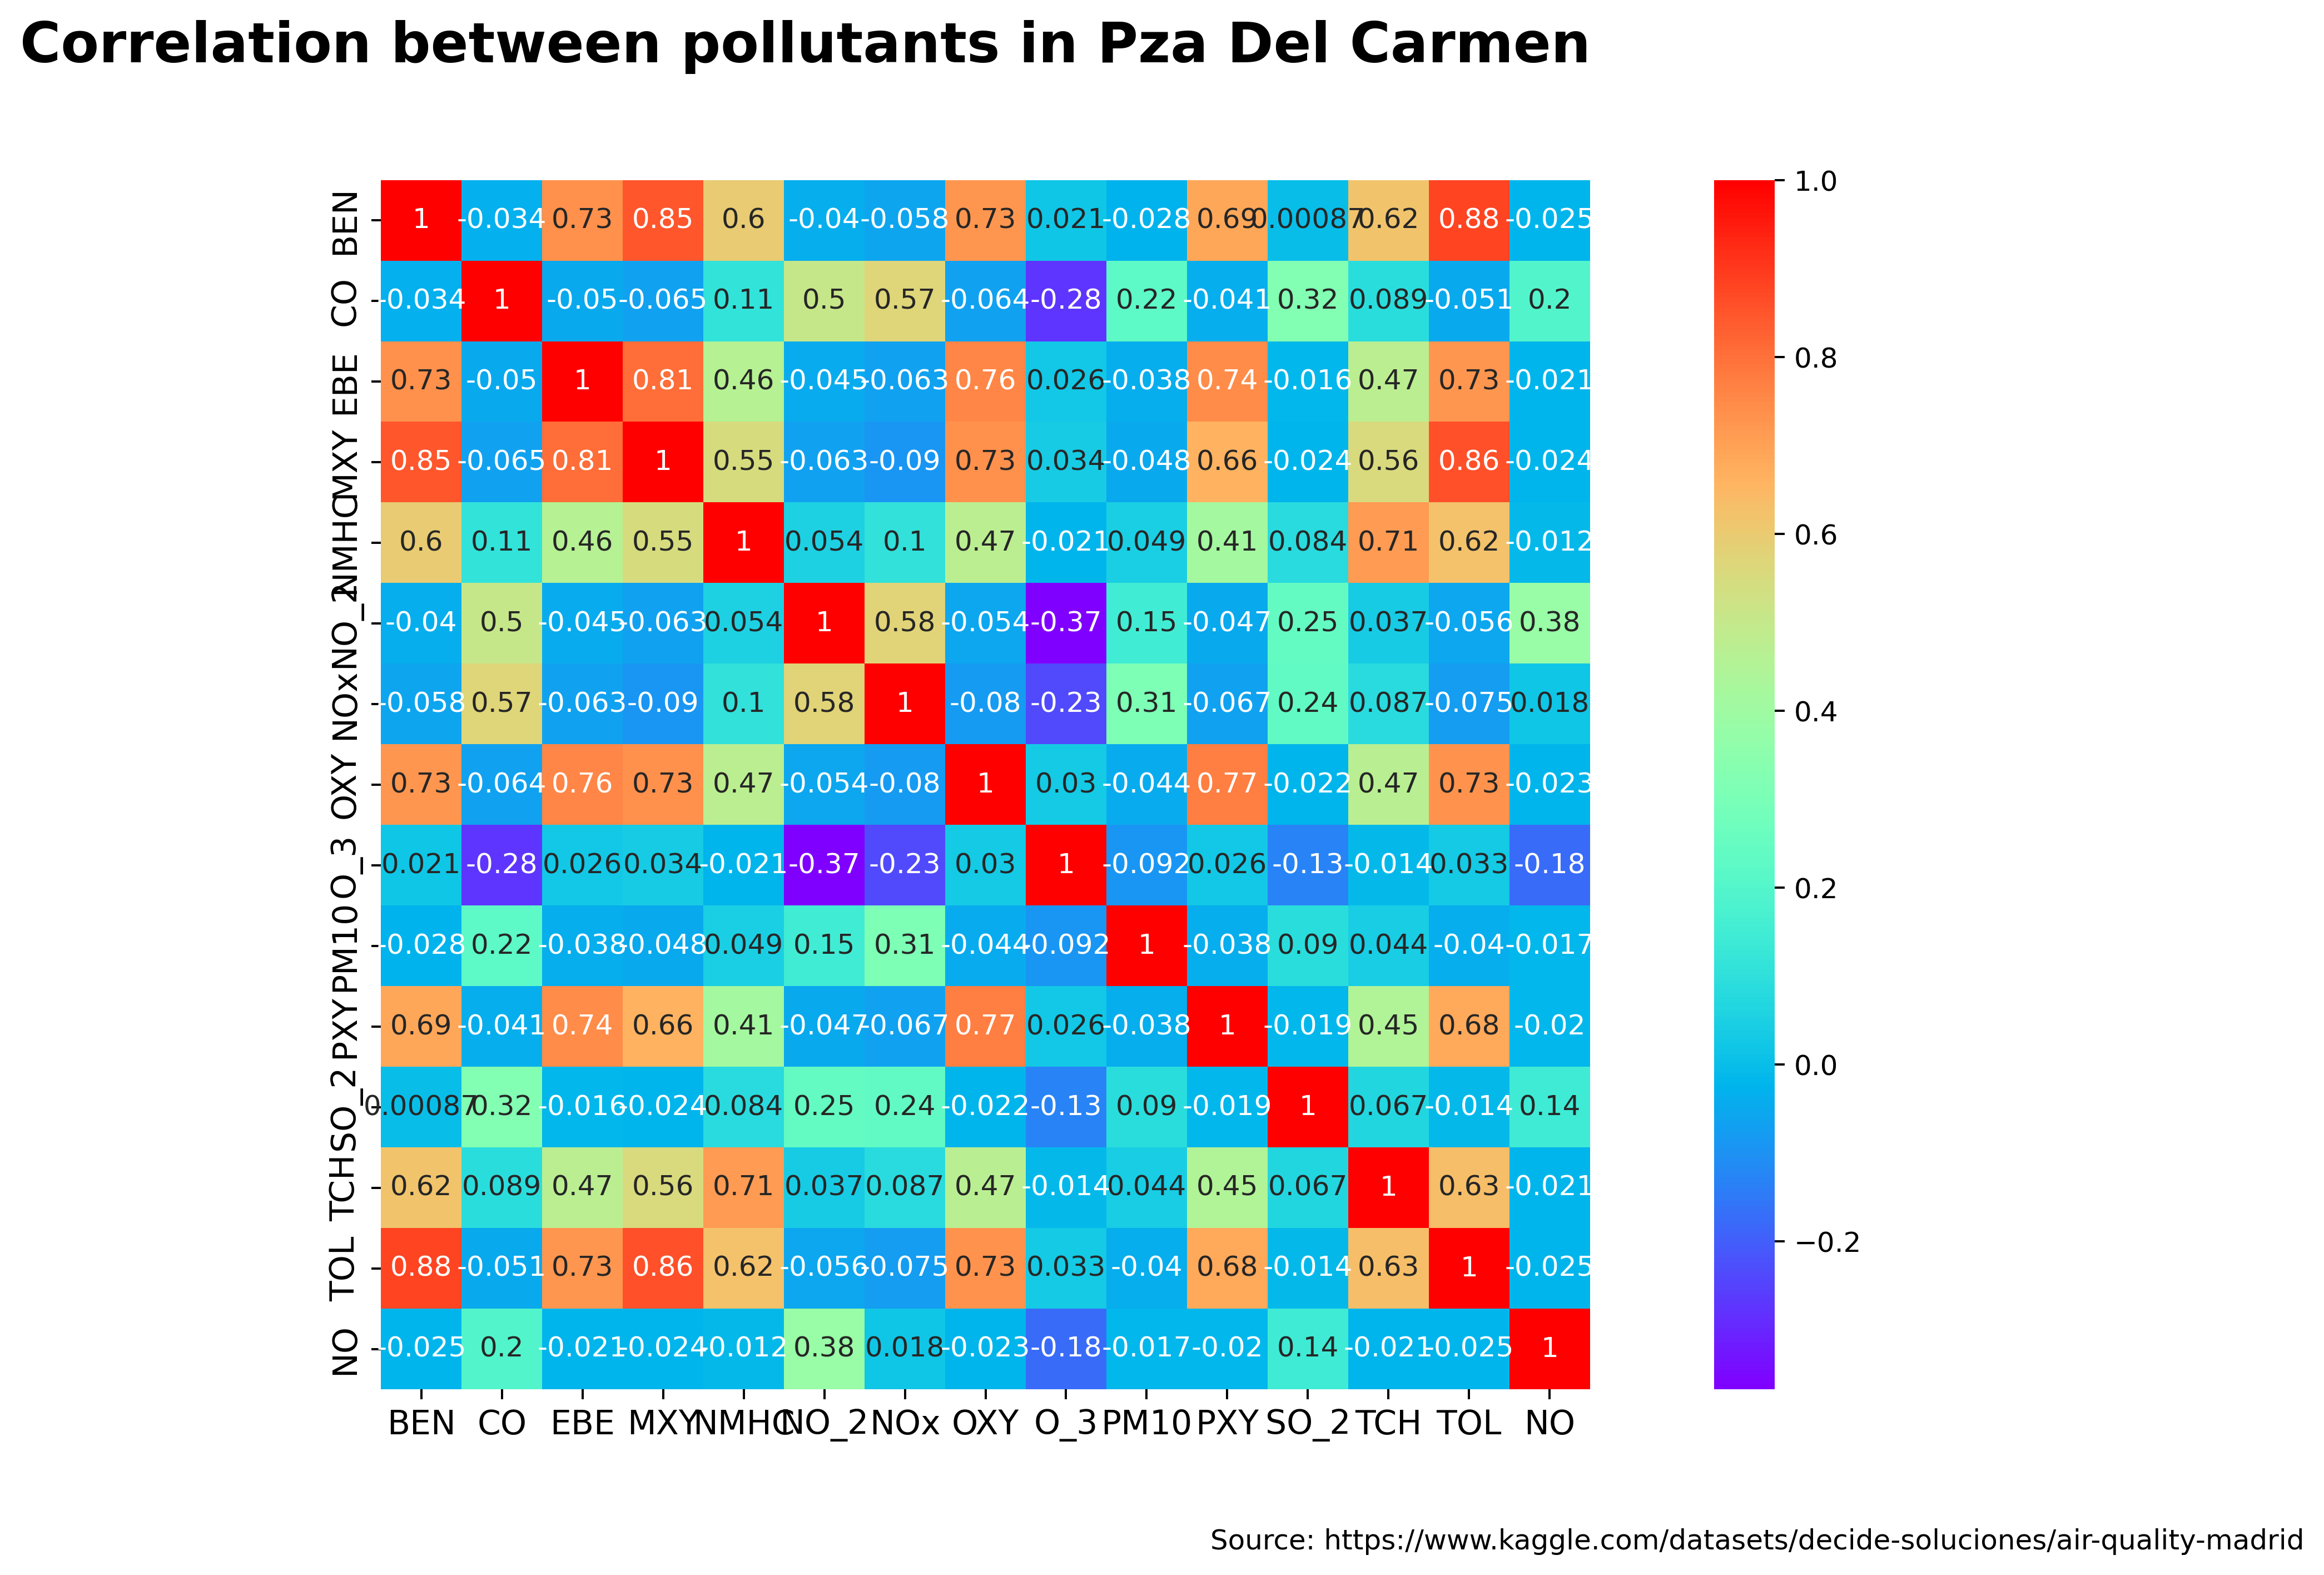

In [147]:
show_correlation('pza del carmen', df_list[18])

## Vallecas

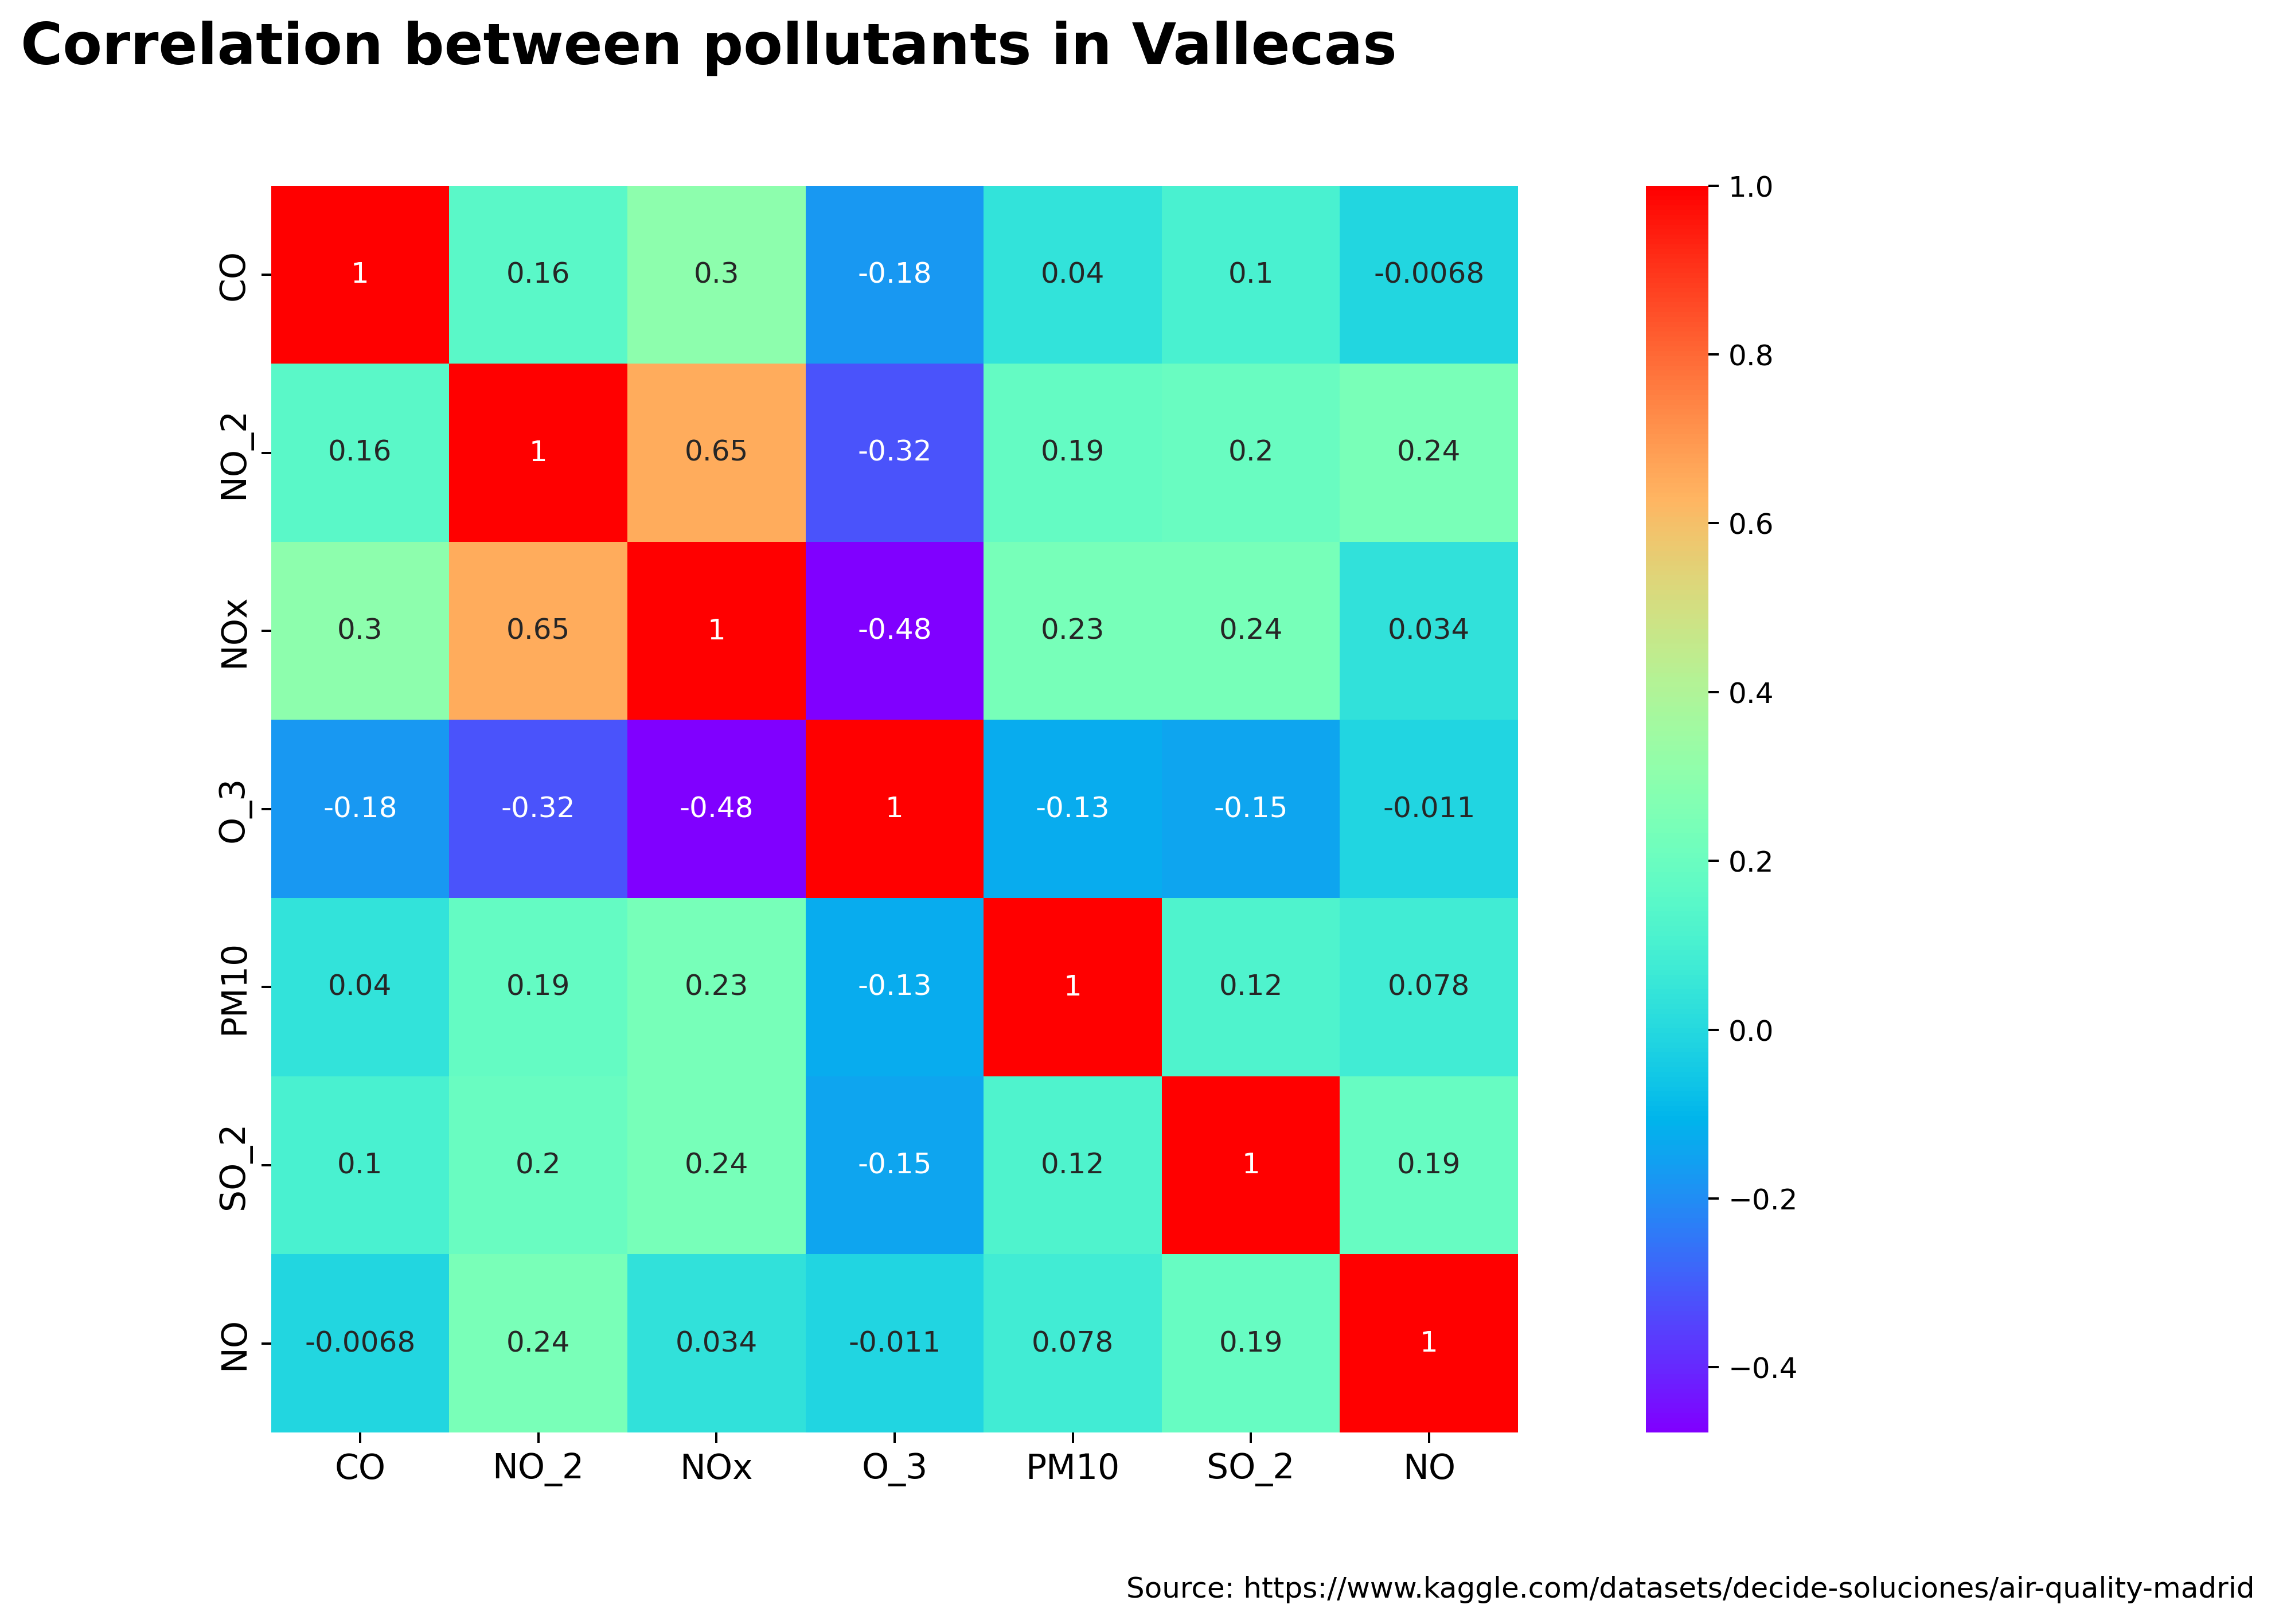

In [148]:
show_correlation("vallecas",df_list[22])

## Villaverde

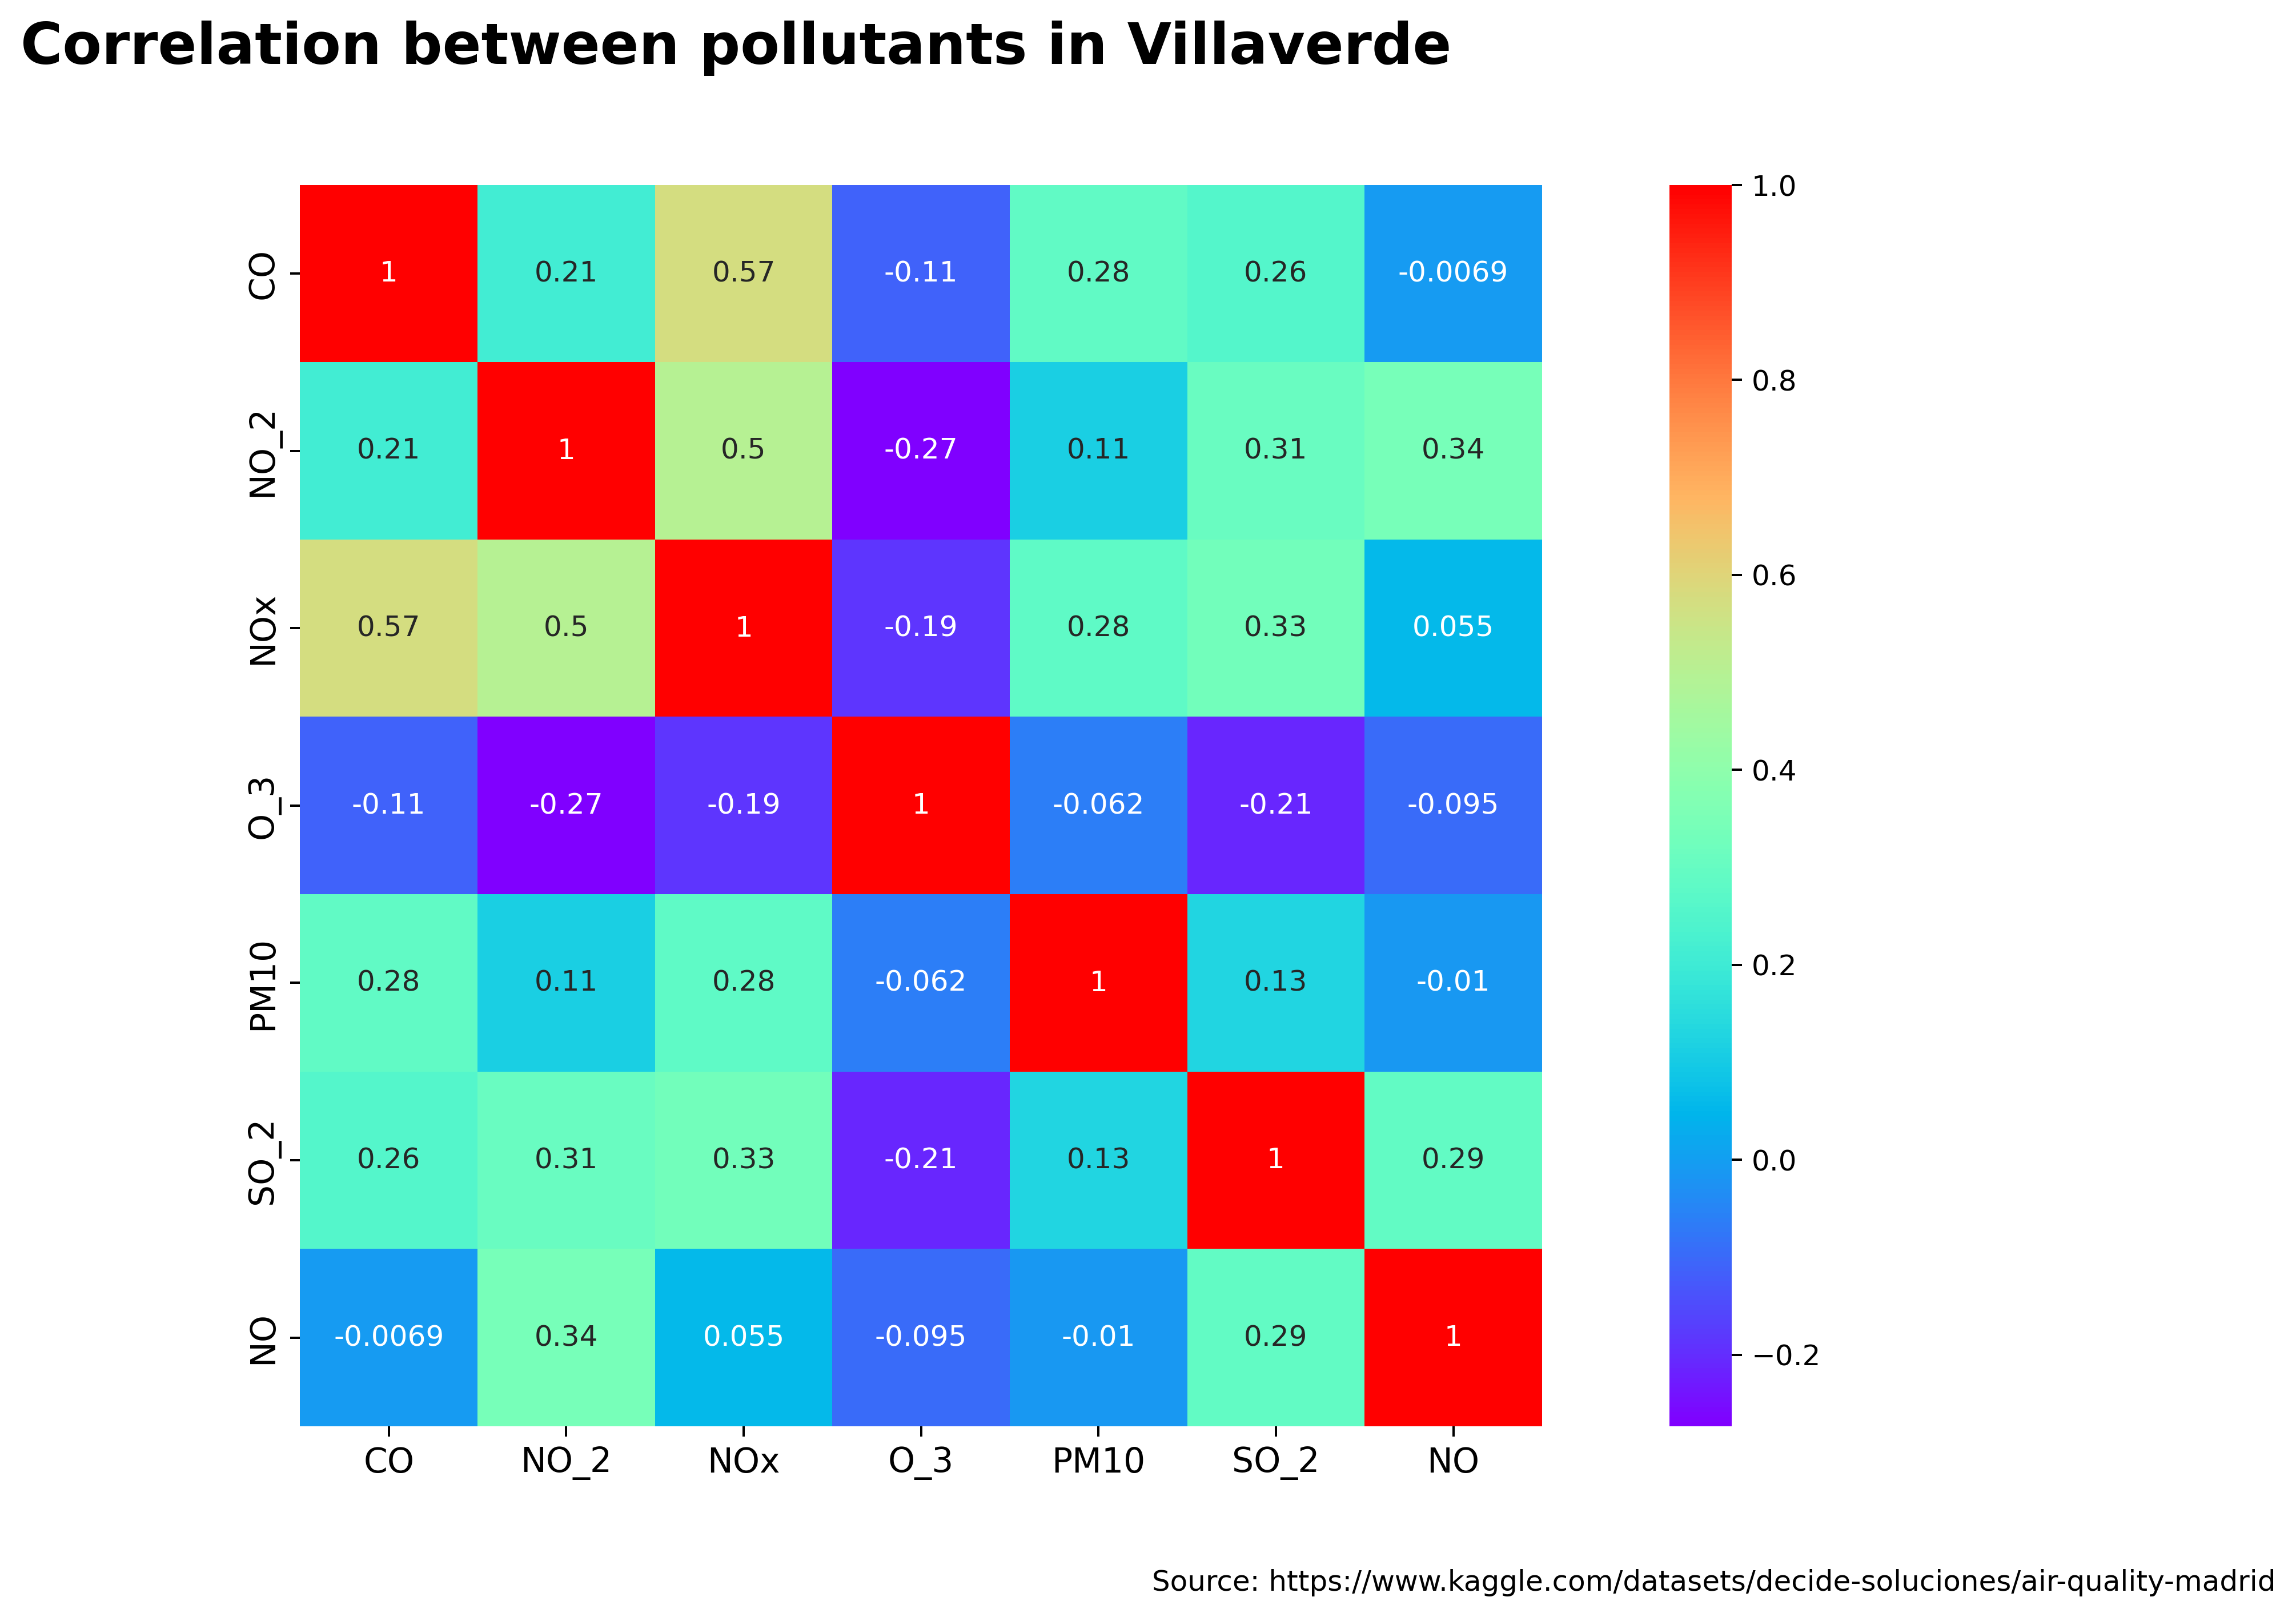

In [149]:
show_correlation('villaverde',df_list[23])

From the correlation matrices it can ve seen that for most stations the gas that has the highest correllation with CO is NOx

# Top 3 pollutants that occur frequently at Different ranges of Elevation above sea level

In [84]:
#group the different elevation values in to different elevation classes
labels = ["{0} - {1}".format(i, i + 30) for i in range(599, 740, 31)]
station1["elevation_level_class"] = pd.cut(station1.elevation, range(599, 760, 31), right=False, labels=labels)

In [86]:
station1['elevation_level_class'].value_counts()

599 - 629    7
661 - 691    6
630 - 660    5
692 - 722    5
723 - 753    1
Name: elevation_level_class, dtype: int64

In [87]:
station1['id']= station1['id'].astype(str)

In [92]:
#group the different stations into different classes  based on elevation levels
first_cat = []
first_cat_name = []
second_cat = []
second_cat_name = []
third_cat = []
third_cat_name = []
fourth_cat = []
fourth_cat_name = []
fifth_cat = []
fifth_cat_name = []
for i in range(0,24):
    if station1.loc[i,'elevation_level_class'] == '599 - 629':
        first_cat.append(station1.loc[i,'id'])
        first_cat_name.append(station1.loc[i,'name'])
    elif station1.loc[i,'elevation_level_class'] == '630 - 660':
        second_cat.append(station1.loc[i,'id'])
        second_cat_name.append(station1.loc[i,'name'])
    elif station1.loc[i,'elevation_level_class'] == '661 - 691':
        third_cat.append(station1.loc[i,'id'])
        third_cat_name.append(station1.loc[i,'name'])
    elif station1.loc[i,'elevation_level_class'] == '692 - 722':
        fourth_cat.append(station1.loc[i,'id'])
        fourth_cat_name.append(station1.loc[i,'name'])
    elif station1.loc[i,'elevation_level_class'] == '723 - 753':
        fifth_cat.append(station1.loc[i,'id'])
        fifth_cat_name.append(station1.loc[i,'name'])
    else:
        pass
        

In [130]:
# create a different list that will be used subsequently
cf_list = []
for file in files:
    cf = pd.read_csv(file)
    cf_list.append(cf)

In [131]:
#get the column names of different stations and group them in the appropriate elevatiion classes 
first_pol = []
second_pol = []
third_pol = []
fourth_pol = []
fifth_pol = []
for i in range(0,24):
    cf_list[i]['station'] = cf_list[i]['station'].astype(str)
    if cf_list[i].loc[i,'station'] in first_cat:
        first_pol.append(cf_list[i].columns[1:])
    elif cf_list[i].loc[i,'station'] in second_cat:
        second_pol.append(cf_list[i].columns[1:])
    elif cf_list[i].loc[i,'station'] in third_cat:
        third_pol.append(cf_list[i].columns[1:])
    elif cf_list[i].loc[i,'station'] in fourth_cat:
        fourth_pol.append(cf_list[i].columns[1:])
    elif cf_list[i].loc[i,'station'] in fifth_cat:
        fifth_pol.append(cf_list[i].columns[1:])
    else:
        pass

In [132]:
#flatten the two dimensional array to one dimensional array
first_pol = [el for arr in first_pol for el in arr]
second_pol = [el for arr in second_pol for el in arr]
third_pol = [el for arr in third_pol for el in arr]
fourth_pol = [el for arr in fourth_pol for el in arr]
fifth_pol = [el for arr in fifth_pol for el in arr]

In [133]:
#remove station column names from the different classes
first_pol =list(filter(('station').__ne__, first_pol))
second_pol =list(filter(('station').__ne__, second_pol))
third_pol =list(filter(('station').__ne__, third_pol))
fourth_pol =list(filter(('station').__ne__, fourth_pol))
fifth_pol =list(filter(('station').__ne__, fifth_pol))

In [134]:
# function to create dictionary from list
from collections import Counter
def to_dict(List):
    dicto = {}
    for item in reversed(List):
        dicto[item] = dicto.get(item,0) + 1
    return(dicto)

In [135]:
#convert the different list of column names into dictionaries(which shows pollutants as keys and number of occurence as values)
first_pol = to_dict(first_pol)
second_pol = to_dict(second_pol)
third_pol  = to_dict(third_pol)
fourth_pol = to_dict(fourth_pol)
fifth_pol = to_dict(fifth_pol)

In [136]:
#Create a dataframe from the dictionaries
first_pol = pd.DataFrame(first_pol,index = ['Number_of_station']).transpose()
second_pol = pd.DataFrame(second_pol,index = ['Number_of_station']).transpose()
third_pol  = pd.DataFrame(third_pol,index = ['Number_of_station']).transpose()
fourth_pol = pd.DataFrame(fourth_pol,index = ['Number_of_station']).transpose()
fifth_pol =  pd.DataFrame(fifth_pol,index = ['Number_of_station']).transpose()

In [137]:
#function to create a barplot for the different elevation categories
def plot_top3(heading,elevation_file):
    elevation_file.reset_index(inplace = True)
    elevation_file.columns = ['pollutant','Number_of_stations']
    plt.figure(figsize=(16, 8), dpi=360)
    plt.suptitle(heading.title(), fontsize=20,
             weight="bold")
    sns.barplot(x = 'pollutant',
            y = 'Number_of_stations',
            data = elevation_file.nlargest(3,'Number_of_stations'))
    plt.show()

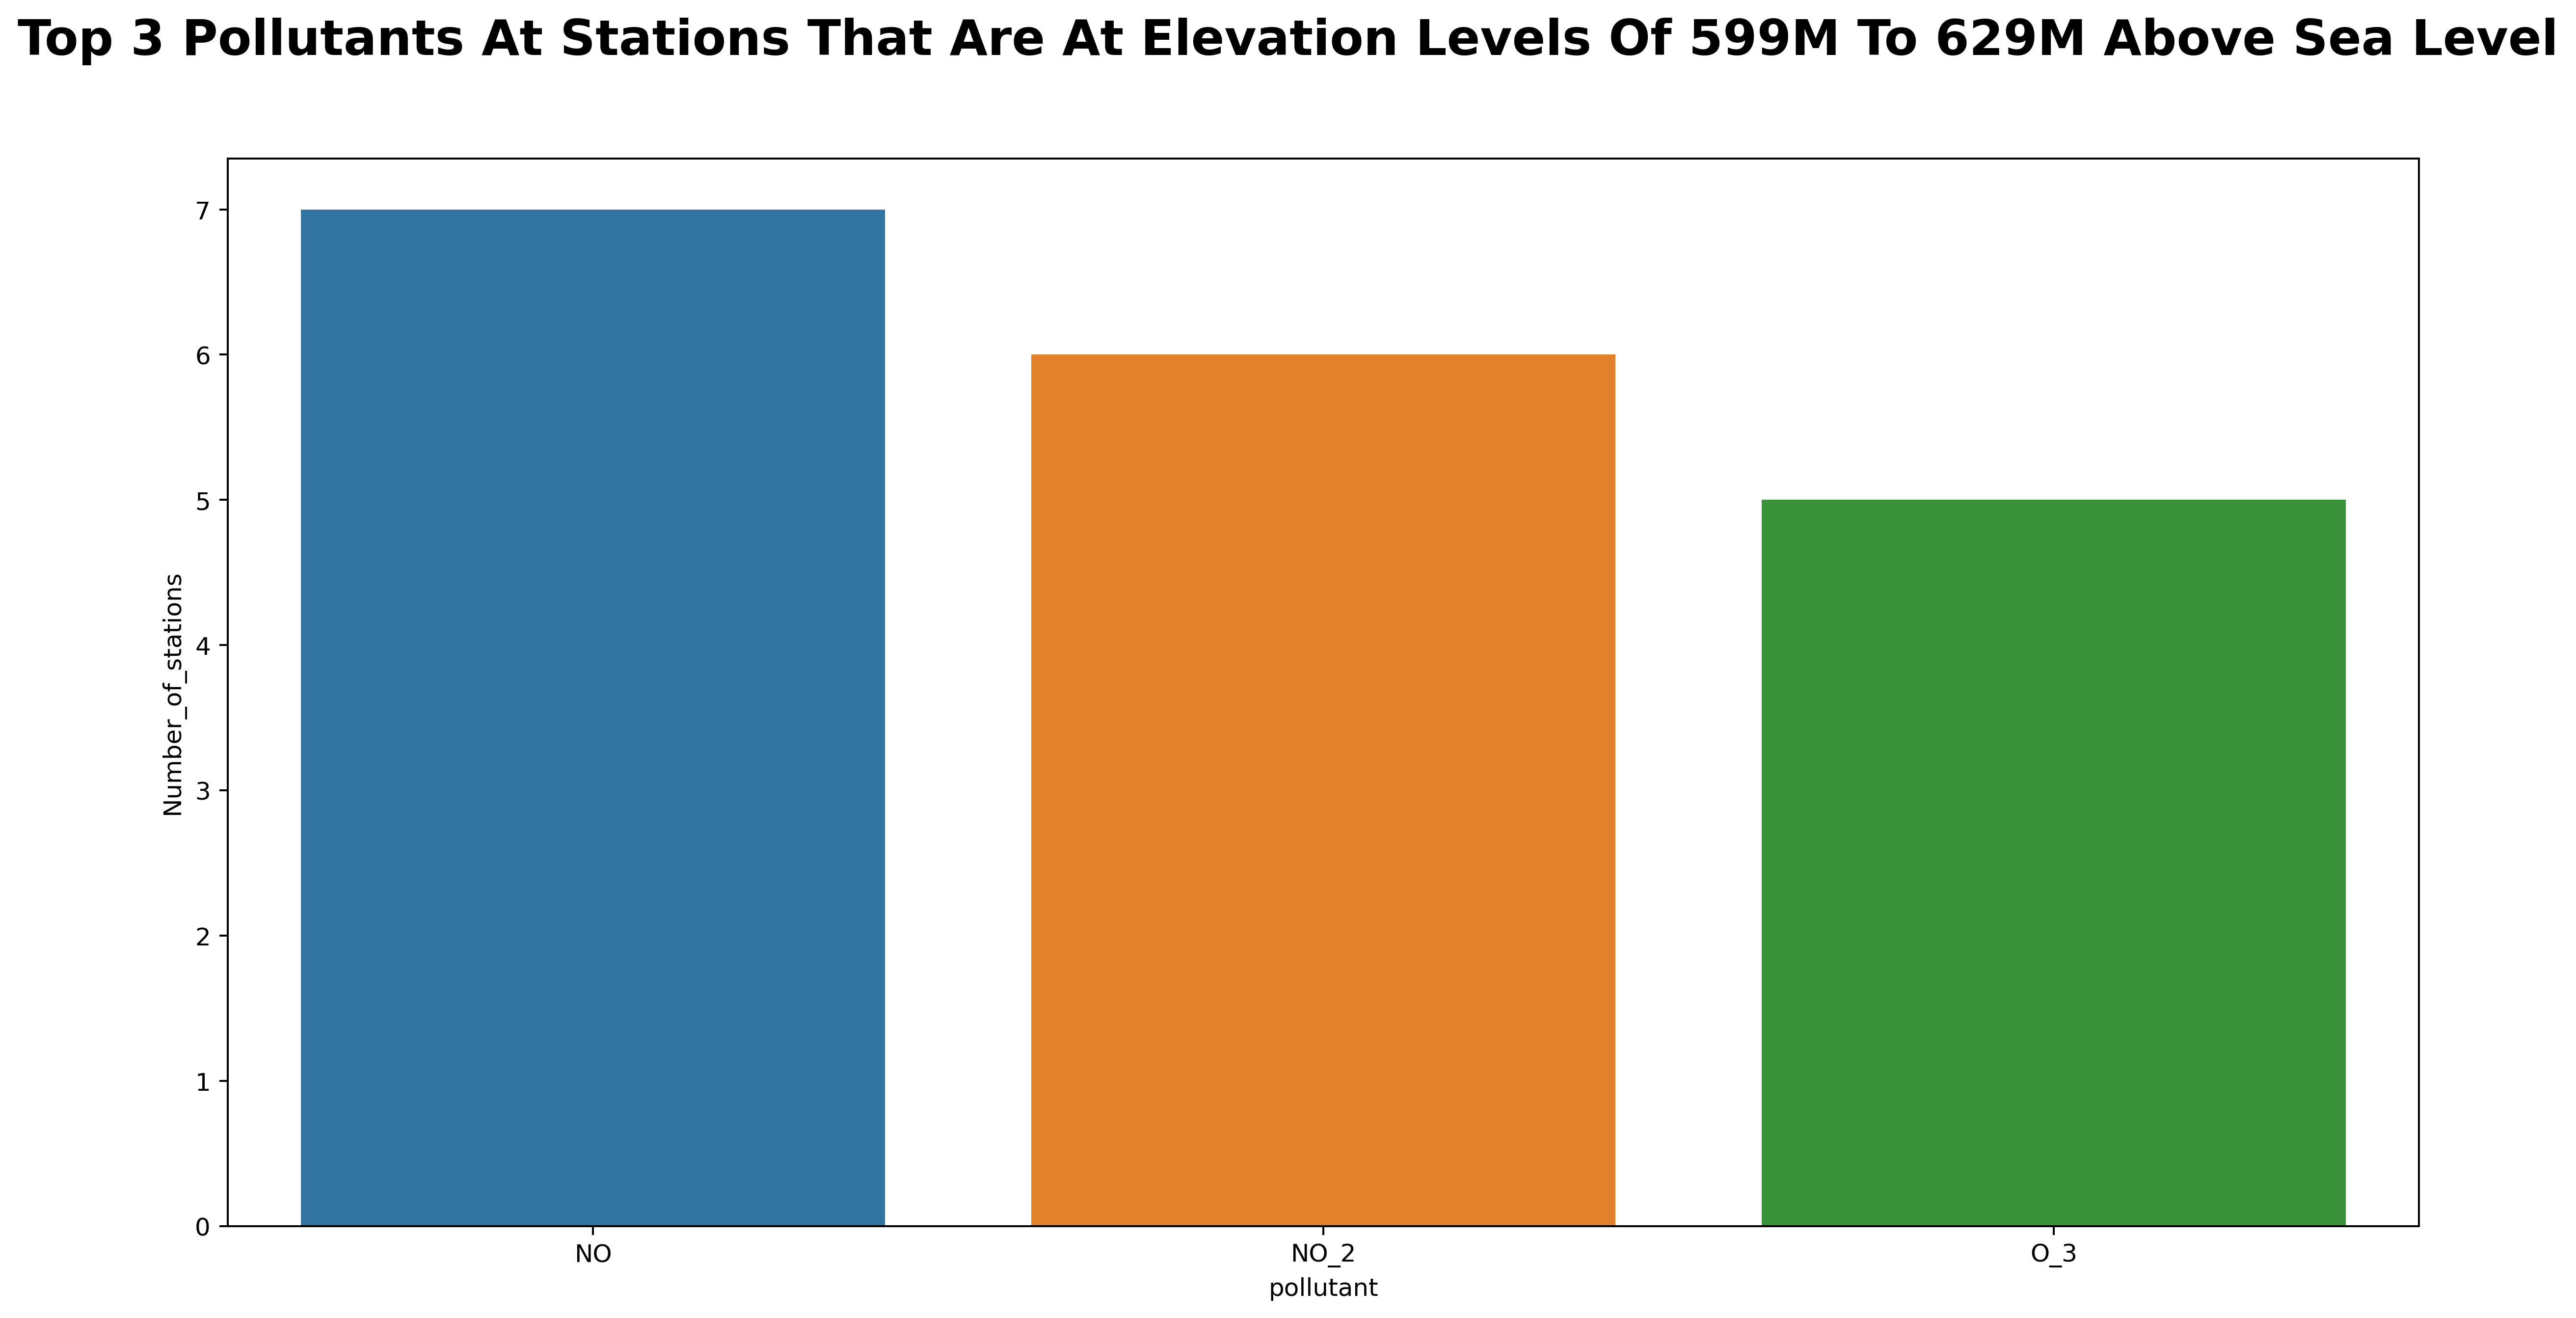

In [138]:
plot_top3("Top 3 pollutants at stations that are at elevation levels of 599m to 629m above sea level", first_pol)

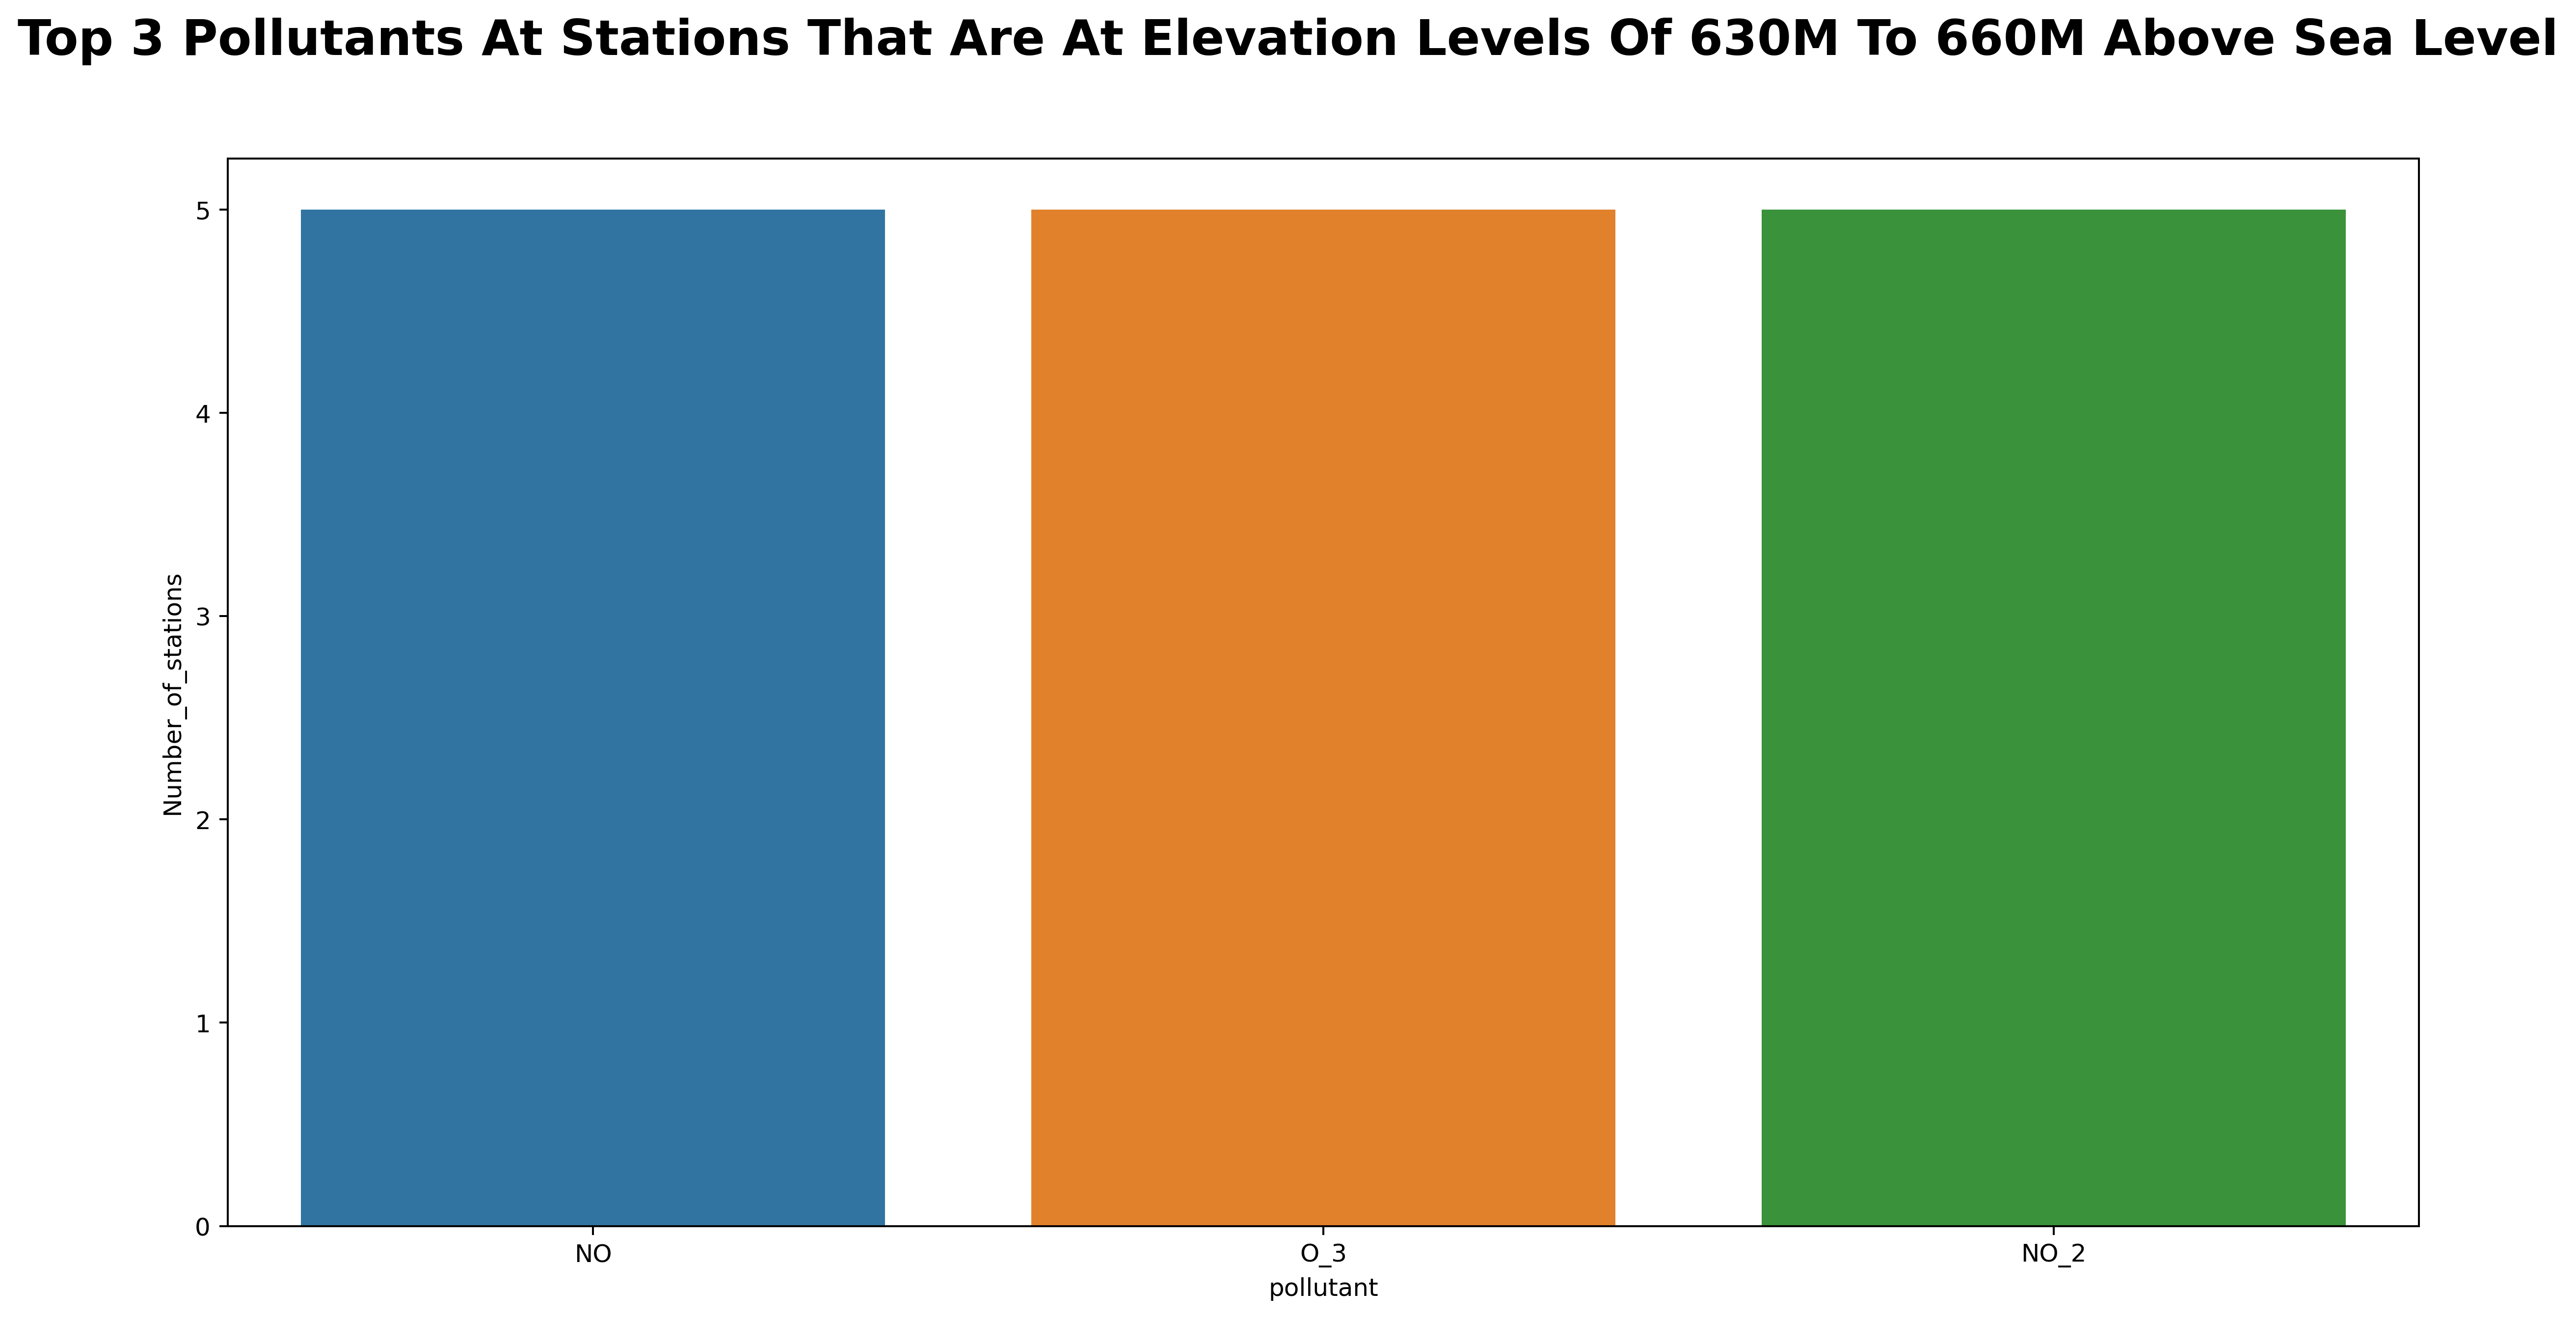

In [140]:
plot_top3("Top 3 pollutants at stations that are at elevation levels of 630m to 660m above sea level", second_pol)

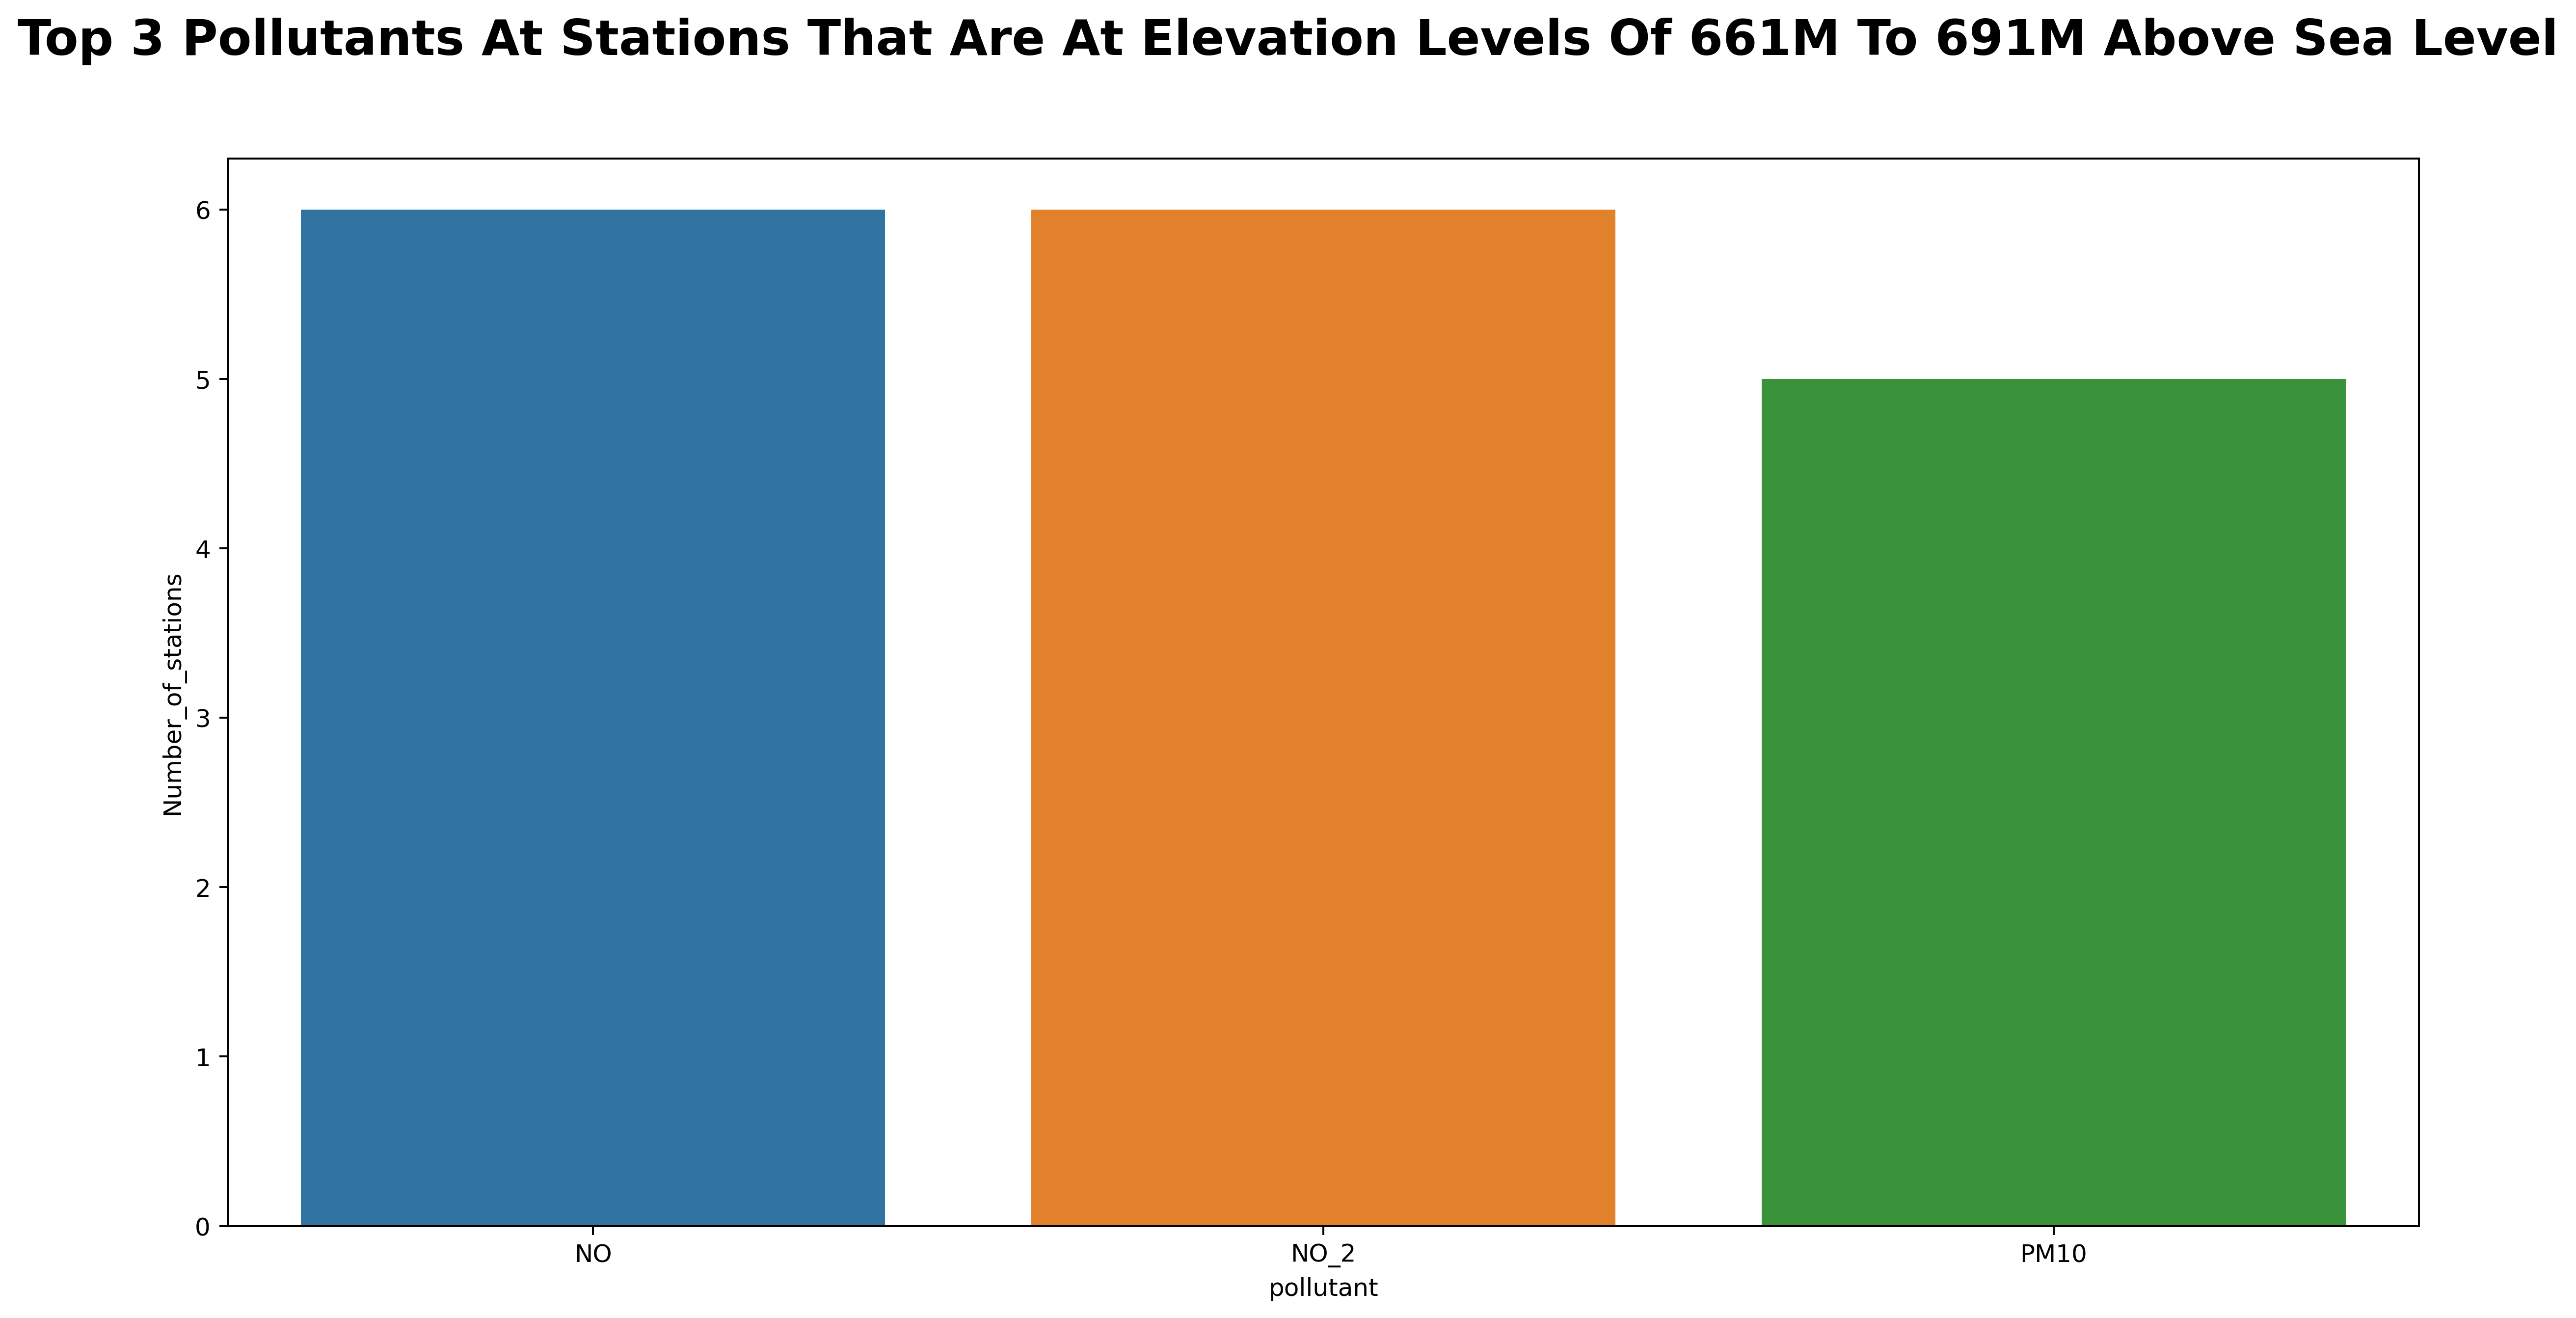

In [141]:
plot_top3("Top 3 pollutants at stations that are at elevation levels of 661m to 691m above sea level", third_pol)

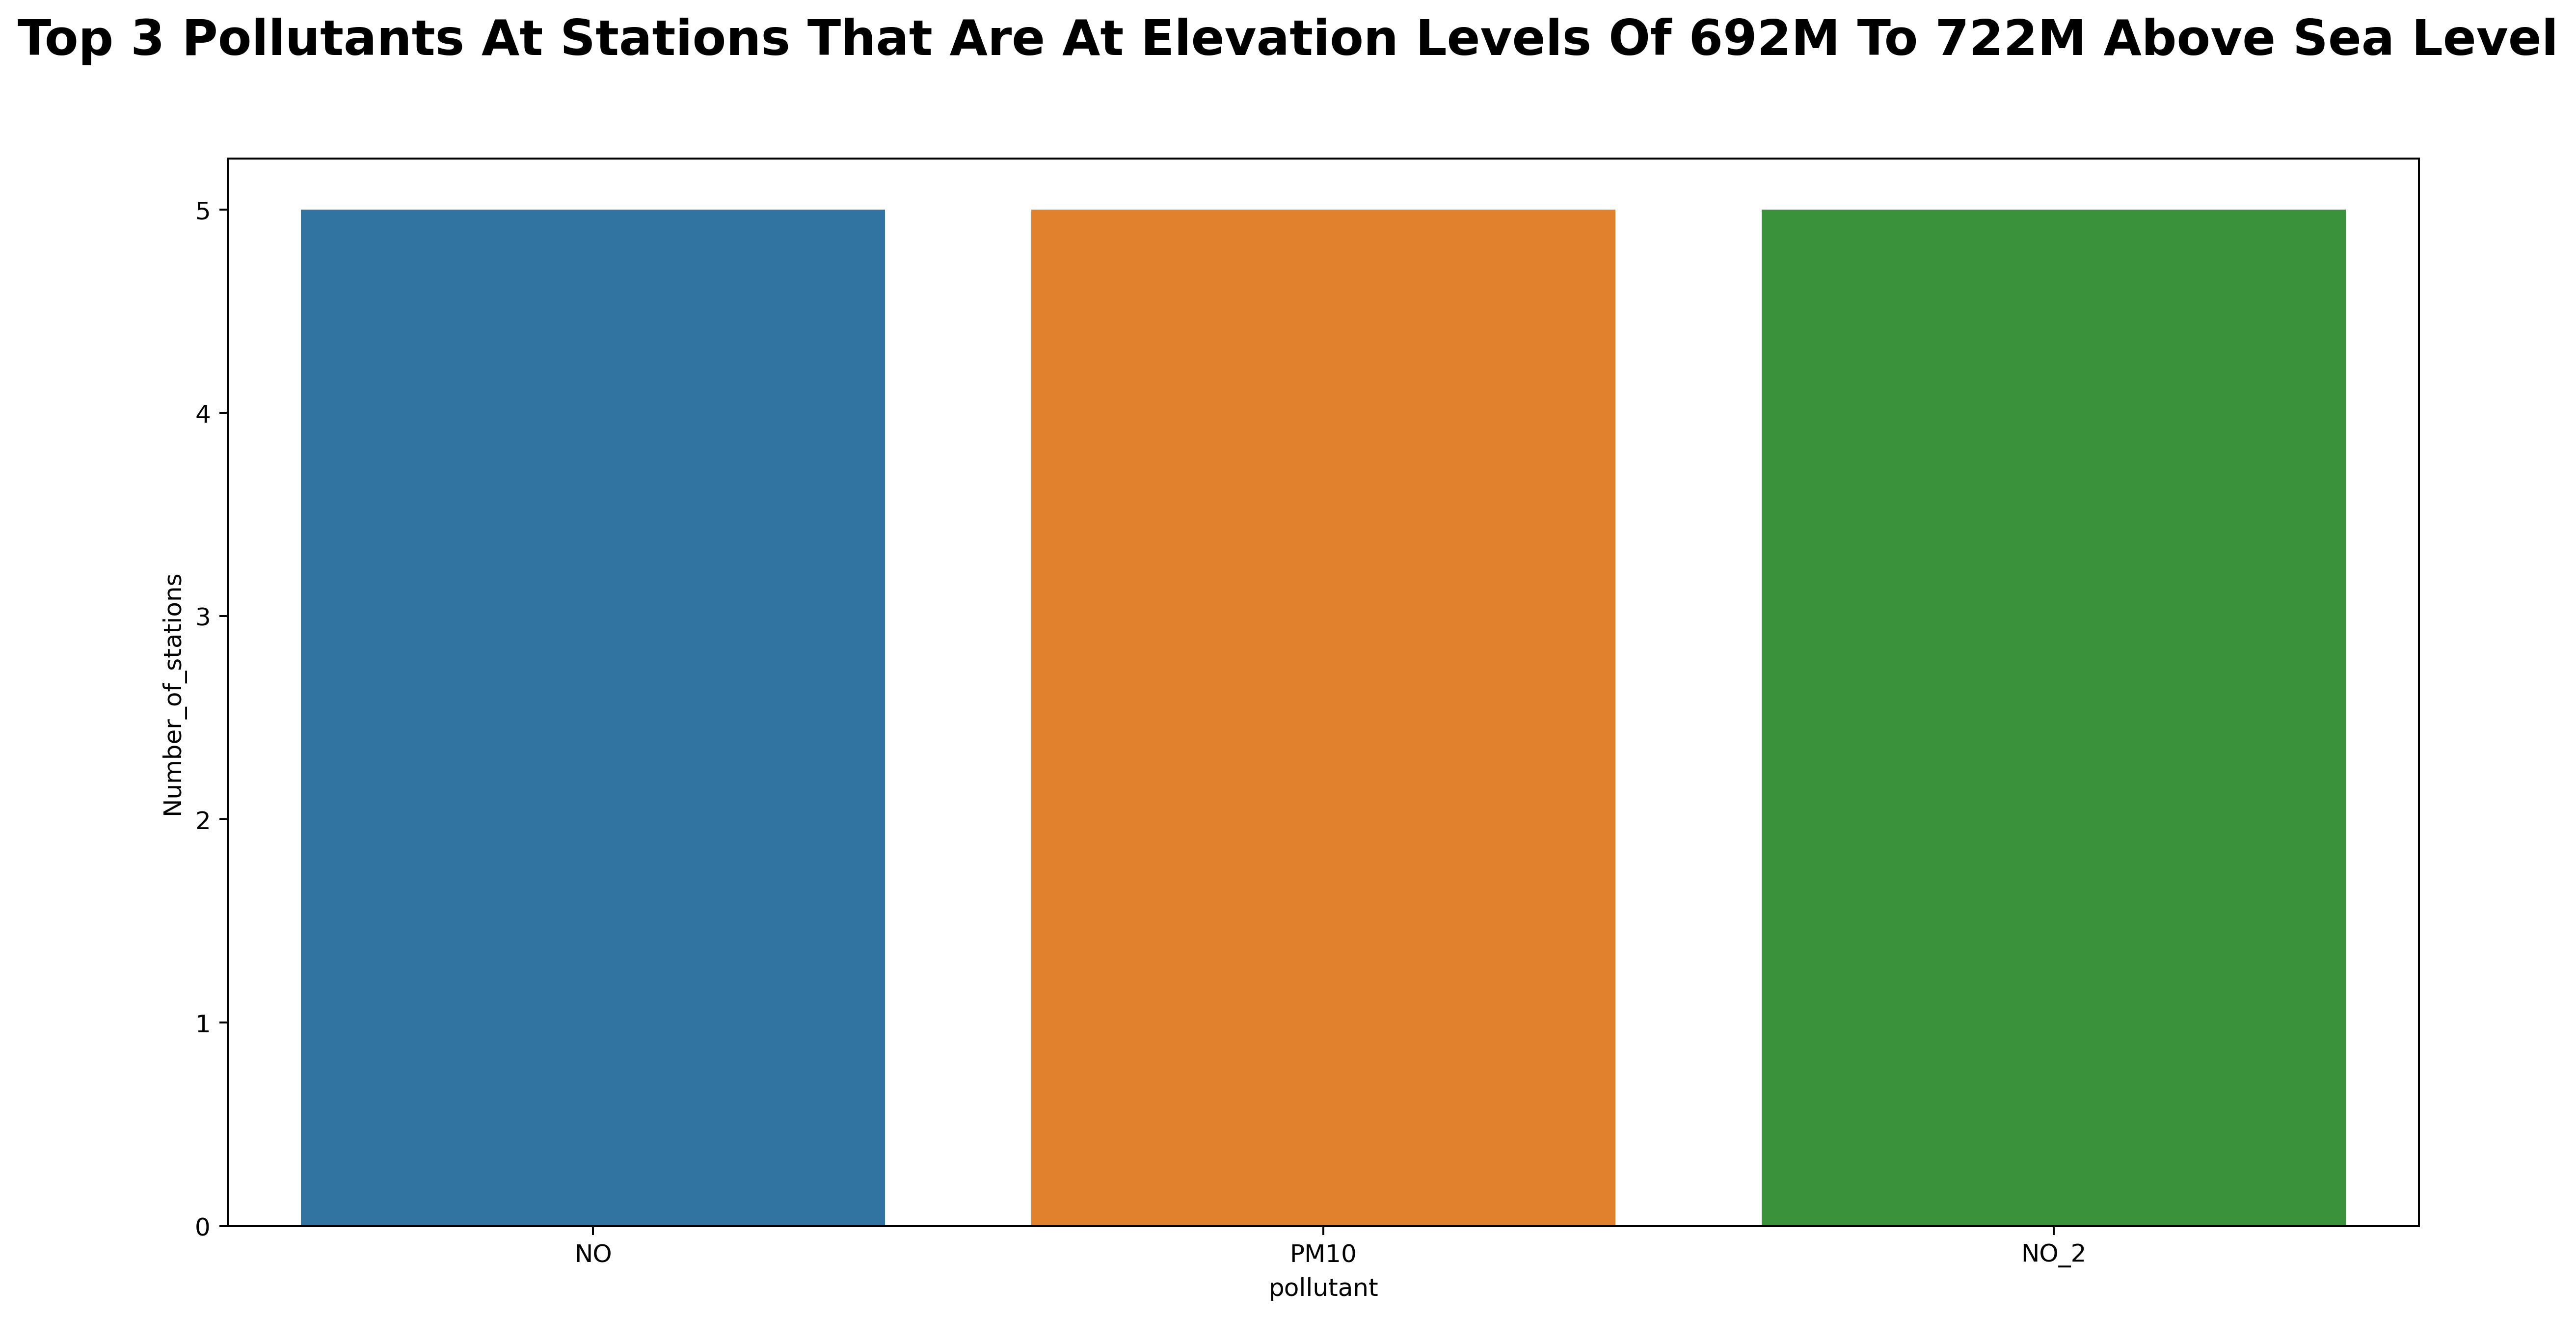

In [142]:
plot_top3("Top 3 pollutants at stations that are at elevation levels of 692m to 722m above sea level", fourth_pol)

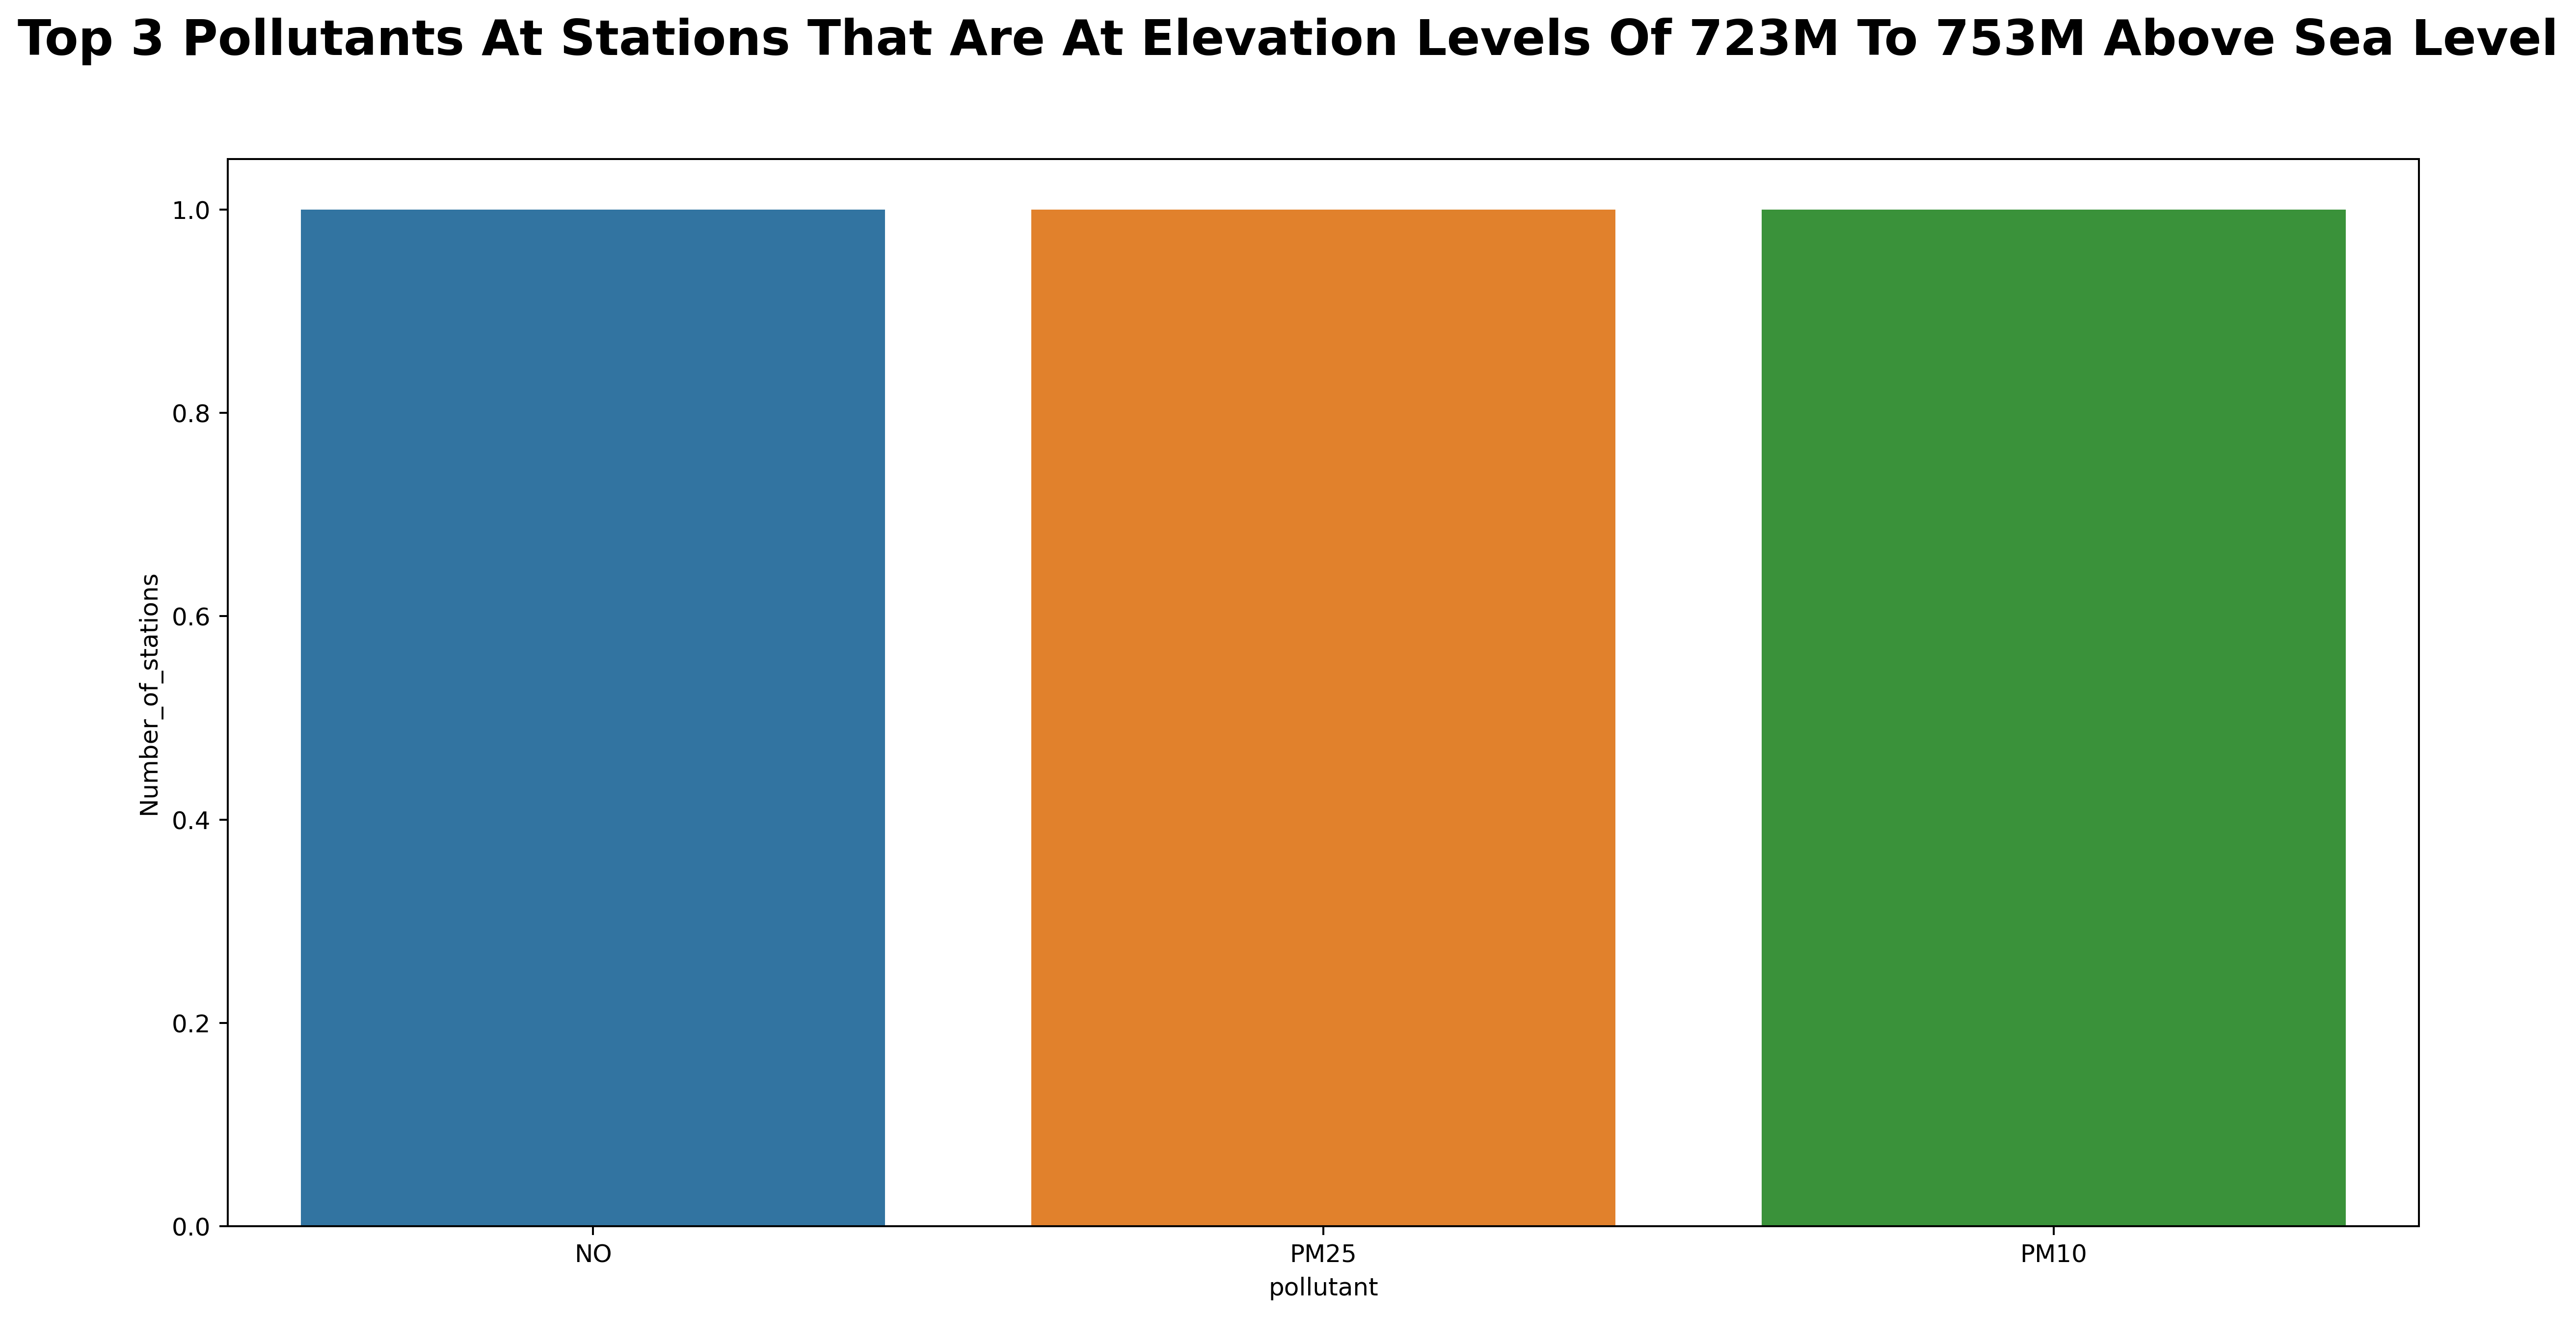

In [143]:
plot_top3("Top 3 pollutants at stations that are at elevation levels of 723m to 753m above sea level", fifth_pol)